# **Members**

1. นันท์นภัส วราธนสิน 66340500024

2. นันท์มนัส วราธนสิน 66340500026

3. สิตานัน วรฤทธิ์เรืองอุไร 66340500058

#**1. Reading the data into python and data description**


This dataset comprises 9,105 individual critically ill patients across 5 U.S. medical centers, accessioned during 1989–1991 (Phase I) and 1992–1994 (Phase II).


Link to Dataset: https://archive.ics.uci.edu/dataset/880/support2

Data description
The meaning of each column in the data is as below:

* id - Id of patients
* age - Age of the patients in years
* death - Death at any time up to National Death Index (NDI) data on 31 of December of 1994. Some patients are discharged before the end of the study and are not followed up. The authors looked up the information about death.
* sex - Gender of the patient. Listed values are {male, female}.
* hospdead - Death in hospital
* slos - Days from Study Entry to Discharge
* d.time - Days of follow-up
* dzgroup - The patient's disease sub category amogst ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, Colon Cancer, Coma, Lung Cancer, MOSF w/Malig.
* dzclass - The patient's disease category amongst "ARF/MOSF", "COPD/CHF/Cirrhosis", "Cancer", "Coma".
* num.co - The number of simultaneous diseases (or comorbidities) exhibited by the patient. Values are ordinal with higher values indicating worse condition and chances of survival.
* edu - Years of education
* income - ncome of the patient. Listed values are {"$11-$25k", "$25-$50k", ">$50k", "under $11k"}.
* scoma - SUPPORT day 3 Coma Score based on Glasgow scale (predicted by a model).
* charges - Hospital charges
* totcst - Total ratio of costs to charges (RCC) cost
* totmcst - Total micro cost
* avtisst - Average TISS score, days 3-25, where Therapeutic Intervention Scoring System (TISS) is a method for calculating costs in the intensive care unit (ICU) and intermediate care unit (IMCU).
* race - Race of the patient. Listed values are {asian, black, hispanic, missing, other, white}.
* sps -	SUPPORT physiology score on day 3 (predicted by a model).
* aps - APACHE III day 3 physiology score (no coma, imp bun,uout for ph1)
* surv2m - SUPPORT model 2-month survival estimate at day 3 (predicted by a model)
* surv6m - SUPPORT model 6-month survival estimate at day 3 (predicted by a model)
* hday - Day in hospital at which patient entered study.
* diabetes - Whether the patient exhibits diabetes (Com 27-28, Dx 73) as a comorbidity (Y) or not (N).
* dementia - Whether the patient exhibits dementia (Comorbidity 6) as a comorbidity (Y) or not (N).
* ca - Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).
* prg2m - Physician’s 2-month survival estimate for patient.
* prg6m - Physician’s 26-month survival estimate for patient.
* dnr - Whether the patient has a do not rescuscitate (DNR) order or not. Possible values are dnr after sadm, dnr before sadm, missing, no dnr.
* dnrday - Day of DNR order (<0 if before study)
* meanbp - mean arterial blood pressure of the patient, measured at day 3.
* wblc - counts of white blood cells (in thousands) measured at day 3.
* hrt - heart rate of the patient measured at day 3.
* resp - respiration rate of the patient measured at day 3.
* temp - temperature in Celsius degrees measured at day 3.
* pafi - $PaO_2/FiO_2$ ratio measured at day 3. The ratio of arterial oxygen partial pressure (PaO2 in mmHg) to fractional inspired oxygen (FiO2 expressed as a fraction). Widely used clinical indicator of hypoxaemia, though its diagnostic utility is controversial. Specific ranges of values can be associated with different levels of mortality. May be worth considering binning these values according to some ranges: https://litfl.com/pao2-fio2-ratio/
* alb - serum albumin levels measured at day 3.
* bili - bilirubin levels measured at day 3.
* crea - serum creatinine levels measured at day 3.
* sod - serum sodium concentration measured at day 3.
* ph - Arterial blood pH. The pH of blood is usually between 7.35 and 7.45. Abnormal results may be due to lung, kidney, metabolic diseases, or medicines. Head or neck injuries or other injuries that affect breathing can also lead to abnormal results.
*	glucose - Glucose levels measured at day 3.
* bun - Blood urea nitrogen levels measured at day 3.
* urine - Urine output measured at day 3.
* adlp - Index of Activities of Daily Living (ADL) of the patient, filled out by the patient. Higher values indicate more chance of survival, measured at day 3.
* adls - 	Index of Activities of Daily Living (ADL) of the patient, filled out by a surrogate (e.g. family member), measured at day 3. Higher values indicate more chance of survival.
* sfdm2 - Level of functional disability of the patient in a 1-5 scale, with 5 being the highest severity. The values were obtained via questionairres to the patient and/or surrogates to determine the Sickness Profile Impact (SIP). Values are correlated with ADLS, ADLP columns. Listed values are: {1: "no(Month 2 and SIP pres)", "adl>=4 (>=5 if sur)", "SIP>=30", "Coma or Intub", 5: "<2 mo. follow-up"}. There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.
* adlsc	- Imputed ADL Calibrated to Surrogate.


In [ ]:
# Install Package
!pip install ucimlrepo

# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from PIL import Image
from scipy.stats import gaussian_kde

In [ ]:
# Import Dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
df = support2.data.original.copy()

#**2. Defining the problem statement**

Create a machine learning model which can predict **whether each patient will die in the hospital (Alive = 0, Death = 1) during the course of hospitalization**.

* **Target Variable:** hospdead
* **Predictors:** id, age, death, sex, slos, d.time, dzgroup, dzclass, num.co, edu, income, scoma, charges, totcst, totmcst, avtisst, race, sps, aps, surv2m, surv6m, hday, diabetes, dementia, ca, prg2m, prg6m, dnr, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, sfdm2, adlsc
* **Samples:**  Critically ill patients across five United States medical centers.

**Determining the type of Machine Learning**

We need to create a **supervised Machine Logistic Regression model**, as the target variable is Categorical.

**Assumptions for logistic regression**

Meeting these assumptions on data ensures that logistic regression provides valid, unbiased, and interpretable results:

1. Linear Relationship between the features and target
2. Little or no Multicollinearity between the features
3. No High Leverage Points or Influential Outliers
4. No auto-correlation (No Temporal Correlation)


#**3. Looking at the distribution of Target**



In [ ]:
# Plotting bar charts as the Target variable is Categorical variables
# This helps visualize the distribution of the target variable and check for class balance.
def PlotBarCharts(inpData, colsToPlot, ncols=2, figsize=(12,5)):
    n = len(colsToPlot)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    if set(colsToPlot) == {"hospdead"}:
        fig.suptitle("Bar chart of hospdead", x=0.3)
    else:
        fig.suptitle("Bar charts of categorical variables", x=0.5)

    for i, colName in enumerate(colsToPlot):
        counts = inpData.groupby(colName).size()
        bars = axes[i].bar(range(len(counts)), counts.values)

        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=10)

        if colName != "hospdead":
            axes[i].set_title(colName, pad=8, loc='center', fontsize=11)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].set_xticks(range(len(counts)))
        if colName != 'hospdead':axes[i].set_xticklabels(counts.index, rotation=30, ha='right', fontstyle='italic')
        else:axes[i].set_xticklabels(counts.index)
        axes[i].grid(axis='y', alpha=0.3)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

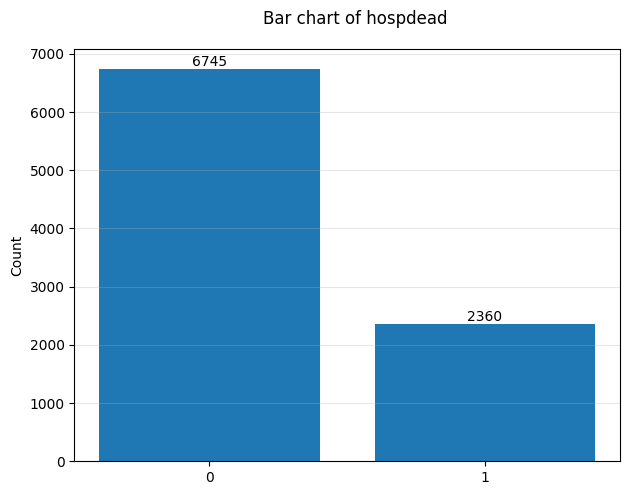

In [ ]:
# Calling Function
PlotBarCharts(inpData=df, colsToPlot=['hospdead'])

จาก Bar Chart ของตัวแปร Target ‘hospdead’ พบว่า

- คลาส 0 ของ hospdead มี 6,745 คน (74.1%)
- คลาส 1 ของ hospdead มี 2,360 คน (25.9%)

ซึ่งรวมทั้งสิ้น 9,105 คน (ไม่มี Missing Value) และเมื่อคำนวณอัตราส่วนคลาส (0 : 1) ได้ว่า 2.86 : 1

ซึ่งแสดงให้เห็นถึงลักษณะของ Moderately Imbalanced Class โดยมีการกระจายที่เอนไปทางคลาส 0 มากกว่า

#**4. Basic data exploration**



In [ ]:
# Looking at sample rows in the data
df.head()

id     age  death     sex  hospdead  slos  d.time            dzgroup  \
0   1 62.8500      0    male         0     5    2029        Lung Cancer   
1   2 60.3390      1  female         1     4       4          Cirrhosis   
2   3 52.7470      1  female         0    17      47          Cirrhosis   
3   4 42.3850      1  female         0     3     133        Lung Cancer   
4   5 79.8850      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co  ...   crea      sod     ph  glucose  bun  \
0              Cancer       0  ... 1.2000 141.0000 7.4600      NaN  NaN   
1  COPD/CHF/Cirrhosis       2  ... 5.5000 132.0000 7.2500      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ... 2.0000 134.0000 7.4600      NaN  NaN   
3              Cancer       2  ... 0.7999 139.0000    NaN      NaN  NaN   
4            ARF/MOSF       1  ... 0.7999 143.0000 7.5098      NaN  NaN   

   urine   adlp   adls                sfdm2  adlsc  
0    NaN 7.0000 7.0000                  NaN 7.0000  
1    NaN    NaN 1.0000     <2 mo. follow-up 1.0000  
2    NaN 1.0000 0.0000     <2 mo. follow-up 0.0000  
3    NaN 0.0000 0.0000  no(M2 and SIP pres) 0.0000  
4    NaN    NaN 2.0000  no(M2 and SIP pres) 2.0000  

[5 rows x 48 columns]

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [ ]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

id       age     death   sex  hospdead      slos    d.time  \
count  9105.0000 9105.0000 9105.0000  9105 9105.0000 9105.0000 9105.0000   
unique       NaN       NaN       NaN     2       NaN       NaN       NaN   
top          NaN       NaN       NaN  male       NaN       NaN       NaN   
freq         NaN       NaN       NaN  5125       NaN       NaN       NaN   
mean   4553.0000   62.6508    0.6811   NaN    0.2592   17.8630  478.4499   
std    2628.5314   15.5937    0.4661   NaN    0.4382   22.0064  560.3833   
min       1.0000   18.0420    0.0000   NaN    0.0000    3.0000    3.0000   
25%    2277.0000   52.7970    0.0000   NaN    0.0000    6.0000   26.0000   
50%    4553.0000   64.8570    1.0000   NaN    0.0000   11.0000  233.0000   
75%    6829.0000   73.9990    1.0000   NaN    1.0000   20.0000  761.0000   
max    9105.0000  101.8480    1.0000   NaN    1.0000  343.0000 2029.0000   

                  dzgroup   dzclass    num.co  ...      crea       sod  \
count                9105      9105 9105.0000  ... 9038.0000 9104.0000   
unique                  8         4       NaN  ...       NaN       NaN   
top     ARF/MOSF w/Sepsis  ARF/MOSF       NaN  ...       NaN       NaN   
freq                 3515      4227       NaN  ...       NaN       NaN   
mean                  NaN       NaN    1.8686  ...    1.7710  137.5685   
std                   NaN       NaN    1.3444  ...    1.6860    6.0293   
min                   NaN       NaN    0.0000  ...    0.1000  110.0000   
25%                   NaN       NaN    1.0000  ...    0.8999  134.0000   
50%                   NaN       NaN    2.0000  ...    1.2000  137.0000   
75%                   NaN       NaN    3.0000  ...    1.8999  141.0000   
max                   NaN       NaN    9.0000  ...   21.5000  181.0000   

              ph   glucose       bun     urine      adlp      adls  \
count  6821.0000 4605.0000 4753.0000 4243.0000 3464.0000 6238.0000   
unique       NaN       NaN       NaN       NaN       NaN       NaN   
top          NaN       NaN       NaN       NaN       NaN       NaN   
freq         NaN       NaN       NaN       NaN       NaN       NaN   
mean      7.4154  159.8734   32.3495 2191.5460    1.1579    1.6374   
std       0.0806   88.3915   26.7923 1455.2458    1.7397    2.2314   
min       6.8291    0.0000    1.0000    0.0000    0.0000    0.0000   
25%       7.3799  103.0000   14.0000 1165.5000    0.0000    0.0000   
50%       7.4199  135.0000   23.0000 1968.0000    0.0000    1.0000   
75%       7.4697  188.0000   42.0000 3000.0000    2.0000    3.0000   
max       7.7695 1092.0000  300.0000 9000.0000    7.0000    7.0000   

                   sfdm2     adlsc  
count               7705 9105.0000  
unique                 5       NaN  
top     <2 mo. follow-up       NaN  
freq                3123       NaN  
mean                 NaN    1.8883  
std                  NaN    2.0038  
min                  NaN    0.0000  
25%                  NaN    0.0000  
50%                  NaN    1.0000  
75%                  NaN    3.0000  
max                  NaN    7.0732  

[11 rows x 48 columns]

In [ ]:
# Finding unique values for each column to understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

id          9105
age         7323
death          2
sex            2
hospdead       2
slos         167
d.time      1724
dzgroup        8
dzclass        4
num.co        10
edu           31
income         4
scoma         11
charges     8501
totcst      8197
totmcst     5516
avtisst      352
race           5
sps          604
aps          125
surv2m       949
surv6m       936
hday          85
diabetes       2
dementia       2
ca             3
prg2m         51
prg6m         87
dnr            3
dnrday       177
meanbp       164
wblc         499
hrt          186
resp          66
temp          98
pafi        1457
alb           60
bili         295
crea         130
sod           60
ph            77
glucose      439
bun          159
urine       1494
adlp           8
adls           8
sfdm2          5
adlsc       1735
dtype: int64

จากการทำ Data Exploration พบว่ามีบาง Feature ที่ ไม่มีความสัมพันธ์เชิงสาเหตุโดยตรงกับการเสียชีวิตของผู้ป่วยในโรงพยาบาล (hospdead) เนื่องจาก
- เป็นข้อมูลทั่วไป ไม่ได้สะท้อนสภาวะทางการแพทย์
- เป็นข้อมูลที่ถูกบันทึกหลังรู้สถานะสุดท้ายของผู้ป่วย (alive/dead) ซึ่งอาจก่อให้เกิด data leakage

ดังนั้นจึงทำการตัด Feature ที่มีลักษณะดังกล่าวออก ดังแสดงในตารางต่อไปนี้:

| Unselected Variables | Reasons |
| ----------------------- | ------- |
| id | คือ หมายเลขระบุผู้ป่วย ซึ่งไม่สะท้อนความเสี่ยงทางสรีรวิทยาหรือสภาวะสุขภาพโดยตรง |
| slos | คือ Days from Study Entry to Discharge	 ซึ่งจะถูกบันทึกหลังจากรู้สถานะสุดท้ายผู้ป่วย (alive/dead) |  
| d.time | คือ Days of follow-up ซึ่งจะถูกบันทึกหลังจากรู้สถานะสุดท้ายผู้ป่วย (alive/dead) |  
| charges | คือ Hospital charges ซึ่งเกิดหลังจากการรักษาทั้งหมดเสร็จสิ้น และจะถูกบันทึกหลังจากรู้สถานะสุดท้ายผู้ป่วย (alive/dead) |                                   
| totcst | คือ Total ratio of costs to charges (RCC) cost ซึ่งเป็นข้อมูลทางการเงิน |     
| totmcst | คือ micro-cost ซึ่งเกิดหลังจากการรักษาทั้งหมดเสร็จสิ้น และจะถูกบันทึกหลังจากรู้สถานะสุดท้ายผู้ป่วย |    
| race | คือ Race of the patient ซึ่งไม่สะท้อนความเสี่ยงทางสรีรวิทยาหรือสภาวะสุขภาพโดยตรง |     
| surv2m | คือ SUPPORT model 2-month survival estimate at day 3 (predicted by a model) ซึ่งเป็น predicted survival ที่สร้างจากโมเดลภายนอก → เสี่ยง data leakage เพราะรู้แนวโน้ม alive/dead แล้ว |     
| surv6m | คือ	SUPPORT model 6-month survival estimate at day 3 (predicted by a model) ซึ่งเป็น predicted survival ที่สร้างจากโมเดลภายนอก → เสี่ยง data leakage เพราะรู้แนวโน้ม alive/dead แล้ว |     

In [ ]:
# Remove columns that do not have a significant impact on patients’ death.
df = df.drop(columns=['id', 'slos', 'd.time', 'charges', 'totcst', 'totmcst', 'race', 'surv2m', 'surv6m'])

In [ ]:
# check shape of df
df.shape

(9105, 39)

**Data Exploration Results**

The selected columns in this step are not final, further study will be done and then a final list will be created

* id - Categorical(nominal). Unselected.
* age - Continuous(numeric). Selected.
* death - Categorical(nominal). Selected.
* sex - Categorical(nominal). Selected.
* hospdead - Categorical(nominal). Selected. This is the **Target Variable!**
* slos - Continuous(numeric). Unselected.
* d.time - Continuous(numeric). Unselected.
* dzgroup - Categorical(nominal). Selected.
* dzclass - Categorical(nominal). Selected.
* num.co - Categorical(ordinal). Selected.
* edu - Continuous(numeric). Selected.
* income - Categorical(ordinal). Selected.
* scoma - Continuous(numeric). Selected.
* charges - Continuous(numeric). Unselected.
* totcst - Continuous(numeric). Unselected.
* totmcst - Continuous(numeric). Unselected.
* avtisst - Continuous(numeric). Selected.
* race - Categorical(nominal). Unselected.
* sps -	Continuous(numeric). Selected.
* aps - Continuous(numeric). Selected.
* surv2m - Continuous(numeric). Unselected.
* surv6m - Continuous(numeric). Unselected.
* hday - Continuous(numeric). Selected.
* diabetes - Categorical(nominal). Selected.
* dementia - Categorical(nominal). Selected.
* ca - Categorical(nominal). Selected.
* prg2m - Continuous(numeric). Selected.
* prg6m - Continuous(numeric). Selected.
* dnr - Categorical(nominal). Selected.
* dnrday - Continuous(numeric). Selected.
* meanbp - Continuous(numeric). Selected.
* wblc - Continuous(numeric). Selected.
* hrt - Continuous(numeric). Selected.
* resp - Continuous(numeric). Selected.
* temp - Continuous(numeric). Selected.
* pafi - Continuous(numeric). Selected.
* alb - Continuous(numeric). Selected.
* bili - Continuous(numeric). Selected.
* crea - Continuous(numeric). Selected.
* sod - Continuous(numeric). Selected.
* ph - Continuous(numeric). Selected.
*	glucose - Continuous(numeric). Selected.
* bun - Continuous(numeric). Selected.
* urine - Continuous(numeric). Selected.
* adlp - Categorical(ordinal). Selected.
* adls - Categorical(ordinal). Selected.
* sfdm2 - Categorical(nominal). Selected.
* adlsc - Continuous(numeric). Selected.

**Summary:** Columns ‘id’, ‘slos’, ‘d.time’, ‘charges’, ‘totcst’, ‘totmcst’, ‘race’, ‘surv2m’, and ‘surv6m’ will be removed as they do not have a significant impact on patients’ death.

# **5. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts) and Feature Selection based on Data Distribution**



## **5.1. Visualize distribution of all the Categorical Predictor variables in the data using bar plots**

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted fourteen categorical predictors in the data

**Categorical Predictors:**

'death', 'sex', 'dzgroup', 'dzclass', 'num.co', 'income', 'diabetes', 'dementia', 'ca', 'dnr', 'adlp', 'adls', 'sfdm2'

We use bar charts to see how the data is distributed for these categorical columns.

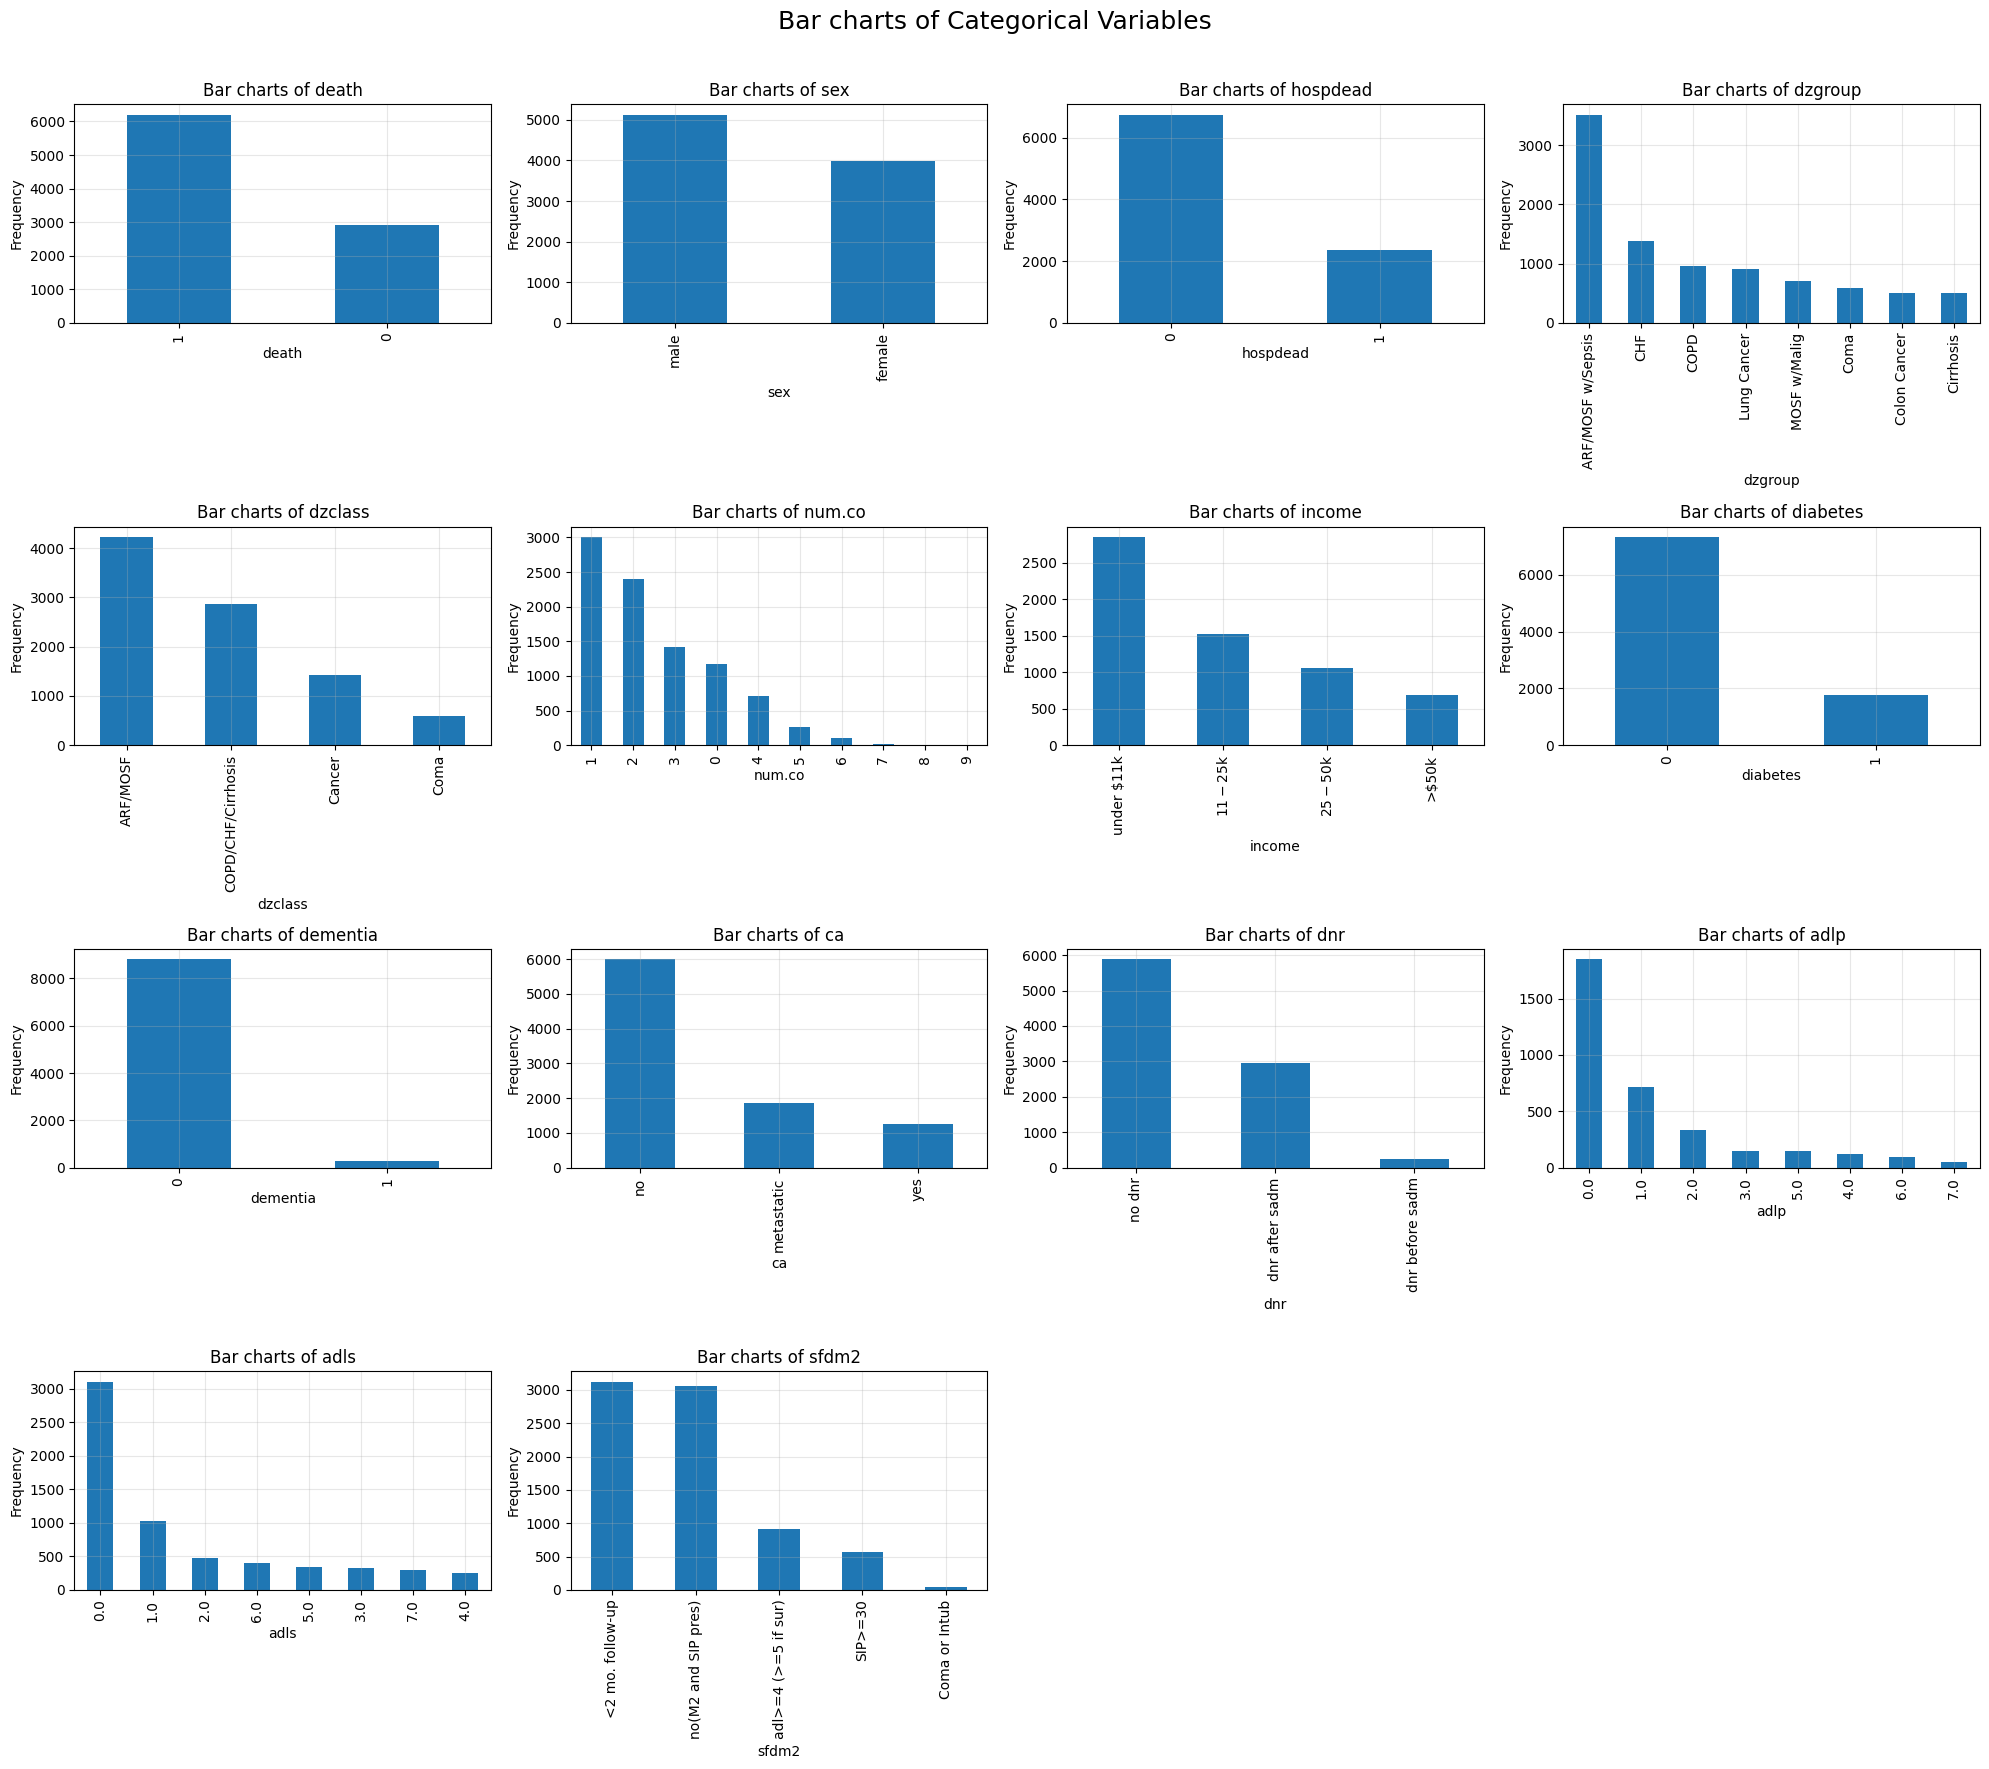

In [ ]:
# Function for plotting Bar Charts
def PlotBarCharts(inpData, colsToPlot, ncols=4, figsize=(20,18)):
    nrows = int(np.ceil(len(colsToPlot)/ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(colsToPlot):
        ax = axes[i]
        inpData[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(f'Bar charts of {col}')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

    for i in range(len(colsToPlot), len(axes)):
        axes[i].set_visible(False)

    fig.suptitle('Bar charts of Categorical Variables', fontsize=18)
    fig.tight_layout(rect=[0,0,1,0.97])
    return fig

# Calling the function
BeforeCat = PlotBarCharts(inpData=df, colsToPlot=['death', 'sex', 'hospdead', 'dzgroup', 'dzclass', 'num.co', 'income', 'diabetes',
                                                  'dementia', 'ca','dnr', 'adlp', 'adls', 'sfdm2'], ncols=4, figsize=(20, 18))

In [ ]:
# Save Image
import io

def fig_to_img(fig, dpi=150, close=False):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    if close:
        plt.close(fig)
    buf.seek(0)
    return Image.open(buf)

# Calling the function to save image
BeforeCat_img = fig_to_img(BeforeCat, dpi=150)

### **Bar Charts Interpretation**

**Interpretation**

**Selected Categorical Variables:** All the categorical variables are selected for further analysis.
* **death :** Selected. Two categories. More “0” than “1” (class imbalance).
* **hospdead :** Selected. Two categories. More “0” than “1” (class imbalance).
* **sex :** Selected. Balanced fairly well, only slight difference. Not really skewed.
* **dzgroup :** Selected. Strongly Right-skewed. Most patients in “ARF/MOSF/sepsis” and then fewer in other classes.
* **dzclass:** Selected. Right-skewed. Most cases in “ARF/MOSF,” then fewer in other classes.
* **num.co :** Selected. Right-skewed. Most people have 0–2 comorbidities, very few at high numbers (4–8).
* **income :** Selected. Left-skewed. Big chunk in “under $11k,” fewer in high brackets.
* **diabetes :** Selected. Two categories, mostly “0” (no diabetes), fewer “1” (has diabetes). (class imbalance)
* **dementia :** Selected. Two categories, extremely imbalanced. Most are “0.” **(Doubt)**
* **ca :** Selected. Imbalanced distribution across categories.
* **dnr :** Selected. Highly right-skewed. Most people at 0, decreasing as score increases.
* **adlp :** Selected. Highly right-skewed. Most people at 0, decreasing as score increases.
* **adls :** Selected. Highly right-skewed. Most people at 0, decreasing as score increases.
* **sfdm2 :** Selected. Two dominant categories. This variable is strongly skewed in the sense of class imbalance.

## **5.2. Visualize distribution of all the Continuous Predictor variables in the data using histograms and boxplots**

Based on the Basic Data Exploration, there are 25 continuous predictor variables : 'age', 'edu', 'scoma', 'avtisst', 'sps', 'aps', 'hday', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', and 'adlsc'

In [ ]:
def PlotHistChart(cols, ncols):
    nrows = int(np.ceil(len(cols) / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))
    axes = axes.flatten()

    for idx, col in enumerate(cols):
        ax = axes[idx]
        data = df[col].dropna()

        # Calculate statistics
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        skew_val = data.skew()
        unique_val = data.nunique()

        # Plot histogram
        n, bins, patches = ax.hist(data, bins=30, alpha=0.5, edgecolor='black', density=True)

        # Plot KDE (Kernel Density Estimation) - actual trend of data
        kde = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), 200)
        ax.plot(x, kde(x), color='lightblue', linestyle='-', linewidth=2, label='KDE (Actual Trend)')

        # Plot vertical lines for mean and median
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

        # Add text box with statistics
        ax.plot([], [], ' ', label=f'Std: {std_val:.2f}')
        ax.plot([], [], ' ', label=f'Skew: {skew_val:.2f}')

        # Set title and labels
        ax.set_title(col, fontsize=16)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.legend(loc='upper right', fontsize=12)
        ax.grid(True, alpha=0.3)

    for idx in range(len(cols), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle('Histograms of continuous features', fontsize=18, y=1)
    plt.tight_layout()
    plt.show()
    return fig

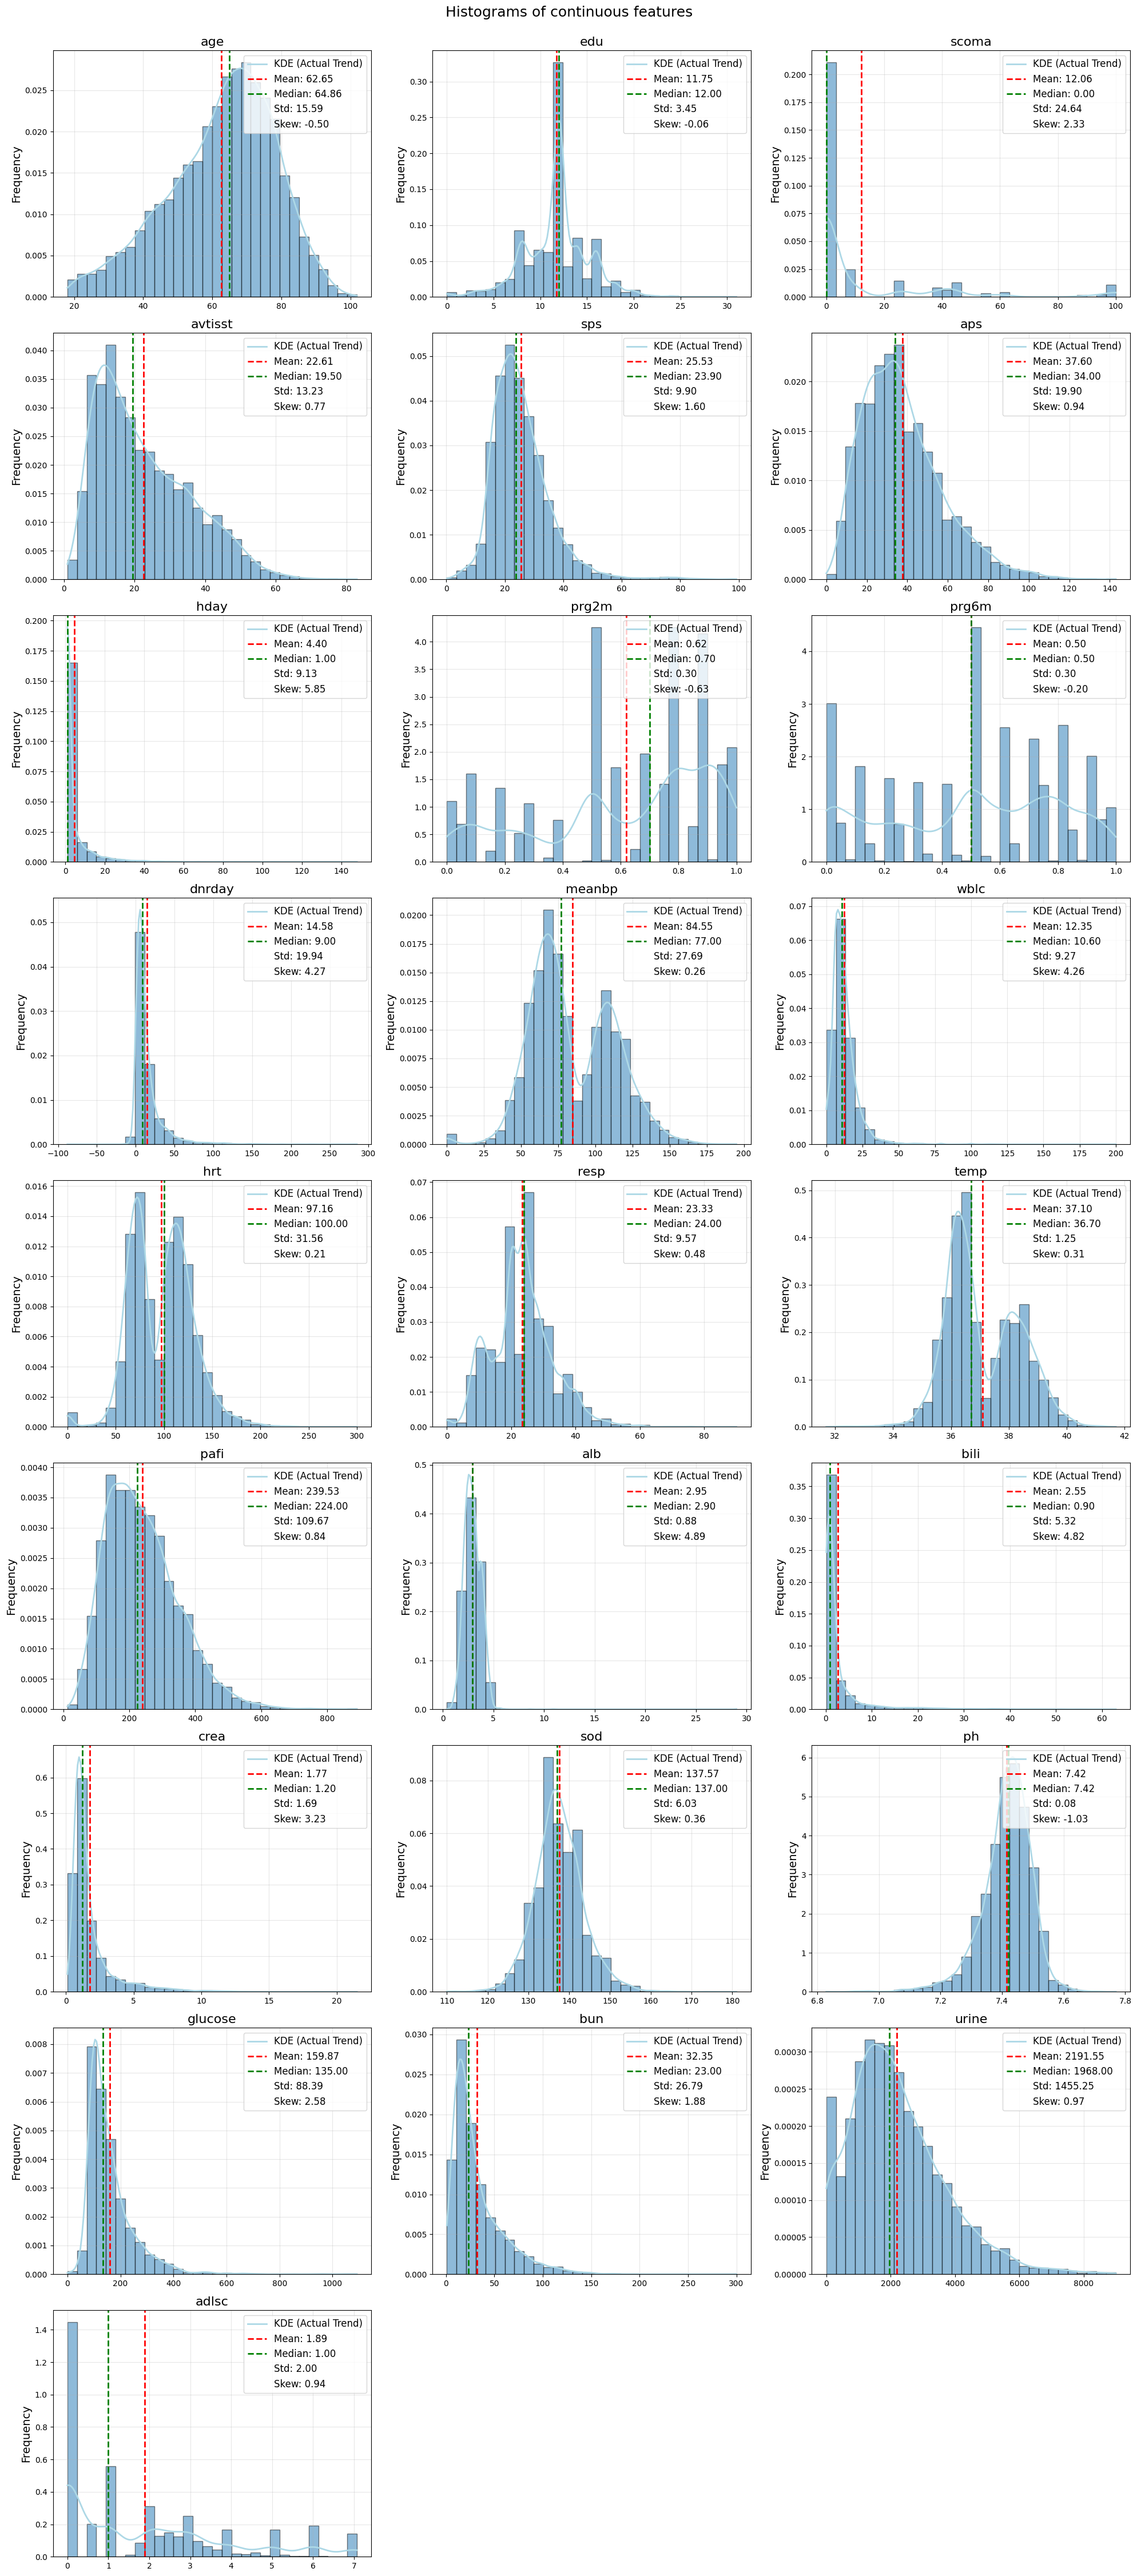

In [ ]:
# Plotting histograms of multiple columns together
continuous_cols= ['age', 'edu', 'scoma', 'avtisst', 'sps', 'aps', 'hday',
                  'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
                  'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlsc']

BeforeConHis = PlotHistChart(continuous_cols, ncols=3)

# Calling the function to save image
BeforeConHis_img = fig_to_img(BeforeConHis, dpi=150)

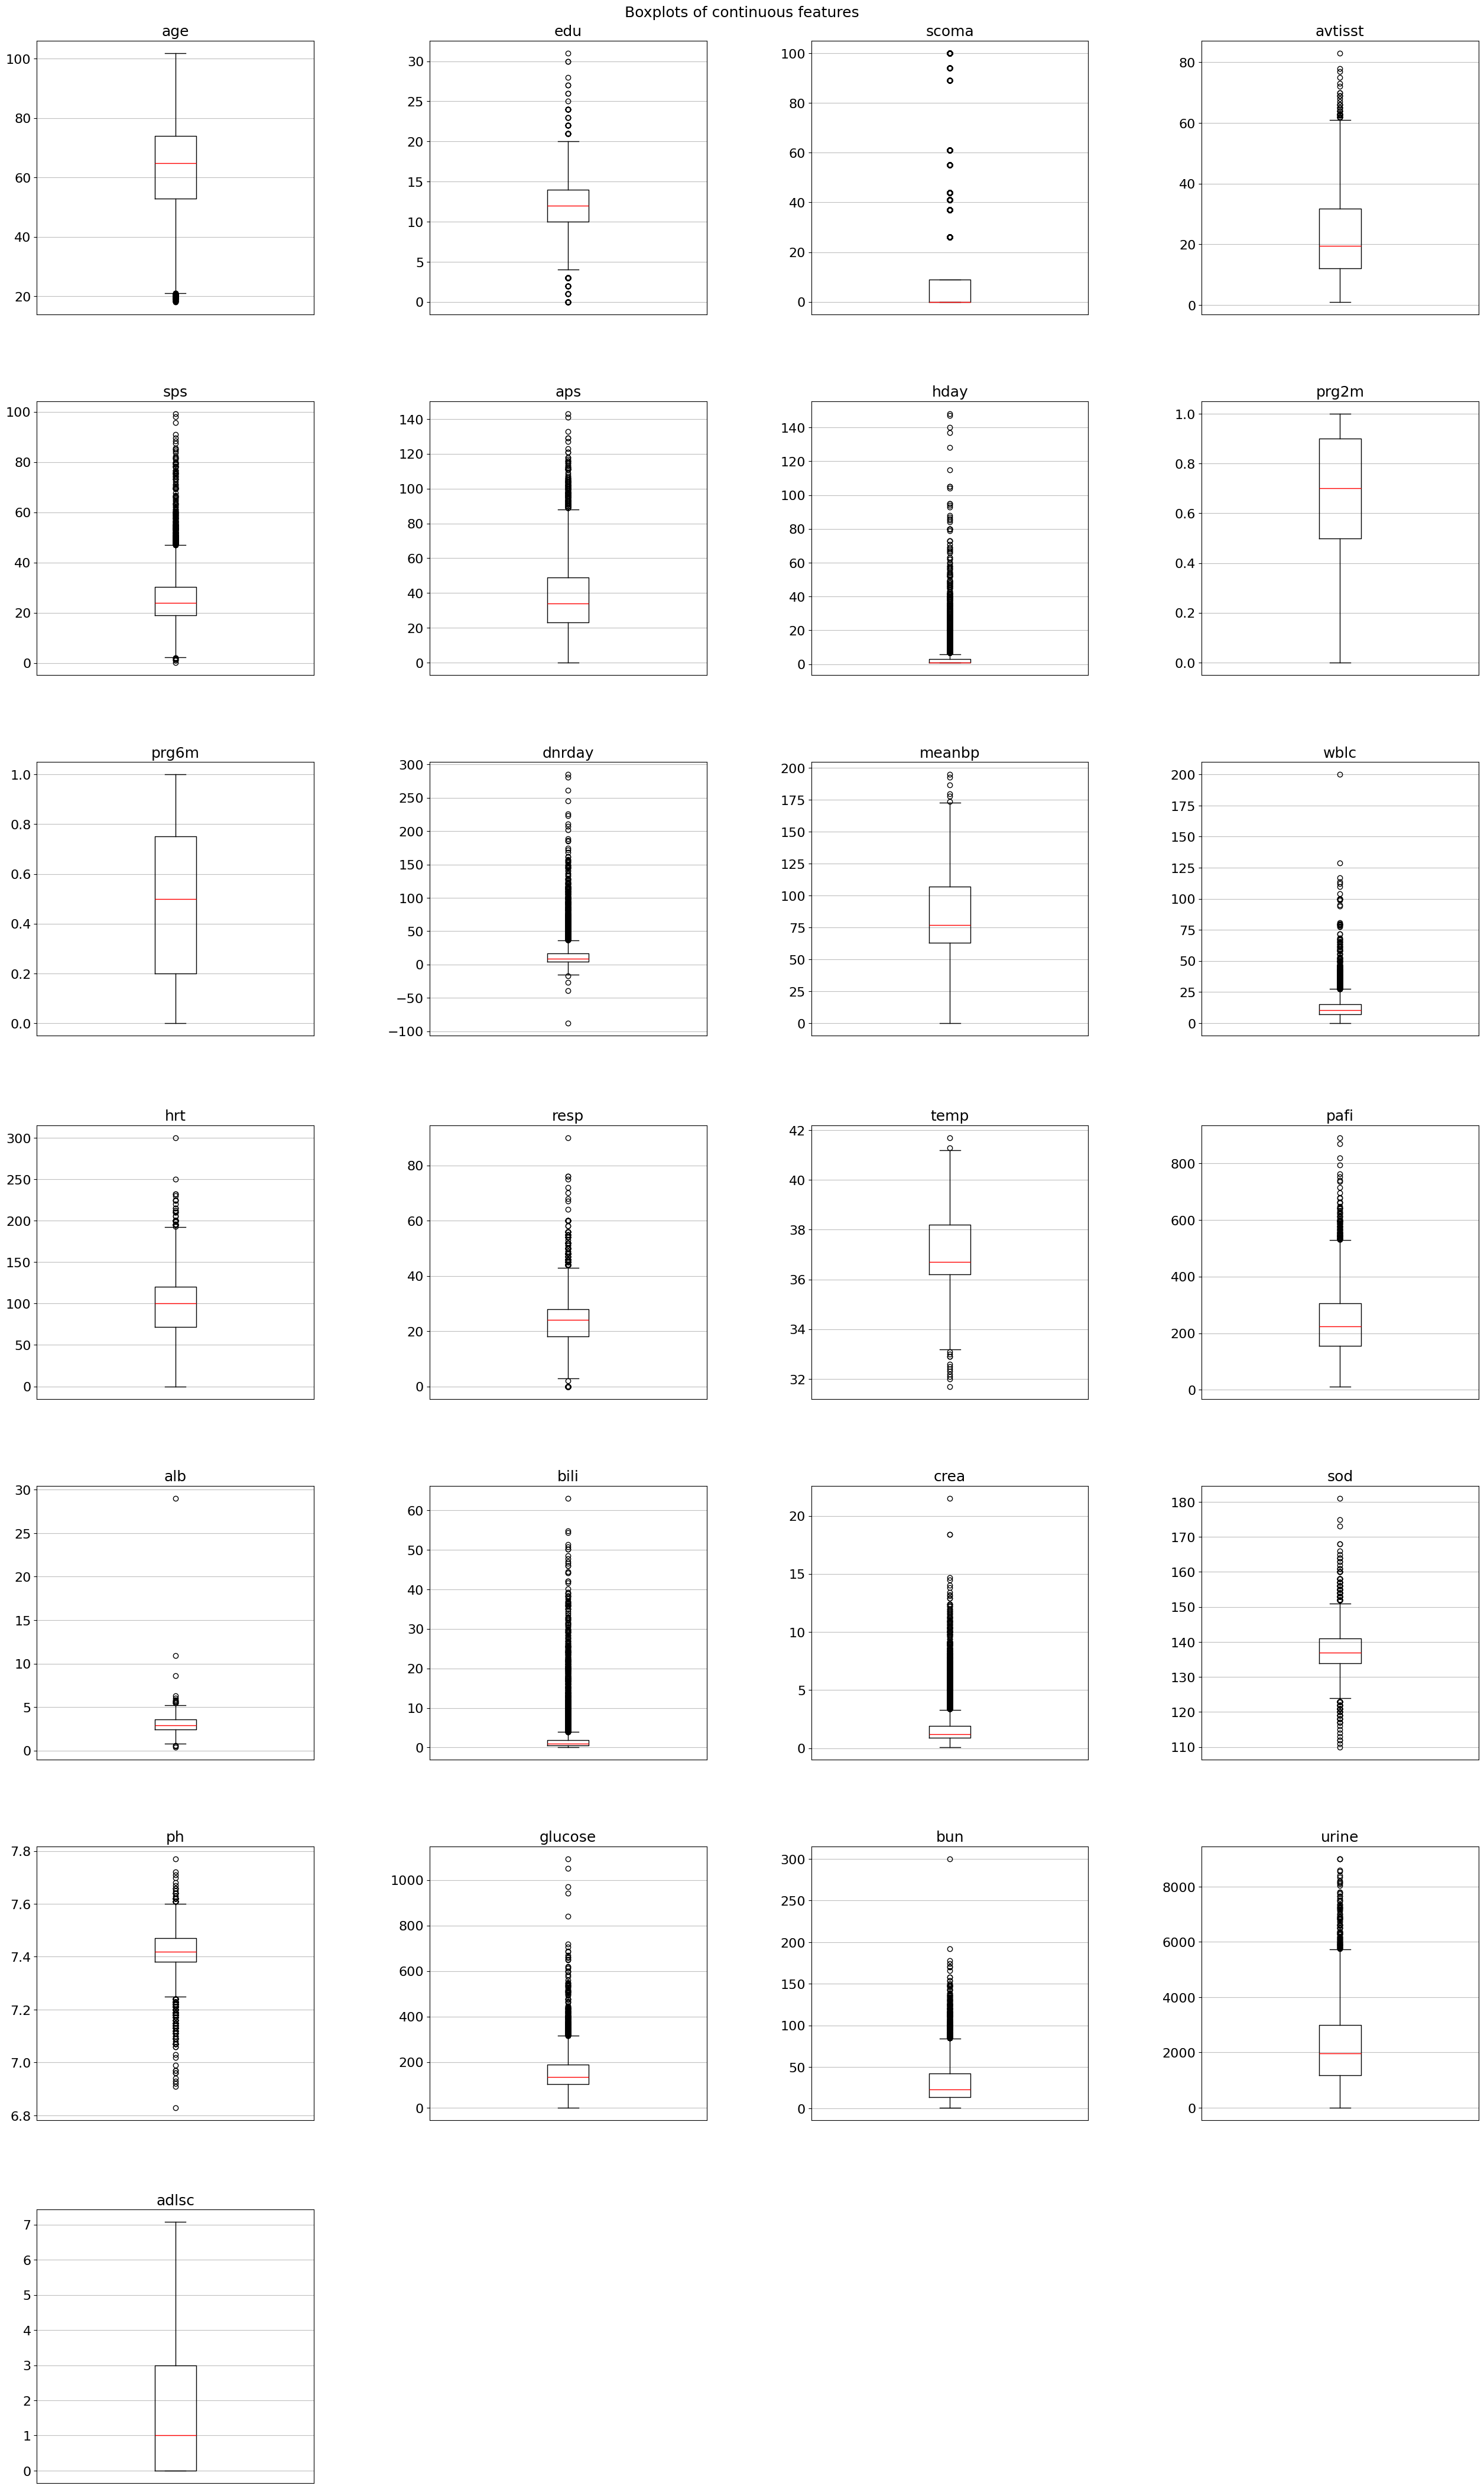

In [ ]:
def plot_multiple_boxplots(df, columns, ncols):
    n = len(columns)
    n_rows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        n_rows, ncols,
        figsize=(25, 6*n_rows),
        constrained_layout=True,
        gridspec_kw={'wspace': 0.2, 'hspace': 0.2}
    )
    axes = np.atleast_1d(axes).ravel()

    for i, col in enumerate(columns):
        s = pd.to_numeric(df[col], errors='coerce').dropna()
        axes[i].boxplot([s], medianprops=dict(color='red', linewidth=1))
        axes[i].set_title(col, fontsize=18)
        axes[i].set_xticks([])
        axes[i].grid(axis='both', alpha=0.8)
        axes[i].tick_params(axis='y', labelsize=16)

    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle('Boxplots of continuous features', fontsize=18)
    return fig

BeforeConBox = plot_multiple_boxplots(df, continuous_cols, ncols=4)
BeforeConBox_img = fig_to_img(BeforeConBox, dpi=150)

### **Histogram Interpretation**

ในการวิเคราะห์ Data Distribution ผ่าน Histogram ได้มีการแสดงค่าทางสถิติสำคัญเพื่อช่วยให้เข้าใจลักษณะของข้อมูลได้ชัดเจนมากขึ้น ดังนี้
- Mean: ใช้เพื่อดูแนวโน้มค่ากลางโดยรวมของข้อมูล หากข้อมูลมี skewed ค่า mean จะถูกลากไปส่วนปลายของการกระจาย ทำให้เราสามารถสังเกตทิศทางของการเบ้ได้จากตำแหน่งของ mean เมื่อเทียบกับ median
- Median: เป็นค่ากลางของข้อมูลเมื่อเรียงจากน้อยไปมาก ช่วยบ่งบอกตำแหน่งศูนย์กลางที่แท้จริงของข้อมูล และมีความทนทานต่อ outlier มากกว่า mean การเปรียบเทียบ median กับ mean จึงช่วยระบุว่าข้อมูลมี skewed ไปทางซ้ายหรือขวา
- Std (Standard Deviation): ใช้วัด data distribution รอบค่า mean โดยถ้าค่าสูงแสดงว่าข้อมูลกระจายกว้างหรือก็คือมีความแปรปรวนมาก แต่ถ้าค่าต่ำ แสดงว่าข้อมูลส่วนใหญ่อยู่ใกล้ค่า mean จึงช่วยบอกถึงความสม่ำเสมอของข้อมูลได้
- Skew (Skewness): ใช้แสดงทิศทางและระดับของ skewed ของข้อมูล โดยถ้า skewness > 0 แสดงว่า ข้อมูล skewed ไปทางขวา และถ้า skewness < 0 จะแสดงว่าข้อมูล skewed ไปทางซ้าย ซึ่งการดูค่าของ skewness จะช่วยให้ตีความลักษณะ data distribution ได้ชัดเจนมากขึ้น
- KDE (Kernel Density Estimate): เป็นเส้นโค้งที่ประมาณรูปแบบ data distribution อย่างต่อเนื่อง ช่วยให้เห็นแนวโน้มโดยไม่ขึ้นอยู่กับจำนวน bin ของ histogram ทำให้มองเห็นจุดที่ข้อมูลกระจุกมากที่สุดหรือ mode ได้ง่ายขึ้น

**Interpretation**

**Selected Continuous Variables:** All the continuous variables are selected for further analysis.

* **age :** Selected. Distribution is close to normal.
* **scoma :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **edu:** Selected. Slighty left-skewed, acceptable.
* **avtisst :** Selected. Right-skewed, acceptable.
* **sps :** Selected. Distribution is close to normal.
* **aps :** Selected. Right-skewed, acceptable.
* **hday :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **prg2m :** Selected. Multimodal distribution, acceptable. **(Doubt)**
* **prg6m :** Selected. Multimodal distribution, acceptable. **(Doubt)**
* **dnrday :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **meanbp :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them.
* **wblc :** Selected. Strongly right-skewed, acceptable. **(Doubt)**
* **hrt :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them.
* **resp :** Selected. Multimodal distribution, acceptable.
* **temp :** Selected. Bimodal distribution, acceptable.
* **pafi :** Selected. Right-skewed, acceptable. Outliers seen, need to treat them.
* **alb :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **bili :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **crea :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **sod :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them.
* **ph :** Selected. Slighty left-skewed, acceptable.
* **glucose :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **bun :** Selected. Strongly right-skewed, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **urine :** Selected. Bimodal distribution, acceptable. Outliers seen, need to treat them. **(Doubt)**
* **adlsc :** Selected. Multimodal distribution, acceptable. **(Doubt)**


# **6. Outlier treatment**



By examining the boxplots of each variable, some features may appear to have statistical outliers. However, when considering the medical context and the nature of the data, these values fall within plausible ranges. Therefore, no modifications or deletions are applied to these data points. The details are as follows:

- **age** : Patient ages are within the normal human range and are not considered outliers.
- **edu** : Patient education levels fall within the normal range and are therefore not considered outliers.
- **scoma** : Support Coma Score values, derived from the Glasgow Coma Scale (GCS), range from 0 to 100. The histogram shows all values are within a medically plausible range and are not outliers.
- **avtisst** : Indicates the complexity of ICU treatment, generally ranging from 0–70. All observed values are within a medically reasonable range and not outliers.
- **sps** : All values are within plausible medical ranges with no abnormal or noise.
- **aps** : All values are within plausible medical ranges with no abnormal or noise.
- **hday** : Admission day values are within plausible medical ranges with no abnormalities detected.
- **prg2m** : Predicted probability of outcome at 2 months, generally between 0–1, is fully within the expected range.
- **prg6m** : Predicted probability of outcome at 6 months, generally between 0–1, is fully within the expected range.
- **dnrday** : Number of days from DNR order, which can be negative if the DNR was made before admission, is within a medically plausible range.
- **wblc** : White blood cell (WBC) count, usually between 4–11 but can be as high as 100 in some cases, is within a medically reasonable range.
- **resp** : Patient respiratory rate is within plausible medical ranges with no abnormal values.
- **temp** : Body temperature values are reasonable and do not indicate noise.
- **ph** : Although some values deviate from the median, they are clinically meaningful and may reflect disease states, so they are not considered outliers.
- **adlsc** : Derived from the Activities of Daily Living Score (ADL), which has no fixed standard range as it depends on measurement criteria and study context. No outliers are detected in the boxplot, and all values are within appropriate ranges according to IQR criteria.

For other features not mentioned above, values were found outside medically plausible ranges and are therefore considered outliers. These features will undergo outlier treatment. The features include: 'meanbp', 'hrt', 'pafi', 'alb', 'bili', 'crea', 'sod', 'glucose', 'bun' and 'urine'

## **6.1 Replacing outliers for 'meanbp'**

- Normal Range: 70 - 100 mmHg
- Abnormal Range: < 60 mmHg or > 100 - 110 mmHg
- Clinically Implausible Range: < 40 mmHg or > 200 mmHg

In [ ]:
# Count the number of outliers (< 40 or > 200)
outliers = ((df['meanbp'] < 40) | (df['meanbp'] > 200)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 183
Outlier percentage: 2.01%


Mean arterial pressure (meanbp) values below 40 or above 200 mmHg were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 2.01% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['meanbp'].between(40, 200, inclusive='both') | df['meanbp'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

In [ ]:
from scipy.stats import gaussian_kde

def hist_box(col, bins=30):
    s = col.dropna()
    col_name = col.name
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    ax[0].hist(s, bins=bins, alpha=0.5, edgecolor='black', density=True)
    ax[0].set_title(f'Histogram: {col_name}')
    ax[0].set_xlabel(col_name)
    # Calculate statistics
    mean_val = s.mean()
    median_val = s.median()
    # Plot KDE
    kde = gaussian_kde(s)
    x = np.linspace(s.min(), s.max(), 200)
    ax[0].plot(x, kde(x), color='lightblue', linestyle='-', linewidth=2, label='KDE')
    # Plot mean and median
    ax[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax[0].legend()

    # Boxplot
    ax[1].boxplot(s, vert=True, showfliers=True)
    ax[1].set_title(f'Boxplot: {col_name}')
    ax[1].set_ylabel(col_name)
    ax[1].grid(axis='both', alpha=0.3)

    plt.tight_layout()
    plt.show()

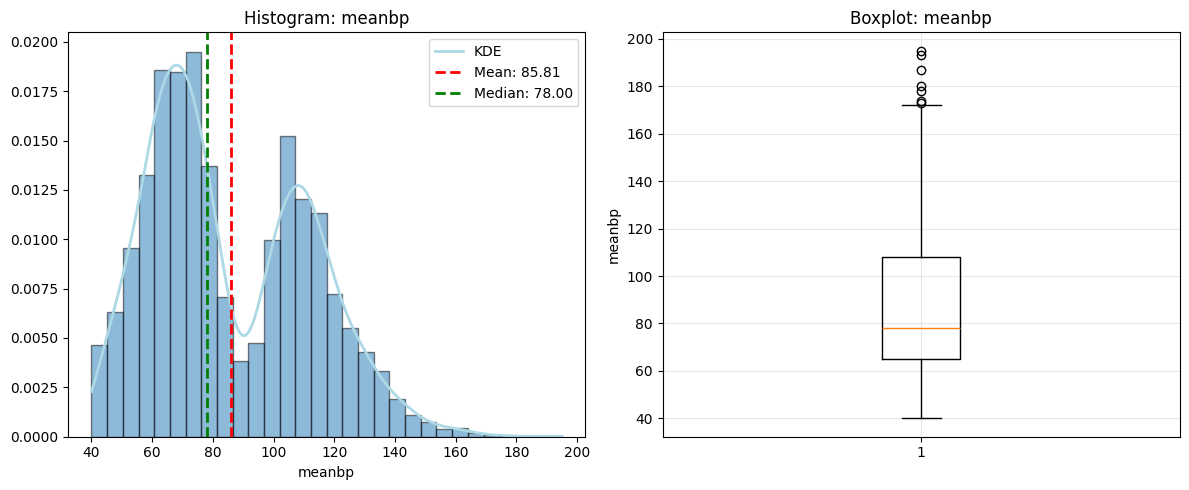

In [ ]:
# Calling function
hist_box(df['meanbp'])

## **6.2 Replacing outliers for 'hrt'**

- Normal Range: 60 - 100 bpm
- Abnormal Range: 30 - 200 bpm
- Clinically Implausible Range: < 20 bpm or > 250 bpm

In [ ]:
# Count the number of outliers (< 20 or > 250)
outliers = ((df['hrt'] < 20) | (df['hrt'] > 250)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 25
Outlier percentage: 0.28%


Heart rate (hrt) values below 20 or above 250 bpm were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.28% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.


In [ ]:
# Remove these outlier rows
df = df[df['hrt'].between(20, 250, inclusive='both') | df['hrt'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

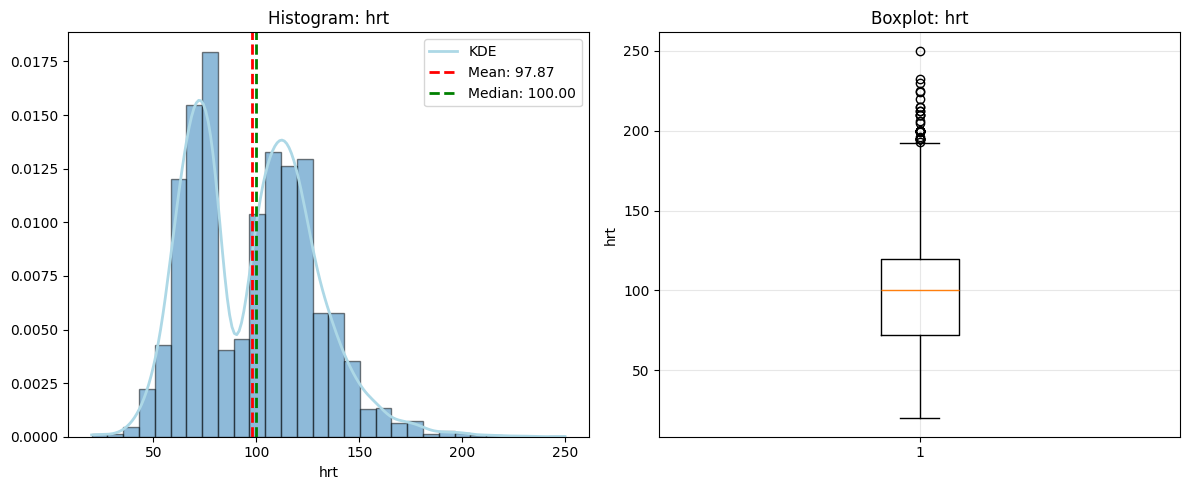

In [ ]:
# Calling function
hist_box(df['hrt'])

## **6.3 Replacing outliers for 'pafi'**

- Normal Range: > 400 mmHg
- Abnormal Range: > 100 – 400 mmHg
- Clinically Implausible Range: < 40 mmHg or > 600 mmHg

In [ ]:
# Count the number of outliers (< 40 or > 600)
outliers = ((df['pafi'] < 40) | (df['pafi'] > 600)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 37
Outlier percentage: 0.42%


pafi values below 40 or above 600 mmHg were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.42% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['pafi'].between(40, 600, inclusive='both') | df['pafi'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

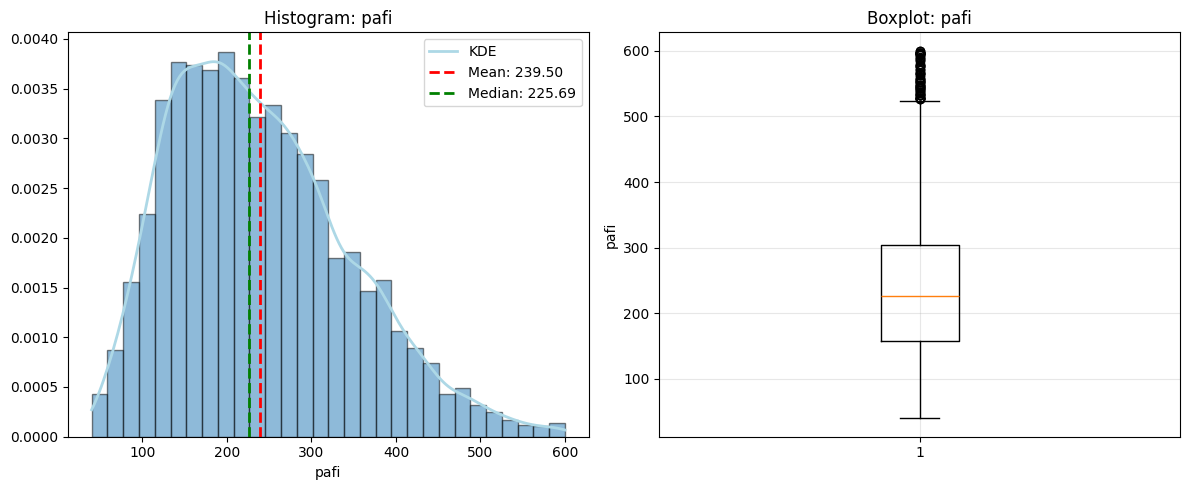

In [ ]:
# Calling function
hist_box(df['pafi'])

## **6.4 Replacing outliers for 'alb'**

- Normal Range: 3.5 – 5 g/dL
- Abnormal Range: > 5 g/dL
- Clinically Implausible Range: > 6 g/dL


In [ ]:
# Count the number of outliers (> 6)
outliers = ((df['alb'] > 6)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 4
Outlier percentage: 0.05%


alb values above 6 g/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.05% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Replacing outliers with Med value
df = df[(df['alb'] <= 6) | (df['alb'].isna())]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.


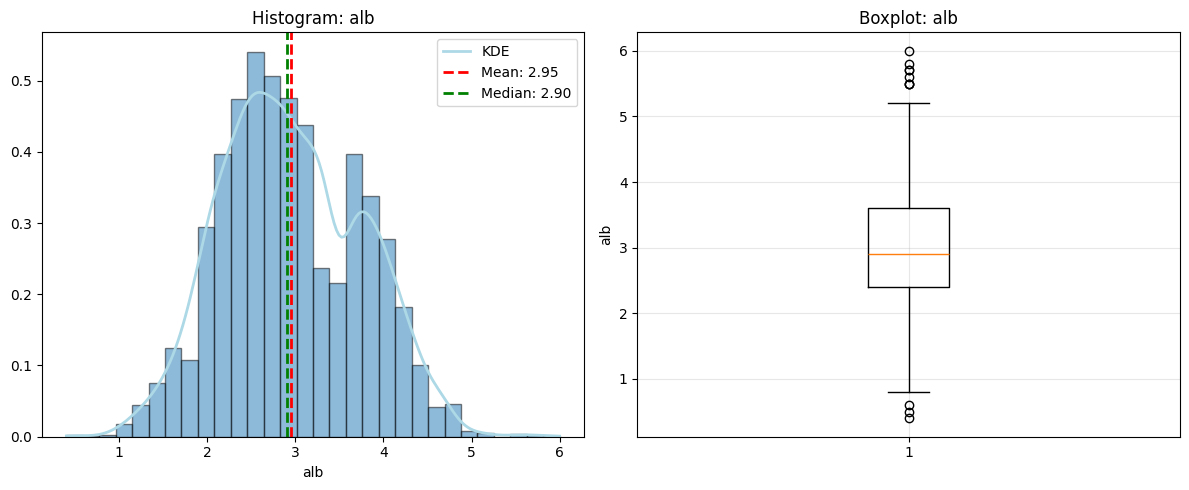

In [ ]:
# Calling function
hist_box(df['alb'])

## **6.5 Replacing outliers for 'bili'**

- Normal Range: 0.3 – 1.2 mg/dL
- Abnormal Range: > 1.2 – 20 mg/dL
- Clinically Implausible Range: > 20 mg/dL

In [ ]:
# Count the number of outliers (> 20)
outliers = ((df['bili'] > 20)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 148
Outlier percentage: 1.67%


bili values above 20 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 1.67% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[(df['bili'] <= 20) | (df['bili'].isna())]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

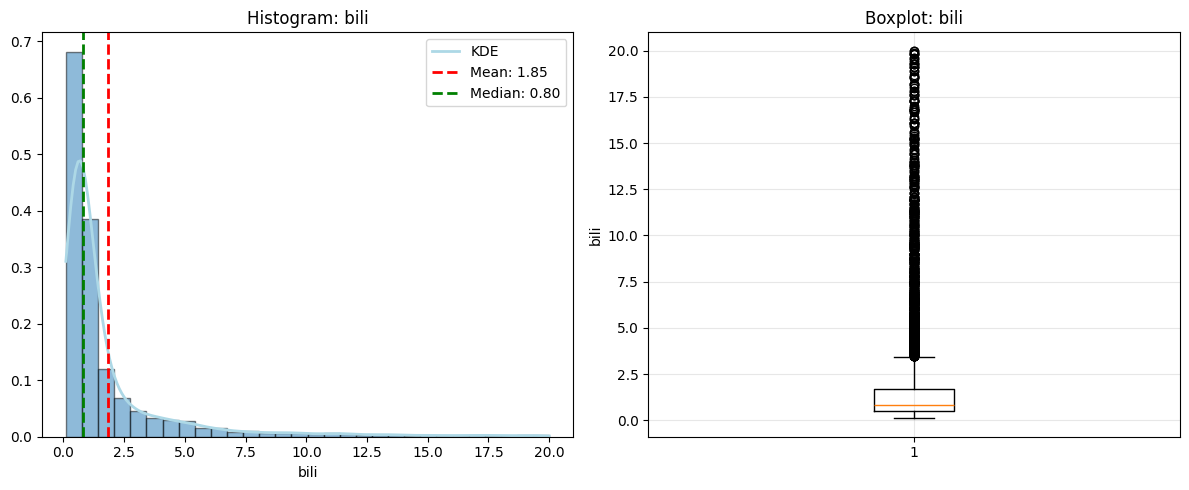

In [ ]:
# Calling function
hist_box(df['bili'])

## **6.6 Replacing outliers for 'crea'**

- Normal Range: 0.6 – 1.3 mg/dL
- Abnormal Range: > 1.3 mg/dL
- Clinically Implausible Range: < 0.1 or > 15 mg/dL

In [ ]:
# Count the number of outliers (< 0.1 or > 15)
outliers = ((df['crea']<0.1) | (df['crea']>15)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 4
Outlier percentage: 0.05%


crea values below 0.1 or above 15 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.05% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['crea'].between(0.1, 15, inclusive='both') | df['crea'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

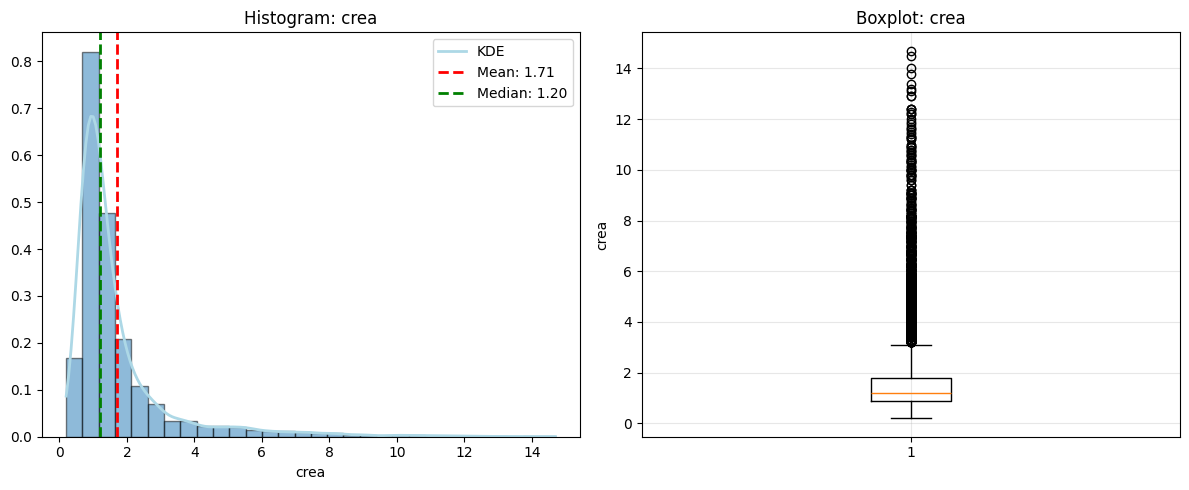

In [ ]:
# Calling function
hist_box(df['crea'])

## **6.7 Replacing outliers for 'sod'**

- Normal Range: 135 - 145 mEq/L
- Abnormal Range: 100 – < 135 or >1 45 – 170 mEq/L
- Clinically Implausible Range: < 100 or > 170 mEq/L

In [ ]:
# Count the number of outliers (< 100 or > 170)
outliers = ((df['sod'] < 100) | (df['sod'] > 170)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 2
Outlier percentage: 0.02%


sod values below 100 or above 170 mEq/L were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.02% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['sod'].between(100, 170, inclusive='both') | df['sod'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

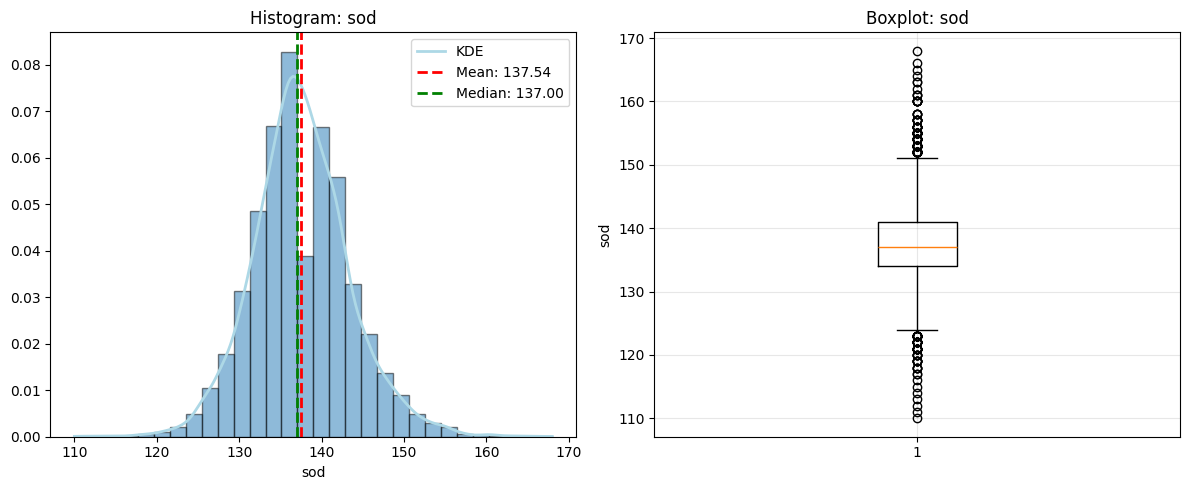

In [ ]:
# Calling function
hist_box(df['sod'])

## **6.8 Replacing outliers for 'glucose'**

- Normal Range: 70 – 99 mg/dL
- Abnormal Range: < 70 mg/dL or 100 – 125 mg/dL or ≥ 126 mg/dL
- Clinically Implausible Range: < 40 or > 600 mg/dL

In [ ]:
# Count the number of outliers (< 40 or > 600)
outliers = ((df['glucose'] < 40) | (df['glucose'] > 600)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 29
Outlier percentage: 0.33%


glucose values below 40 or above 600 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.33% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['glucose'].between(40, 6000, inclusive='both') | df['glucose'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

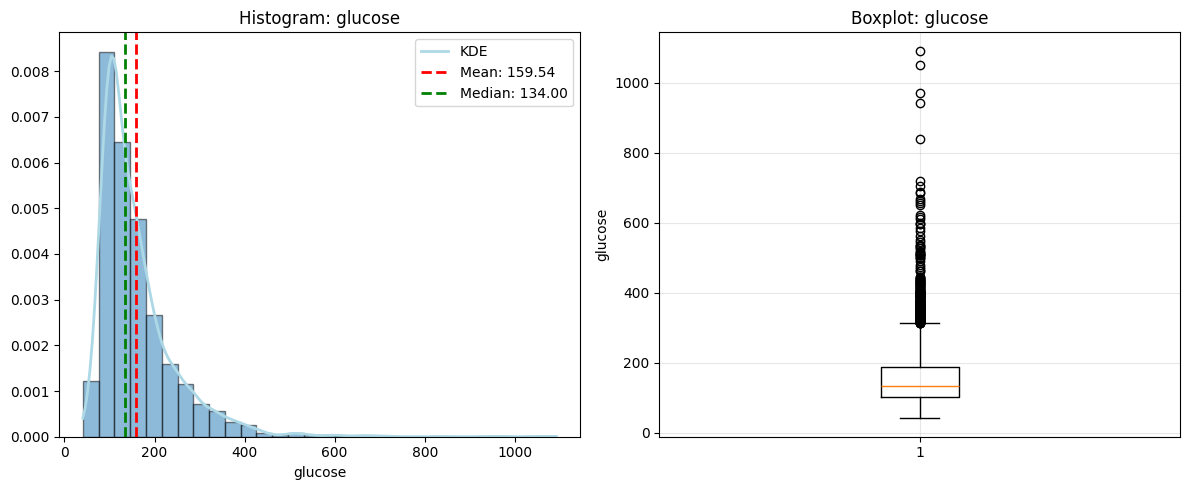

In [ ]:
# Calling function
hist_box(df['glucose'])

## **6.9 Replacing outliers for 'bun'**

- Normal Range: 7 - 20 mg/dL
- Abnormal Range: 2 – < 7 or 20 - 150 mg/dL
- Clinically Implausible Range: < 2 or > 150 mg/dL

In [ ]:
# Count the number of outliers (< 2 and > 150)
outliers = ((df['bun'] < 2) | (df['bun'] > 150)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 11
Outlier percentage: 0.13%


bun values below 2 or above 150 mg/dL were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 0.13% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['bun'].between(2, 150, inclusive='both') | df['bun'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

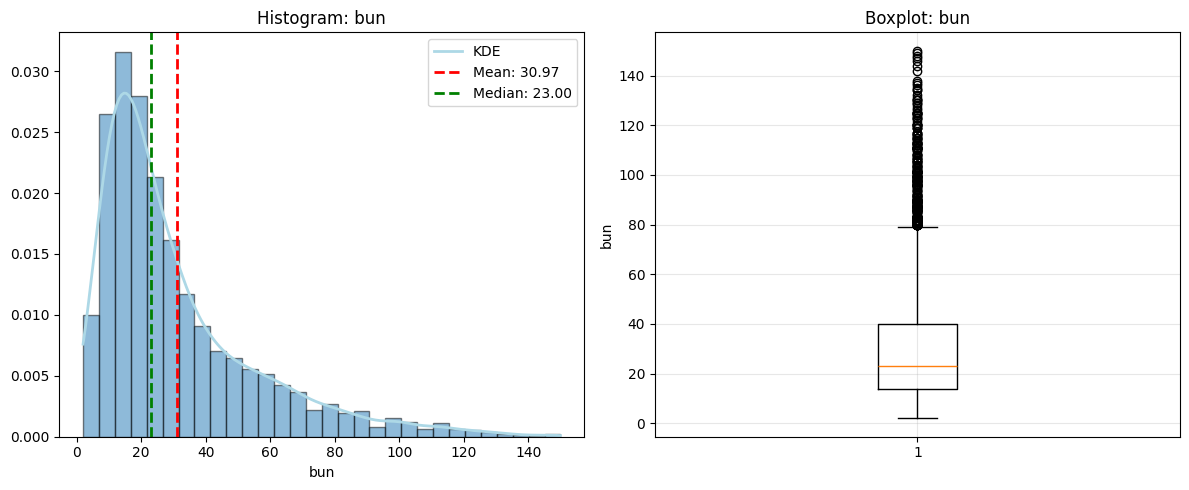

In [ ]:
# Calling function
hist_box(df['bun'])

## **6.10 Replacing outliers for 'urine'**

- Normal Range: 800 – 2000 mL/day
- Abnormal Range: < 400 or > 2500 mL/day
- Clinically Implausible Range: < 50 or > 6000 mL/day

In [ ]:
# Count the number of outliers (< 50 or > 6000)
outliers = ((df['urine'] < 50) | (df['urine'] > 6000)).sum()
print(f'Outlier count: {outliers}')

# Calculate percent of outliers
percent_outliers = (outliers / len(df)) * 100
print(f'Outlier percentage: {percent_outliers:.2f}%')

Outlier count: 186
Outlier percentage: 2.14%


urine values below 50 or above 6000 mL/day were deemed clinically implausible, likely arising from data entry errors or measurement issues. These outliers accounted for only about 2.14% of the entire dataset. Given their small proportion, they were removed to prevent bias and preserve data quality, and their exclusion did not compromise the overall integrity of the dataset.

In [ ]:
# Remove these outlier rows
df = df[df['urine'].between(50, 6000, inclusive='both') | df['urine'].isna()]

**Visualizing distribution after outlier treatment**

The distribution has improved after the outlier treatment. There is still a tail, but it is moderate and remains within the clinically plausible range; hence, it is acceptable.

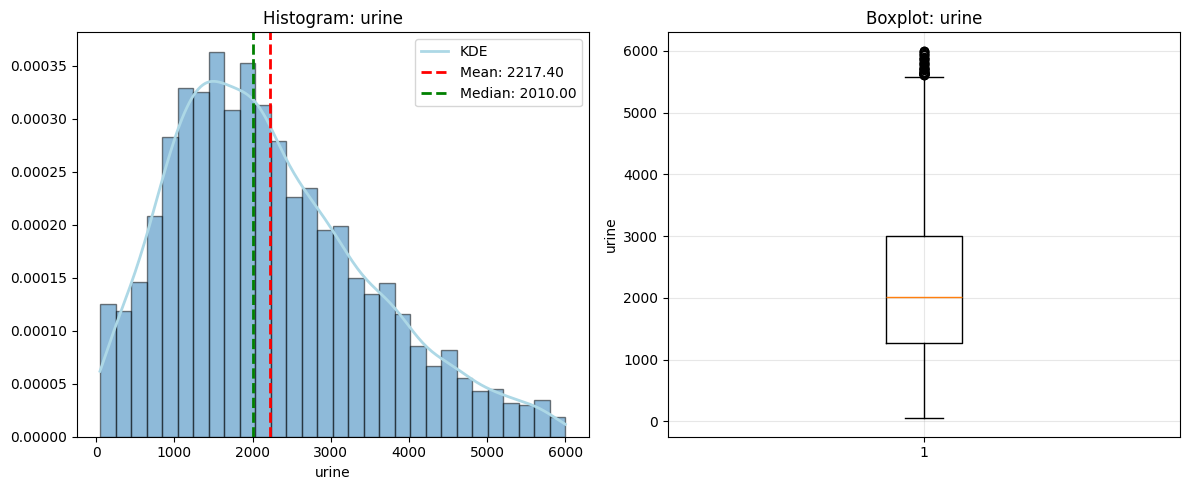

In [ ]:
# Calling function
hist_box(df['urine'])

# **7. Missing values treatment**



In [ ]:
print(df)

         age  death     sex  hospdead            dzgroup             dzclass  \
0    62.8500      0    male         0        Lung Cancer              Cancer   
1    60.3390      1  female         1          Cirrhosis  COPD/CHF/Cirrhosis   
2    52.7470      1  female         0          Cirrhosis  COPD/CHF/Cirrhosis   
3    42.3850      1  female         0        Lung Cancer              Cancer   
4    79.8850      0  female         0  ARF/MOSF w/Sepsis            ARF/MOSF   
...      ...    ...     ...       ...                ...                 ...   
9099 68.6160      0  female         0               COPD  COPD/CHF/Cirrhosis   
9100 66.0730      0    male         0  ARF/MOSF w/Sepsis            ARF/MOSF   
9102 70.3820      0    male         0  ARF/MOSF w/Sepsis            ARF/MOSF   
9103 47.0200      1    male         1       MOSF w/Malig            ARF/MOSF   
9104 81.5389      1  female         0  ARF/MOSF w/Sepsis            ARF/MOSF   

      num.co     edu      income   scom

In [ ]:
# Finding how many missing values are there for each column
missing_table = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percent': (df.isnull().sum() / len(df)) * 100}).round(2)

missing_table

Missing Count  Missing Percent
age                   0           0.0000
death                 0           0.0000
sex                   0           0.0000
hospdead              0           0.0000
dzgroup               0           0.0000
dzclass               0           0.0000
num.co                0           0.0000
edu                1500          17.6600
income             2785          32.8000
scoma                 1           0.0100
avtisst              78           0.9200
sps                   1           0.0100
aps                   1           0.0100
hday                  0           0.0000
diabetes              0           0.0000
dementia              0           0.0000
ca                    0           0.0000
prg2m              1512          17.8000
prg6m              1497          17.6300
dnr                  26           0.3100
dnrday               26           0.3100
meanbp                1           0.0100
wblc                205           2.4100
hrt                   1           0.0100
resp                  1           0.0100
temp                  1           0.0100
pafi               2247          26.4600
alb                3167          37.2900
bili               2479          29.1900
crea                 66           0.7800
sod                   1           0.0100
ph                 2207          25.9900
glucose            4290          50.5200
bun                4163          49.0200
urine              4661          54.8900
adlp               5195          61.1800
adls               2645          31.1500
sfdm2              1336          15.7300
adlsc                 0           0.0000

จากตารางข้างบนจะพบว่ามี Feature ที่มี Missing value > 30% ดังนั้นจะทำการลบ Feature ดังกล่าวออก เนื่องจากหากทำการ Imputation ต่อไป
ค่าที่ได้จะไม่ใช่ข้อมูลจริง ซึ่งอาจทำให้เกิดความคลาดเคลื่อน
และบิดเบือนการกระจายของข้อมูล ซึ่งอาจส่งผลต่อความแม่นยำ และความน่าเชื่อถือของโมเดลได้

**Columns removed due to missing values greater than 30%:** income, alb, glucose, bun, urine, adlp, adls

In [ ]:
# remove column with missing value greater than 30%
df = df.drop(columns=['income', 'alb', 'glucose', 'bun', 'urine', 'adlp', 'adls'])

ตรวจสอบขนาดข้อมูลหลังทำการลบ Column (Feature) ดังกล่าวออก

In [ ]:
df.shape

(8492, 32)

และทำการวิเคราะห์แต่ละ sample ว่ามีจำนวน Column ที่มีค่า Missing Value เท่าไร เนื่องจากหาก sample นั้น ๆ มีคอลัมน์ที่หายไปจำนวนมาก อาจส่งผลให้ข้อมูลของ sample นั้นขาดความน่าเชื่อถือ และอาจทำให้ Model เรียนรู้ผิดเพี้ยนจากความเป็นจริงได้

โดยเพื่อรักษาคุณภาพของข้อมูล จึงกำหนดว่า
หาก sample ใดมี Column ที่หายไปเกินกว่า 15 Column ซึ่งคิดเป็นครึ่งหนึ่งของจำนวน Column ทั้งหมด (ไม่รวม Column Target) จะทำการลบ sample ดังกล่าวออก

In [ ]:
# คำนวณจำนวนคอลัมน์ของ df เดิม
n_features = df.shape[1]

# สร้างผลลัพธ์ชั่วคราว: จำนวนและเปอร์เซ็นต์ missing ต่อแถว (ทุกแถว)
row_missing_count = df.isnull().sum(axis=1)
row_missing_percent = (row_missing_count / n_features * 100).round(2)
table_missing_count_by_column = pd.DataFrame({
    'Missing Count': row_missing_count,
    'Missing Percent': row_missing_percent
})
table_missing_count_by_column = table_missing_count_by_column.sort_values(['Missing Count', 'Missing Percent'], ascending=False)

table_missing_count_by_column


Missing Count  Missing Percent
5393             11          34.3800
5440             10          31.2500
420               8          25.0000
574               8          25.0000
2519              8          25.0000
...             ...              ...
9086              0           0.0000
9090              0           0.0000
9091              0           0.0000
9095              0           0.0000
9103              0           0.0000

[8492 rows x 2 columns]

จากตารางด้านบน พบว่า Sample ที่มีจำนวน Column ที่หายไปมากที่สุดมีทั้งหมด 11 Column และไม่มี Sample ใดที่มี Column ที่หายไปเกินกว่า 15 Column ดังนั้นจึง ไม่ได้ตัด Sample ใด ๆ ออกจากชุดข้อมูล

## **7.1 Missing values treatment in Feature**

### **Treatment of Missing Values for Continuous Variables**

The method for selecting an appropriate imputation technique is summarized in the table below, based on the skewness.

| Distribution | Skewness Range | Imputation Method | Reason |
| ----------------------- | ------- | ------- | ------- |
| Normal distribution | ≈ 0 | Mean | มีการแจกแจงสมมาตร → Mean จึงเป็นตัวแทนค่ากลางที่ดีที่สุด |
| Approximately normal distribution | (-0.5, 0.5) |  Mean | ข้อมูลเบ้เล็กน้อยเกือบสมมาตร → Mean จึงยังคงเป็นตัวแทนค่ากลางที่แม่นยำและใช้ได้ดีที่สุด |
| Slightly Skewed | (–1, –0.5) ∪ (0.5, 1) |  Mean | ข้อมูลเบ้เล็กน้อย → Mean อาจถูกลากเล็กน้อยแต่ยังสะท้อนแนวโน้มโดยรวมของข้อมูลได้ดี และมีประสิทธิภาพทางสถิติสูงกว่า Median |
| Highly Skewed | (-inf,-1] U [1,inf) | Median | ข้อมูลเบ้มาก → Mean จะถูกดึงไปทางหางของข้อมูล ทำให้ Median ซึ่งไม่ไวต่อค่าผิดปกติเหมาะสมกว่า |

In [ ]:
# Check skewness of continuous variables
# continuous columns
continuous_cols = ['age', 'edu', 'scoma', 'avtisst', 'sps', 'aps', 'hday','prg2m',
                   'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi',
                   'bili', 'crea', 'sod', 'ph', 'adlsc']

# skew + missing
sk = df[continuous_cols].skew(numeric_only=True)
missing = df[continuous_cols].isna().sum()

# choose method by |skew|
impute = []
for c in continuous_cols:
    if missing[c] == 0: impute.append("none")       # keep original
    else:
        if abs(sk[c]) < 0.5: impute.append("mean")   # mean
        else: impute.append("median")                # median

summary = pd.DataFrame({"skewness": sk.values, "missing_count": missing.values,
                       "impute_with": impute}, index=continuous_cols)

print("The method for selecting an appropriate imputation technique (based on skewness).")
print("(mean = average value, median = middle value, none = keep original)\n")
print(summary)

The method for selecting an appropriate imputation technique (based on skewness).
(mean = average value, median = middle value, none = keep original)

         skewness  missing_count impute_with
age       -0.5076              0        none
edu       -0.0569           1500        mean
scoma      2.4370              1      median
avtisst    0.7856             78      median
sps        1.2500              1      median
aps        0.9275              1      median
hday       6.0342              0        none
prg2m     -0.6528           1512      median
prg6m     -0.2211           1497        mean
dnrday     4.3626             26      median
meanbp     0.4662              1        mean
wblc       4.5080            205      median
hrt        0.4153              1        mean
resp       0.5571              1      median
temp       0.3411              1        mean
pafi       0.6388           2247      median
bili       3.4536           2479      median
crea       3.2838             66      m

From the table above, the features imputed with the **'Mean'** are: 'edu', 'pafi', 'ph', 'avtisst', 'aps', 'prg2m', 'prg6m', 'meanbp', 'hrt', 'resp', 'temp', 'sod'

In [ ]:
# Calculate Mean and Replace that value in Missing values
df['edu'] = df['edu'].fillna(df['edu'].mean())                 # edu
df['pafi'] = df['pafi'].fillna(df['pafi'].mean())              # pafi
df['ph'] = df['ph'].fillna(df['ph'].mean())                    # ph
df['avtisst'] = df['avtisst'].fillna(df['avtisst'].mean())     # avtisst
df['aps'] = df['aps'].fillna(df['aps'].mean())                 # aps
df['prg2m'] = df['prg2m'].fillna(df['prg2m'].mean())           # prg2m
df['prg6m'] = df['prg6m'].fillna(df['prg6m'].mean())           # prg6m
df['meanbp'] = df['meanbp'].fillna(df['meanbp'].mean())        # meanbp
df['hrt'] = df['hrt'].fillna(df['hrt'].mean())                 # hrt
df['resp'] = df['resp'].fillna(df['resp'].mean())              # resp
df['temp'] = df['temp'].fillna(df['temp'].mean())              # temp
df['sod'] = df['sod'].fillna(df['sod'].mean())                 # sod

The features imputed with **'Median'** are: 'scoma', 'sps', 'dnrday', 'wblc', 'bili', 'crea'

In [ ]:
# Calculate Median and Replace that value in Missing values
df['scoma'] = df['scoma'].fillna(df['scoma'].median())           # scoma
df['sps'] = df['sps'].fillna(df['sps'].median())                 # sps
df['dnrday'] = df['dnrday'].fillna(df['dnrday'].median())        # dnrday
df['wblc'] = df['wblc'].fillna(df['wblc'].median())              # wblc
df['bili'] = df['bili'].fillna(df['bili'].median())              # bili
df['crea'] = df['crea'].fillna(df['crea'].median())              # crea

### **Treatment of Missing Values for Categorical Variables**

Choose imputation with **'Mode'** for categorical variables.

Categorical Feature : 'dnr', 'sfdm2'

In [ ]:
# Calculate Mode and Replace that value in Missing values
df['dnr'] = df['dnr'].fillna(df['dnr'].mode()[0])           # dnr
df['sfdm2'] = df['sfdm2'].fillna(df['sfdm2'].mode()[0])     # sfdm2

ตรวจสอบจำนวน Missing Value อีกครั้งว่าไม่มี Variable ตัวใดที่มี Missing Value แล้ว

In [ ]:
# Recheck if there are any missing values left
df.isnull().sum()

age         0
death       0
sex         0
hospdead    0
dzgroup     0
dzclass     0
num.co      0
edu         0
scoma       0
avtisst     0
sps         0
aps         0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
bili        0
crea        0
sod         0
ph          0
sfdm2       0
adlsc       0
dtype: int64

ตรวจสอบขนาดข้อมูลพบว่าเหลือ 8492 Samples และ 32 Columns (31 Features and 1 Target) จากเดิมก่อนการทำ Missing Values Tratment ที่มี 8492 Samples และ 39 Columns (38 Features and 1 Target)

In [ ]:
# Check the number of row
df.shape

(8492, 32)

## **7.2 Summary after treatment by Outlier and Missing value**

หลังจากทำการ Outlier Treatment แล้ว ได้ทำการตรวจสอบ Distribution อีกครั้ง เพื่อประเมินผลของการทำ Outlier Treatment

== Category Variables ==
Before: Categorical Bar Charts


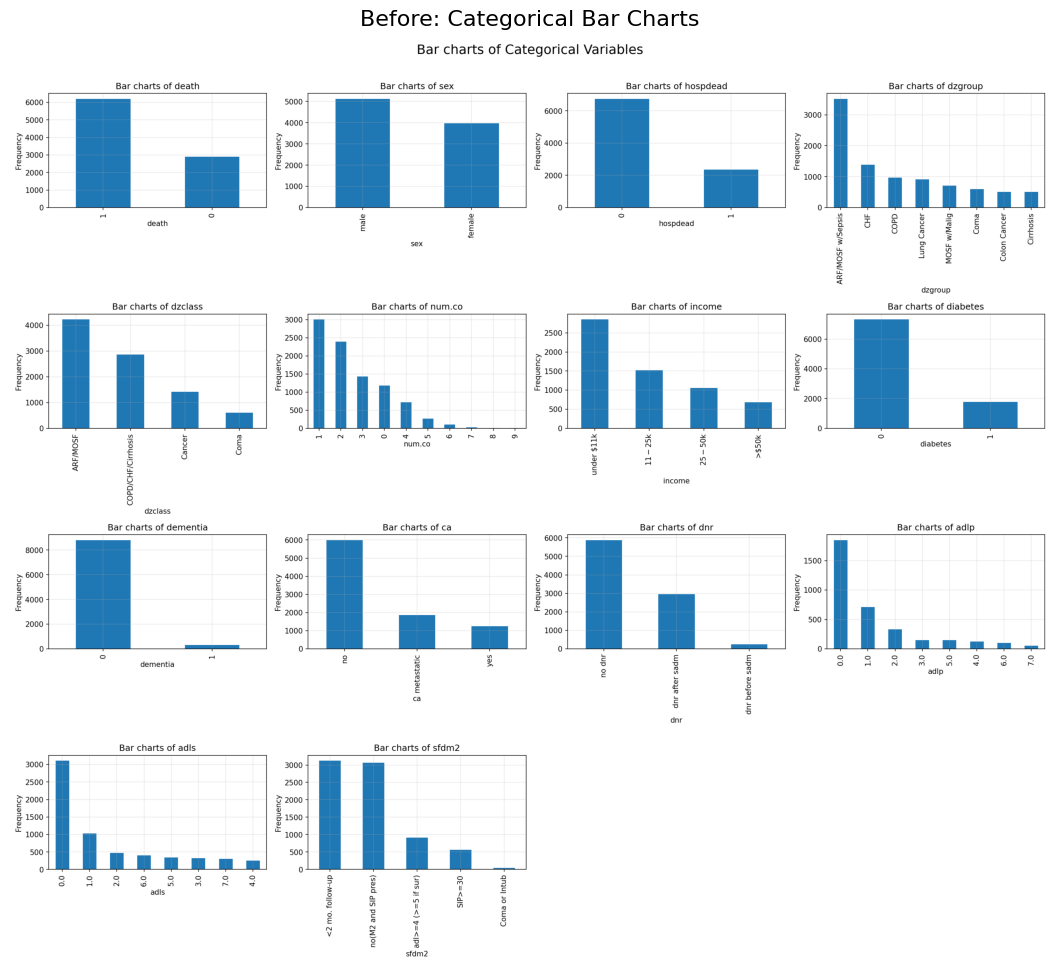

After:  Categorical Bar Charts


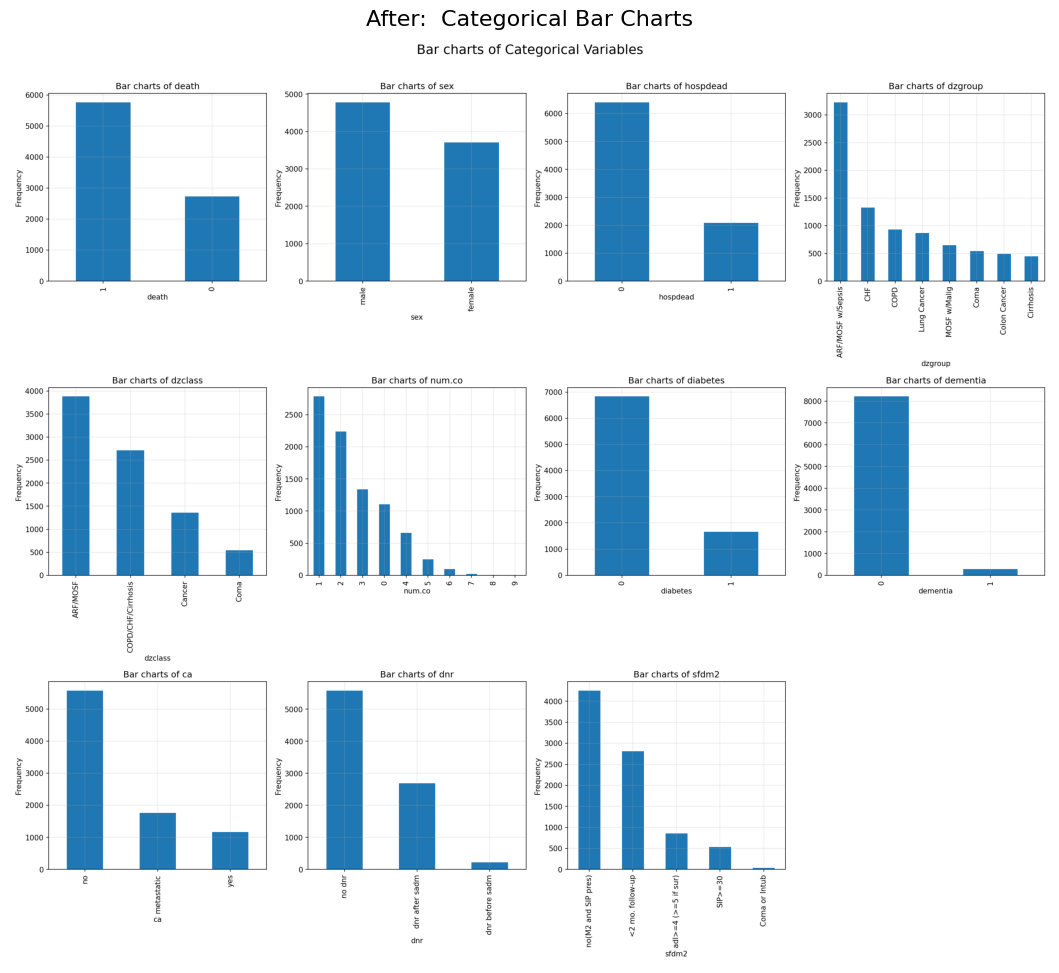


== Continuous Variables — Histograms ==
Before: Continuous Histograms


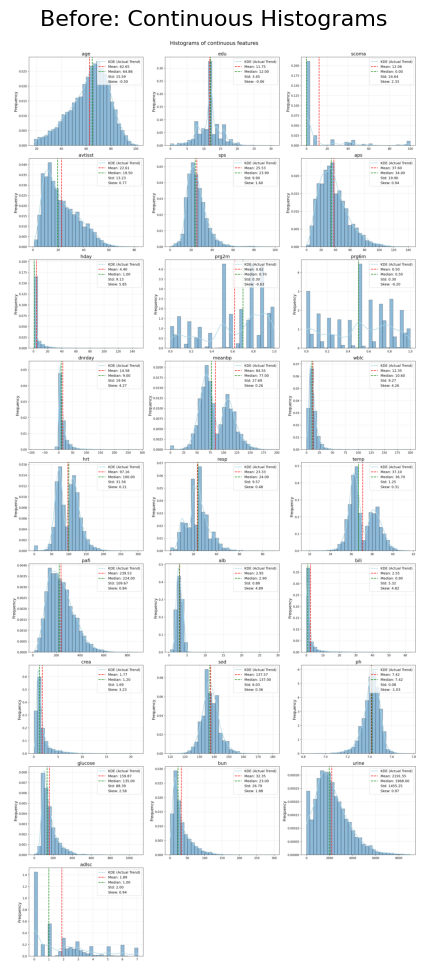

After:  Continuous Histograms


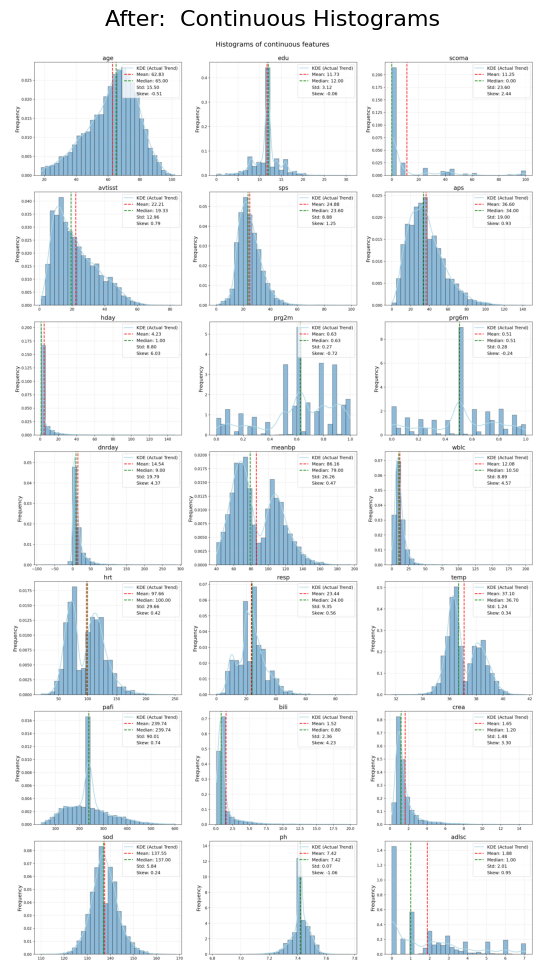


== Continuous Variables — Boxplots ==
Before: Boxplots


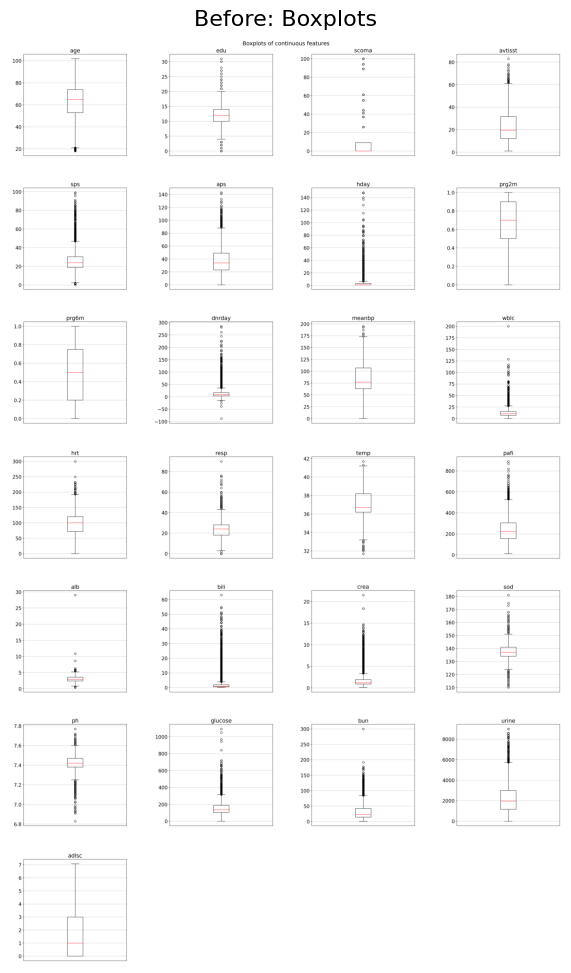

After:  Boxplots


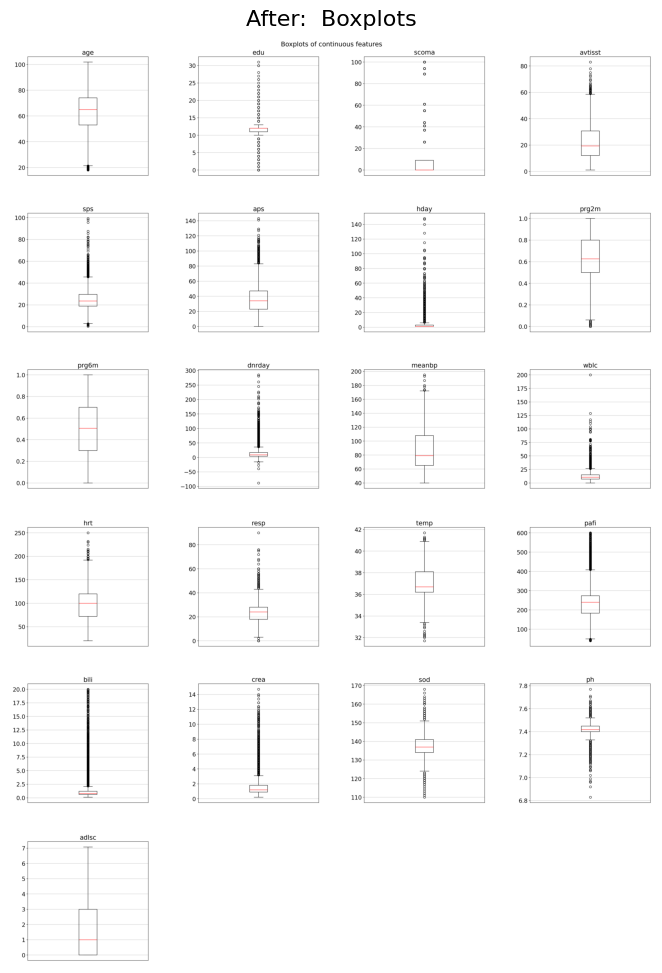

In [ ]:
# ==== Columns ====
cat_cols = ['death', 'sex', 'hospdead', 'dzgroup', 'dzclass', 'num.co',
            'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']

continuous_cols = ['age', 'edu', 'scoma', 'avtisst', 'sps', 'aps', 'hday',
                   'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt',
                   'resp', 'temp', 'pafi', 'bili', 'crea', 'sod', 'ph', 'adlsc']

from io import BytesIO
from contextlib import contextmanager

# ==== Helper: ปิดการแสดงผลระหว่างสร้างภาพ ====
@contextmanager
def suppress_mpl_display():
    prev_show = plt.show
    def _nop(*a, **k):
        pass
    plt.show = _nop
    try:
        with plt.ioff():
            yield
    finally:plt.show = prev_show

# ==== Helper: แปลง Figure -> ndarray (RGB) ====
def fig_to_img(fig=None, dpi=150, close=False, fallback_current=True):
    if fig is None and fallback_current:
        fig = plt.gcf()
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    if close:plt.close(fig)
    buf.seek(0)
    return np.array(Image.open(buf).convert("RGB"))

# ==== Helper: เรียกฟังก์ชันพล็อต -> ได้ img ไม่ว่าฟังก์ชันจะ return fig หรือไม่ ====
def run_plot_to_img(plot_callable, dpi=150):
    with plt.ioff():
        before = set(plt.get_fignums())
        maybe_fig = plot_callable()   # อาจคืน fig หรือ None
        after = set(plt.get_fignums())
        new_nums = sorted(after - before)
        if maybe_fig is not None: fig = maybe_fig
        elif new_nums: fig = plt.figure(new_nums[-1])
        else: fig = plt.gcf()
        return fig_to_img(fig, dpi=dpi, close=True, fallback_current=True)

# ==== Helper: แสดงภาพพร้อมหัวข้อ (ข้ามถ้า None) ====
def _to_ndarray(img):
    if img is None: return None
    if isinstance(img, Image.Image): return np.array(img.convert("RGB"))
    return img

def show_one_with_title(title, img, figsize=(18, 12)):
    print(f"{title}")
    plt.figure(figsize=figsize)
    plt.imshow(_to_ndarray(img))
    plt.title(title, fontsize=16, pad=10)
    plt.axis('off')
    plt.show()

# ==== สร้างภาพ After ทั้งหมด  ====
with suppress_mpl_display():
    AfterCat_img    = run_plot_to_img(lambda: PlotBarCharts(inpData=df, colsToPlot=cat_cols, ncols=4, figsize=(20, 18)), dpi=150)
    AfterConHis_img = run_plot_to_img(lambda: PlotHistChart(continuous_cols, ncols=3), dpi=150)
    AfterConBox_img = run_plot_to_img(lambda: plot_multiple_boxplots(df, continuous_cols, ncols=4), dpi=150)

# ==== รูป Before จาก environment ====
BeforeCat_img    = BeforeCat_img    if 'BeforeCat_img'    in globals() else None
BeforeConHis_img = BeforeConHis_img if 'BeforeConHis_img' in globals() else None
BeforeConBox_img = BeforeConBox_img if 'BeforeConBox_img' in globals() else None

# ==== แสดงผลตามลำดับที่กำหนด พร้อมชื่อ ====
print("== Category Variables ==")
show_one_with_title("Before: Categorical Bar Charts", BeforeCat_img)
show_one_with_title("After:  Categorical Bar Charts",  AfterCat_img)

print("\n== Continuous Variables — Histograms ==")
show_one_with_title("Before: Continuous Histograms", BeforeConHis_img)
show_one_with_title("After:  Continuous Histograms",  AfterConHis_img)

print("\n== Continuous Variables — Boxplots ==")
show_one_with_title("Before: Boxplots", BeforeConBox_img)
show_one_with_title("After:  Boxplots",  AfterConBox_img)

- Distribution ของ Categorical Variables หลังการทำ Missing value Treatment (ไม่มีการทำ Outlier Treatment):
  - Categorical Distribution เหมือนเดิมกับก่อนการทำ Missing Treatment
  - ไม่มีการสูญหายของ class หรือการเปลี่ยนแปลงสัดส่วนอย่างมีนัยสำคัญ
  - การทำ Missing value Treatment ไม่ส่งผลกระทบต่อ Class Balance

  สรุปได้ว่าขั้นตอน Missing value Treatment ในข้อมูลประเภท Categorical ไม่ทำให้เกิด Bias หรือ Distortion ต่อโครงสร้างข้อมูลเดิม

- Distribution ของ Continuous Variables หลังการทำ Outlier และ Missing value Treatment:
  - Outlier ลดลงอย่างเห็นได้ชัด และไม่ทำลายรูปแบบข้อมูลเดิม
  - Distribution Shape มีแนวโน้มเข้าใกล้การแจกแจงแบบ Normal มากขึ้น
  - ค่า Mean และ Std มีแนวโน้มลด Skewness ลง

  สรุปได้ว่าการทำ Outlier Treatment และ Missing Value Treatment ช่วยให้ข้อมูลมีการกระจายตัวที่ใกล้เคียง Normal Distribution มากขึ้น ลดผลจาก Outlier

# **8 Split data for Train (80%) & Test (20%)**

In [ ]:
# Split the data into training and testing set
y = df["hospdead"]
X = df.drop(columns=['hospdead'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # stratify >> รักษาสัดส่วน class ให้เท่ากัน

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6793, 31)
(6793,)
(1699, 31)
(1699,)


Check if the training and test datasets have the same target class distribution (y) after the split to ensure class balance.

Train Count: [5120 1673]
Test Count: [1281  418]
Train Ratio: [0.75371706 0.24628294]
Test Ratio: [0.75397293 0.24602707]


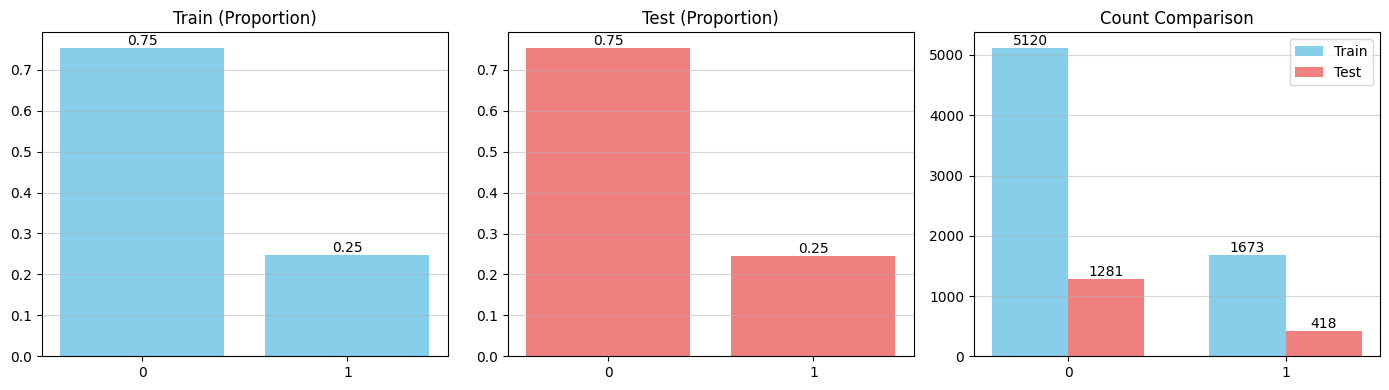

In [ ]:
# Print
print("Train Count:", y_train.value_counts().sort_index().values)
print("Test Count:", y_test.value_counts().sort_index().values)
print("Train Ratio:", y_train.value_counts(normalize=True).sort_index().values)
print("Test Ratio:", y_test.value_counts(normalize=True).sort_index().values)

# Prepare data
train_prop = y_train.value_counts(normalize=True).sort_index()
test_prop = y_test.value_counts(normalize=True).sort_index()
train_count = y_train.value_counts().sort_index()
test_count = y_test.value_counts().sort_index()
x = [0, 1]
width = 0.35

# Plot
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Train - Proportion
axes[0].bar(train_prop.index, train_prop.values, color=['skyblue'])
axes[0].set_title('Train (Proportion)')
axes[0].set_xticks(train_prop.index)
axes[0].grid(True, axis='y', alpha=0.5)
for idx, val in train_prop.items():
    axes[0].text(idx, val, f'{val:.2f}', ha='center', va='bottom')

# Test - Proportion
axes[1].bar(test_prop.index, test_prop.values, color=['lightcoral'])
axes[1].set_title('Test (Proportion)')
axes[1].set_xticks(test_prop.index)
axes[1].grid(True, axis='y', alpha=0.5)
for idx, val in test_prop.items():
    axes[1].text(idx, val, f'{val:.2f}', ha='center', va='bottom')

# Compare - Count
axes[2].bar([i - width/2 for i in x], train_count.values, width, label='Train', color='skyblue')
axes[2].bar([i + width/2 for i in x], test_count.values, width, label='Test', color='lightcoral')
axes[2].set_title('Count Comparison')
axes[2].legend()
axes[2].set_xticks(x)
axes[2].grid(True, axis='y', alpha=0.5)
for i, v in enumerate(train_count.values):
    axes[2].text(x[i] - width/2, v, f'{v}', ha='center', va='bottom')
for i, v in enumerate(test_count.values):
    axes[2].text(x[i] + width/2, v, f'{v}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **9. Feature Selection by Visual and Statistical Measurement**

Objective: เพื่อคัดเลือก Features ที่มีความสัมพันธ์อย่างมีนัยสำคัญกับ Target ผ่าน Visual exploration และ Statistical Feature Selection

โดยในการทำ Feature Selection จะเลือกทำทั้งหมด 2 วิธี ได้แก่ Filter Method และ Wrapper Method เพื่อเปรียบเทียบประสิทธิภาพของ Model เมื่อใช้วิธีการเลือก Feature ที่แตกต่างกัน ซึ่งตั้งแต่ข้อ 9 - 11 จะเป็นการทำ Feature Selection ไปจนถึง Data Pre-processing แบบ Filter Method ในส่วนของการทำ Feature Selection แบบ Wrapper Method นั้นจะทำไปพร้อมกับการสร้าง Model ในข้อที่ 12

## **9.1 Relationship exploration: Categorical vs Categorical**




### **9.1.1 Visual exploration**

Objective: เพื่อวิเคราะห์เบื้องต้นว่า Categorical Features ใดมีความสัมพันธ์กับ Target โดยใช้ Bar Plot และ Stacked Bar Chart ร่วมกันในการวิเคราะห์

เนื่องจากทั้ง Target และ Feature เป็น Categorical Variables
จึงเลือกใช้ Bar Plot และ Stacked Bar Chart เพื่อศึกษาความสัมพันธ์ระหว่างตัวแปร โดย
- Bar Plot: ใช้แสดง Category Pair Distribution เพื่อให้เห็นความแตกต่างของสัดส่วนในแต่ละกลุ่ม ซึ่งช่วยระบุ Feature ที่มีแนวโน้มส่งผลต่อ Target ได้ชัดเจนขึ้น ทั้งยังแสดง Frequency Distribution ของแต่ละ Category แยกตาม Target (Alive, Dead)
- Stacked Bar Chart: ใช้แสดง Proportion (%) ของ Target ในแต่ละ Category เพื่อเปรียบเทียบ Mortality Rate ในโรงพยาบาลระหว่างกลุ่ม

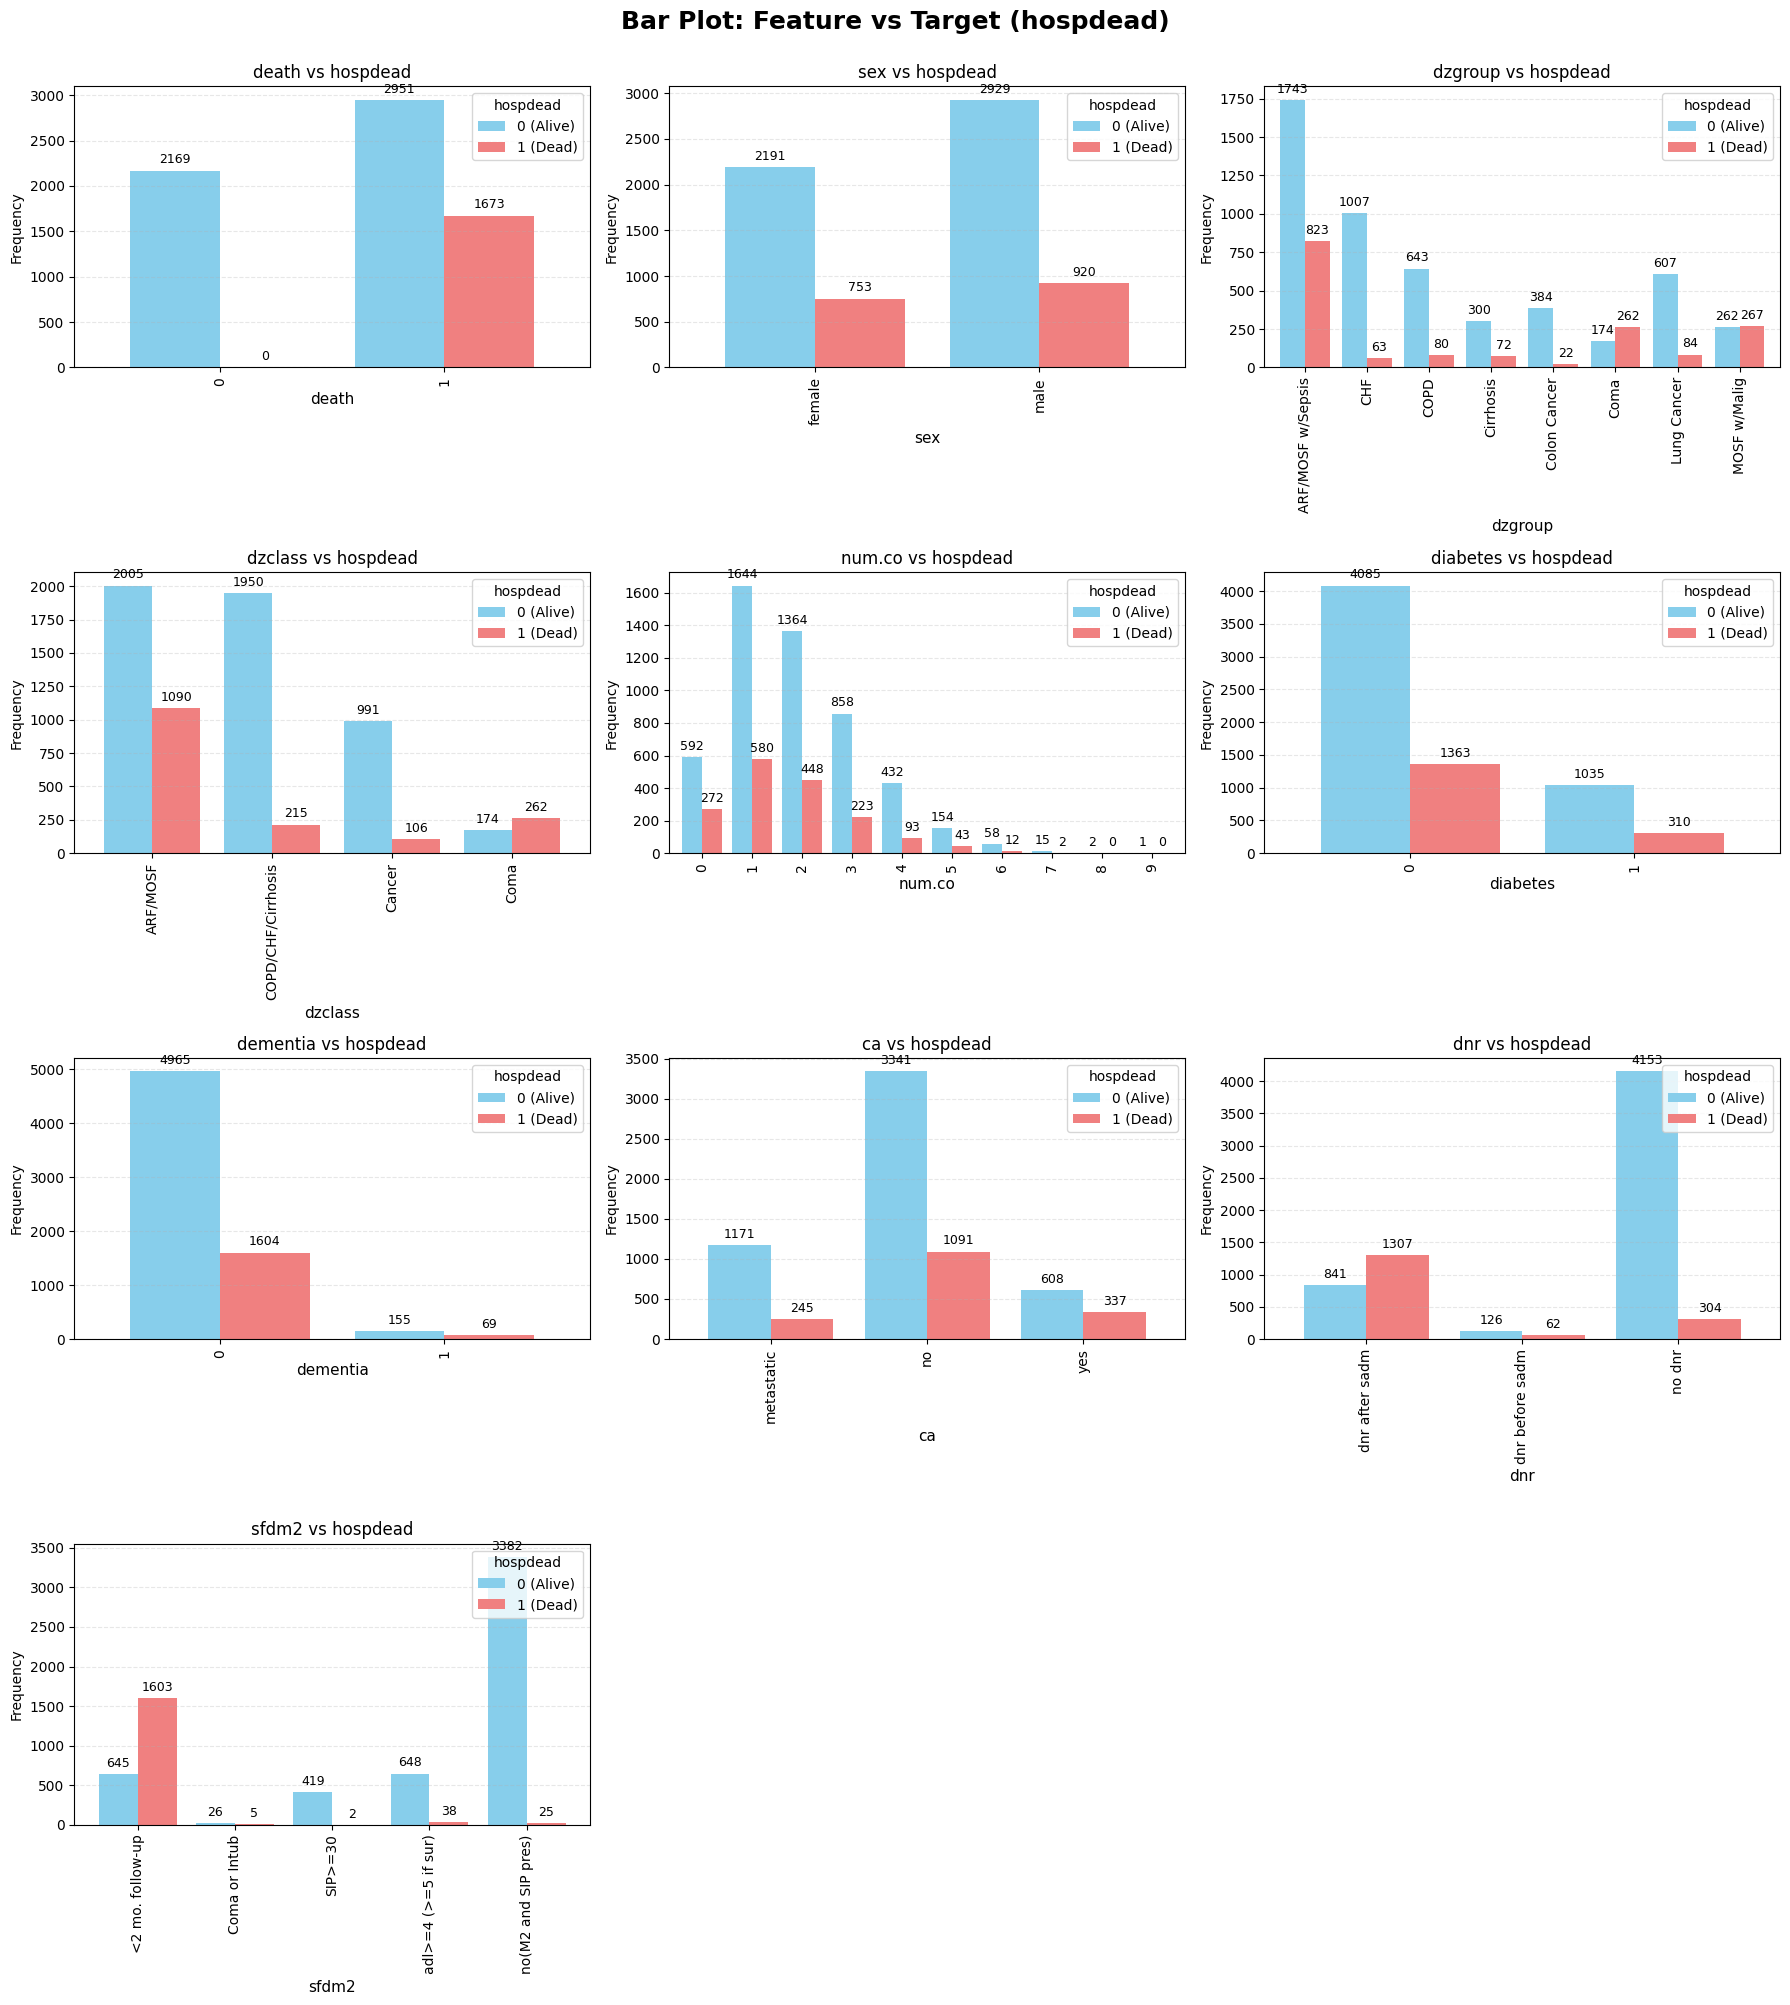

In [ ]:
CategoricalCols = ['death', 'sex', 'dzgroup', 'dzclass', 'num.co', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']
Target = 'hospdead'

# Bar Plot
data_train = pd.concat([X_train, y_train], axis=1)

valid_cols = []
for col in CategoricalCols:
    ct = pd.crosstab(data_train[col], data_train[Target])
    if ct.shape[0] >= 2 and ct.shape[1] >= 2:
        valid_cols.append(col)

n_cols = len(valid_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(valid_cols):
    ct = pd.crosstab(data_train[col], data_train[Target])

    ct.plot(kind='bar', stacked=False, ax=axes[idx],
            color=['skyblue', 'lightcoral'], width=0.8)

    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_title(f'{col} vs {Target}', fontsize=12)
    axes[idx].legend(title=Target, labels=['0 (Alive)', '1 (Dead)'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d', padding=3, fontsize=9)

for idx in range(len(valid_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Bar Plot: Feature vs Target (hospdead)', fontsize=18, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

In [ ]:
# Stacked Bar Chart Function
TARGET_COLUMN = 'hospdead'
feature_columns = [col for col in df.columns if col != TARGET_COLUMN]

def create_stacked_bar_plots(dataframe, features, target):
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten() if n_features > 1 else [axes]

    for idx, feature in enumerate(features):
        ax = axes[idx]

        # % Calculation
        cross_tab = pd.crosstab(dataframe[feature], dataframe[target])
        df_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0).mul(100).round(1)

        # Plot stacked bar chart
        df_percent.plot(
            kind='barh',
            stacked=True,
            ax=ax,
            color=['skyblue', 'lightcoral'],
            legend=False,
            width=0.7
        )

        ax.set_title(
            f'hospdead by {feature.upper()}',
            fontsize=13,
            fontweight='bold',
            pad=15
        )
        ax.set_xlabel('Proportion of hospdead categories (%)', fontsize=11)
        ax.set_ylabel(feature.capitalize(), fontsize=11)
        ax.set_xlim(0, 100)
        ax.grid(axis='x', alpha=0.3, linestyle='--')

        for container in ax.containers:
            labels = [f'{v:.1f}%' if v > 5 else '' for v in container.datavalues]
            ax.bar_label(
                container,
                labels=labels,
                label_type='center',
                fontsize=9,
                fontweight='bold',
                color='white'
            )

    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')

    # Legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        ['0 (Alive)', '1 (Dead)'],
        title='้hospdead',
        loc='upper left',
        bbox_to_anchor=(0.01, 0.99),
        fontsize=11,
        title_fontsize=12,
        frameon=True,
        shadow=True
    )

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

# Calling function
create_stacked_bar_plots(df, feature_columns, TARGET_COLUMN)

Output hidden; open in https://colab.research.google.com to view.

#### **Bar Plot & Stacked Bar Chart Interpretation (Combined Analysis)**

**Interpretation**

**Selected Categorical Variables:**

* **death:** Selected. The 'death' variable appears to be redundant with the target variable (hospdead). The distribution shows that when death = 1, almost all cases result in hospdead = 1 (1,673 deaths out of 1,673 cases), suggesting this variable is either the same as or directly derived from the target variable, potentially causing data leakage. **(Doubt)**
* **sex:** Selected. Males show slightly lower mortality rate (920 deaths out of 3,849 cases, 23.9%), indicating that there may be a very modest relationship with the target. **(Doubt)**
* **dzgroup:** Selected. Clear differences in mortality rates across disease groups. ARF/MOSF shows the highest mortality (823 deaths out of 1,830 cases, 45.0%), while other groups like COPD/CHF/Cirrhosis (63 deaths out of 706 cases, 8.9%) show much lower mortality rates, demonstrating dzgroup provides clear clinical stratification by disease severity.
* **dzclass:** Selected. Strong variation in mortality across disease classes. ARF/MOSF has the highest mortality rate (1,090 deaths out of 3,095 cases, 35.2%), while COPD/CHF/Cirrhosis (215 deaths out of 1,206 cases, 17.8%) and Coma (262 deaths out of 568 cases, 46.1%) show different mortality patterns, indicating this represents broad disease severity classification and is clinically meaningful.
* **num.co:** Selected. Clear positive relationship with mortality, as the number of comorbidities increases from 0 to 3+, and the mortality rate generally rises. The trend shows that patients with more comorbidities have progressively higher mortality (0 comorbidities: 30%, 1–2: 30–33%, 3+: higher still), demonstrating a strong association with hospital mortality.
* **diabetes:** Selected. Patients with diabetes show a small difference in mortality, suggesting this variable may have a weak but possible relationship with the target. **(Doubt)**
* **dementia:** Selected. Patients with dementia show higher mortality rate (69 deaths out of 224 cases, 30.8%) compared to those without dementia (1,604 deaths out of 6,569 cases, 24.4%). Despite representing a much smaller group, dementia patients have a notably higher mortality rate (6.4% difference), indicating a moderate relationship with the target.
* **ca:** Selected. Cancer status shows a strong association with mortality. Patients with non-metastatic or localized cancer ("yes") have the highest mortality (35.7%, 337/945), followed by those without cancer ("no") at 24.6% (1,091/4,432), while metastatic cancer patients unexpectedly show the lowest rate (17.3%, 245/1,416). This counterintuitive trend may reflect selection bias, as metastatic patients who died before ICU admission or were excluded from intensive care are not represented in the dataset. Despite this, the variable remains highly predictive due to clear mortality differences across cancer types.
* **dnr:** Selected. DNR (Do Not Resuscitate) status shows a very strong association with mortality. Patients with DNR orders after admission have extremely high mortality (60.8%, 1,307/2,148), those with DNR orders before admission show moderate mortality (33.0%, 62/188), while patients without DNR orders have very low mortality (6.8%, 304/4,456). This makes DNR status one of the strongest predictors, with a mortality gap exceeding 54%.
* **sfdm2:** Selected. Functional status shows a very strong relationship with mortality. Patients with severe functional limitations (<2 months follow-up) exhibit extremely high mortality (71.3%, 1,603/2,248), whereas those with better functional capacity show much lower rates (no (M2 & SIP pres): 0.7%, 25/3,407; SIP ≥ 30: 0.5%, 2/421; ADL ≥ 4 (≥ 5 if sur): 5.5%, 38/686). This variable stands out as one of the most powerful clinical predictors, with mortality differences exceeding 70%.

### **9.1.2 Statistical Feature Selection**

Objective: เพื่อคัดเลือก Categorical Features ที่มีความสัมพันธ์เชิงสถิติกับ Target โดยใช้ Chi-square ในการดูความสัมพันธ์ระหว่าง Feature และ Target โดยกำหนด threshold = 0.05

| Variables with P-value < 0.05 | Variables with P-value ≥ 0.05 |
| ----------------------------- | ----------------------------- |
| มีความสัมพันธ์ต่อกัน | ไม่มีความสัมพันธ์ต่อกัน |

In [ ]:
# 1) Chi-square: Feature ↔ Target
CategoricalCols = ['death','sex','dzgroup','dzclass','num.co','diabetes','dementia','ca','dnr','sfdm2']

from scipy.stats import chi2_contingency
rows = []
for col in CategoricalCols:
    ct = pd.crosstab(data_train[col], data_train[Target])
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        continue
    chi2, p, dof, _ = chi2_contingency(ct)
    rows.append([col,p,
        'Yes/Associated with Target' if p < 0.05 else 'No/No clear association'])

chi_df = (
    pd.DataFrame(rows, columns=['Feature', 'p_value', 'Significant (p<0.05)'])
      .sort_values('p_value')
      .reset_index(drop=True)
)

print(chi_df.to_string(index=False))

 Feature  p_value       Significant (p<0.05)
   sfdm2   0.0000 Yes/Associated with Target
     dnr   0.0000 Yes/Associated with Target
   death   0.0000 Yes/Associated with Target
 dzgroup   0.0000 Yes/Associated with Target
 dzclass   0.0000 Yes/Associated with Target
      ca   0.0000 Yes/Associated with Target
  num.co   0.0000 Yes/Associated with Target
dementia   0.0355 Yes/Associated with Target
     sex   0.1189    No/No clear association
diabetes   0.1425    No/No clear association


จากการใช้ Chi-square เพื่อวิเคราะห์ความสัมพันธ์ระหว่างตัวแปร สามารถสรุปผลความสัมพันธ์กับ hospdead ได้ดังนี้

| Related with hospdead (p-value < 0.05) | Not related with hospdead (p-value ≥ 0.05) |
| --------------------------------------- | ------------------------------- |
| death, dzgroup, dzclass, num.co, dementia, ca, dnr, sfdm2 | sex, diabetes |

จากผลพบว่า sex และ diabetes มีค่า P-value ≥ 0.05 ซึ่งหมายความว่า ไม่มีความสัมพันธ์เชิงสถิติกับ Target (hospdead) ดังนั้นจึงทำการตัดตัวแปรทั้งสองออก

#### **Chi-square interpretation**

**Interpretation**

**Selected Categorical Variables:**

* **death :** Selected. Related to hospdead. (p-value < 0.05)
* **sex :** Unselected. Not related to hospdead. (p-value ≥ 0.05)
* **dzgroup :** Selected. Related to hospdead. (p-value < 0.05)
* **dzclass :** Selected. Related to hospdead. (p-value < 0.05)
* **num.co :** Selected. Related to hospdead. (p-value < 0.05)
* **diabetes :** Unselected. Not related to hospdead. (p-value ≥ 0.05)
* **dementia :** Selected. Related to hospdead. (p-value < 0.05)
* **ca :** Selected. Related to hospdead. (p-value < 0.05)
* **dnr :** Selected. Related to hospdead. (p-value < 0.05)
* **sfdm2 :** Selected. Related to hospdead. (p-value < 0.05)

### **9.1.3 Multicollinearity Check among Categorical Features**

Objective: เพื่อตรวจสอบ Categorical Features ที่มีความซ้ำซ้อน ซึ่งอาจส่งผลให้เกิดปัญหา Multicollinearity จึงทำการ Pairwise Chi-square Test ระหว่างตัวแปรประเภท Categorical แต่ละคู่ เพื่อทดสอบ Independence ของตัวแปร โดยกำหนดเกณฑ์ threshold = 0.05 และแสดงผลในรูปแบบ Heatmap ของค่า p-value เพื่อให้เห็นภาพรวมของความสัมพันธ์ระหว่างตัวแปร

| Variables with P-value < 0.05 | Variables with P-value ≥ 0.05 |
| ----------------------------- | ----------------------------- |
| มีความสัมพันธ์ต่อกัน | ไม่มีความสัมพันธ์ต่อกัน |

In [ ]:
# Chi-square: Pairwise Categorical (including 'hospdead')
import itertools

cols = ['death', 'hospdead', 'dzgroup', 'dzclass', 'num.co', 'dementia', 'ca', 'dnr', 'sfdm2']

results = []
for col1, col2 in itertools.combinations(cols, 2):
    contingency_table = pd.crosstab(data_train[col1], data_train[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'Feature_1': col1,
        'Feature_2': col2,
        'Chi2': chi2,
        'p_value': p
    })

chi2_results = pd.DataFrame(results)
chi2_results['Relationship'] = chi2_results['p_value'].apply(
    lambda p: 'Significant (Possible multicollinearity)' if p < 0.05 else 'Not significant'
)

chi2_results.sort_values('p_value').reset_index(drop=True)

Feature_1 Feature_2       Chi2  p_value  \
0      death     sfdm2  1630.4670   0.0000   
1   hospdead       dnr  2286.4303   0.0000   
2    dzgroup   dzclass 20379.0000   0.0000   
3   hospdead     sfdm2  3954.8930   0.0000   
4    dzclass    num.co  1947.4719   0.0000   
5    dzclass        ca  5157.4535   0.0000   
6    dzgroup        ca  6624.6686   0.0000   
7    dzgroup    num.co  2305.1526   0.0000   
8        dnr     sfdm2  2462.8435   0.0000   
9      death  hospdead  1039.2402   0.0000   
10     death       dnr   961.9900   0.0000   
11  hospdead   dzgroup   980.6408   0.0000   
12    num.co        ca   959.9642   0.0000   
13  hospdead   dzclass   866.6799   0.0000   
14   dzgroup     sfdm2   965.2742   0.0000   
15   dzclass     sfdm2   713.2889   0.0000   
16   dzgroup       dnr   614.5982   0.0000   
17     death   dzgroup   556.1904   0.0000   
18     death        ca   482.5643   0.0000   
19   dzclass       dnr   423.0697   0.0000   
20     death   dzclass   329.1007   0.0000   
21  dementia       dnr   153.7919   0.0000   
22     death    num.co   146.6123   0.0000   
23    num.co  dementia   144.9494   0.0000   
24  dementia     sfdm2   124.5011   0.0000   
25  hospdead        ca   102.9115   0.0000   
26        ca     sfdm2   115.7398   0.0000   
27        ca       dnr    97.0854   0.0000   
28   dzgroup  dementia    82.6303   0.0000   
29   dzclass  dementia    51.2573   0.0000   
30    num.co     sfdm2   113.9615   0.0000   
31  dementia        ca    41.0990   0.0000   
32  hospdead    num.co    52.6664   0.0000   
33     death  dementia    15.5106   0.0001   
34    num.co       dnr    46.0315   0.0003   
35  hospdead  dementia     4.4208   0.0355   

                                Relationship  
0   Significant (Possible multicollinearity)  
1   Significant (Possible multicollinearity)  
2   Significant (Possible multicollinearity)  
3   Significant (Possible multicollinearity)  
4   Significant (Possible multicollinearity)  
5   Significant (Possible multicollinearity)  
6   Significant (Possible multicollinearity)  
7   Significant (Possible multicollinearity)  
8   Significant (Possible multicollinearity)  
9   Significant (Possible multicollinearity)  
10  Significant (Possible multicollinearity)  
11  Significant (Possible multicollinearity)  
12  Significant (Possible multicollinearity)  
13  Significant (Possible multicollinearity)  
14  Significant (Possible multicollinearity)  
15  Significant (Possible multicollinearity)  
16  Significant (Possible multicollinearity)  
17  Significant (Possible multicollinearity)  
18  Significant (Possible multicollinearity)  
19  Significant (Possible multicollinearity)  
20  Significant (Possible multicollinearity)  
21  Significant (Possible multicollinearity)  
22  Significant (Possible multicollinearity)  
23  Significant (Possible multicollinearity)  
24  Significant (Possible multicollinearity)  
25  Significant (Possible multicollinearity)  
26  Significant (Possible multicollinearity)  
27  Significant (Possible multicollinearity)  
28  Significant (Possible multicollinearity)  
29  Significant (Possible multicollinearity)  
30  Significant (Possible multicollinearity)  
31  Significant (Possible multicollinearity)  
32  Significant (Possible multicollinearity)  
33  Significant (Possible multicollinearity)  
34  Significant (Possible multicollinearity)  
35  Significant (Possible multicollinearity)

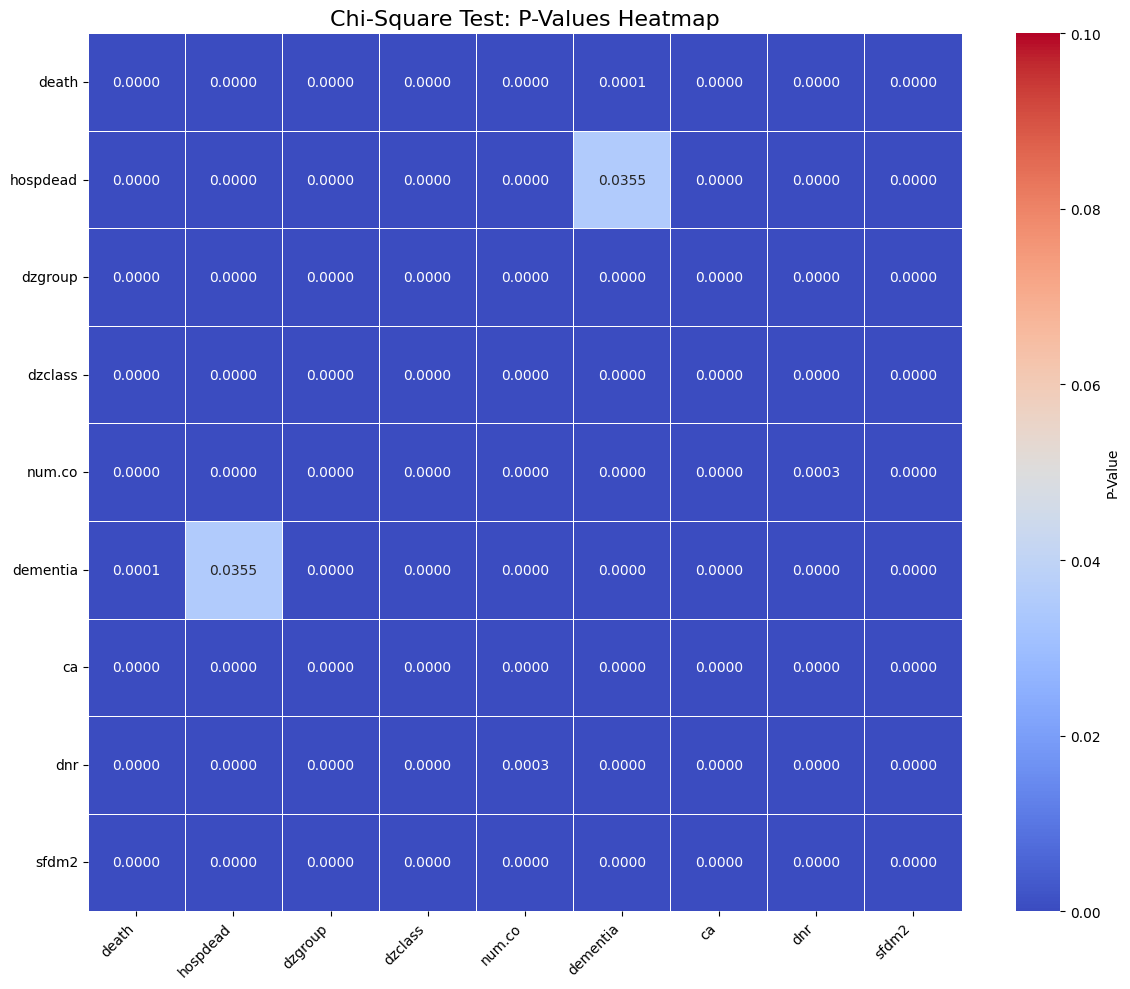

In [ ]:
# Heatmap: p-values ระหว่าง Categorical
n = len(cols)
chi2_matrix = np.zeros((n, n))

for i, var1 in enumerate(cols):
    for j, var2 in enumerate(cols):
        if i == j:
            chi2_matrix[i, j] = 0
        else:
            contingency_table = pd.crosstab(data_train[var1], data_train[var2])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            chi2_matrix[i, j] = p_value

chi2_df = pd.DataFrame(chi2_matrix, index=cols, columns=cols)

plt.figure(figsize=(12, 10))
sns.heatmap(chi2_df, annot=True, fmt='.4f', cmap='coolwarm',center=0.05,
            vmin=0, vmax=0.1,cbar_kws={'label': 'P-Value'},linewidths=0.5)

plt.title('Chi-Square Test: P-Values Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

จากการคำนวณ Chi-square Test และการแสดงใน Heatmap พบว่า
คู่ของตัวแปรประเภท Categorical เกือบทั้งหมดมีค่า p-value = 0
ซึ่งบอกถึงความสัมพันธ์ต่อกันอย่างมีนัยสำคัญ
และสะท้อนถึงความเป็นไปได้ที่จะเกิด Multicollinearity
ดังนั้นจึงทำการ Feature Selection โดยพิจารณาร่วมระหว่าง
Variable Definition และค่า p-value วิเคราะห์ได้ดังต่อไปนี้

1. death ↔ hospdead → Leakage
- Definition:
  - death = Death at any time up to National Death Index (NDI) data on 31 of December of 1994. Some patients are discharged before the end of the study and are not followed up. The authors looked up the information about death.
  - hospdead = Death in hospital
- Interpretation: จาก Definition จะพบว่าตัวแปรทั้งสองแสดงถึง “การเสียชีวิตของผู้ป่วย” เหมือนกัน แต่ death ครอบคลุมช่วงเวลาหลังออกจากโรงพยาบาล ในขณะที่ hospdead สะท้อนเฉพาะการเสียชีวิตภายในโรงพยาบาล ซึ่งเป็น Target Variable ประกอบกับค่า p-value = 0 ยังแสดงถึงความสัมพันธ์สูงมากระหว่างตัวแปรทั้งสอง ซึ่งอาจทำให้เกิด Data Leakage ได้
  
  ∴ ดังนั้นจึงตัด death ออก เนื่องจากให้ข้อมูลซ้ำกับ hospdead และอาจทำให้เกิด Data Leakage ได้ โดยคงไว้เฉพาะ hospdead ซึ่งเป็น Target Variable

---


2. dzgroup ↔ dzclass → Redundancy
- Definition:
  - dzgroup: The patient's disease sub category amogst ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, Colon Cancer, Coma, Lung Cancer, MOSF w/Malig.
  - dzclass: The patient's disease category amongst "ARF/MOSF", "COPD/CHF/Cirrhosis", "Cancer", "Coma".
- จาก Definition จะพบว่าตัวแปรทั้งสองอธิบาย “กลุ่มโรคของผู้ป่วย” ในความหมายใกล้เคียงกัน แต่แตกต่างกันที่ระดับของความละเอียด โดย dzgroup เป็นหมวดโรคย่อย ส่วน dzclass เป็นหมวดโรคหลักที่มีขอบเขตกว้างกว่า
ประกอบกับค่า p-value = 0 ซึ่งแสดงถึงความสัมพันธ์เชิงซ้ำซ้อนระหว่างกัน และเสี่ยงต่อการเกิด Multicollinearity

  ∴ ดังนั้นจึงตัด dzgroup ออก และคงไว้เฉพาะ dzclass เนื่องจากสามารถอธิบายหมวดโรคได้ครอบคลุมกว่า และช่วยลดความซ้ำซ้อนของข้อมูล

---

3. num.co ↔ (dementia, ca) → Redundancy
- Definition:
  - num.co: The number of simultaneous diseases (or comorbidities) exhibited by the patient. Values are ordinal with higher values indicating worse condition and chances of survival.
  - dementia: Whether the patient exhibits dementia (Comorbidity 6) as a comorbidity (Y) or not (N).
  - ca: Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).
- Interpretation: จาก Definition จะพบว่าตัวแปรกลุ่มนี้ทั้งหมดอธิบาย “ภาวะโรคร่วมของผู้ป่วย” ในความหมายเชิงเดียวกัน โดย num.co เป็นตัวแปรเชิงสรุปที่แสดงจำนวนโรคร่วมทั้งหมด ขณะที่ dementia และ ca เป็นตัวแปรเฉพาะรายโรค ประกอบกับค่า p-value = 0 ซึ่งแสดงถึงความสัมพันธ์อย่างมีนัยสำคัญระหว่างตัวแปรเหล่านี้ และสะท้อนถึงความสัมพันธ์เชิงซ้ำซ้อนระหว่างกันที่อาจเสี่ยงต่อการเกิด Multicollinearity ได้

  ∴ ดังนั้นจึงตัด dementia และ ca ออก เพื่อหลีกเลี่ยงความซ้ำซ้อนของข้อมูล และคงไว้เฉพาะ num.co ซึ่งเป็นตัวแทนภาพรวมของภาวะโรคร่วม

#### **Chi-square interpretation**

**Interpretation**

**Selected Categorical Variables:**

* **death :** Unselected.
* **dzgroup :** Unselected.
* **dzclass :** Selected.
* **num.co :** Selected.
* **dementia :** Unselected.
* **ca :** Unselected.
* **dnr :** Selected.
* **sfdm2 :** Selected.

#### **Selected Categorical Variables from statistical feature selection:**

* **death :** Unselected.
* **sex :** Unselected.
* **dzgroup :** Unselected.
* **dzclass :** Selected.
* **num.co :** Selected.
* **diabetes :** Unselected.
* **dementia :** Unselected.
* **ca :** Unselected.  
* **dnr :** Selected.
* **sfdm2 :** Selected.

**Final selected Category columns from Visual exploration and Statistical Feature Selection:** 'dzclass', 'num.co', 'dnr', 'sfdm2'


## **9.2 Relationship exploration: Categorical Vs Continuous**


### **9.2.1 Visual exploration**

Objective: เพื่อวิเคราะห์ความสัมพันธ์ระหว่าง Categorical Target และ Continuous Features โดยใช้ Boxplot ในการดูการกระจายของค่าตัวแปรประเภท Continuous ในแต่ละ Class ของ Target โดย Boxplot จะแสดงค่า Median, การกระจายของข้อมูล (IQR) และ Outliers ซึ่งช่วยให้เห็นแนวโน้มความแตกต่างของ Median ระหว่างแต่ละ Class ของ Target และสามารถใช้ประเมินเบื้องต้นได้ว่าตัวแปรประเภท Continuous ใดมีแนวโน้มที่จะสัมพันธ์กับ Target มากที่สุด


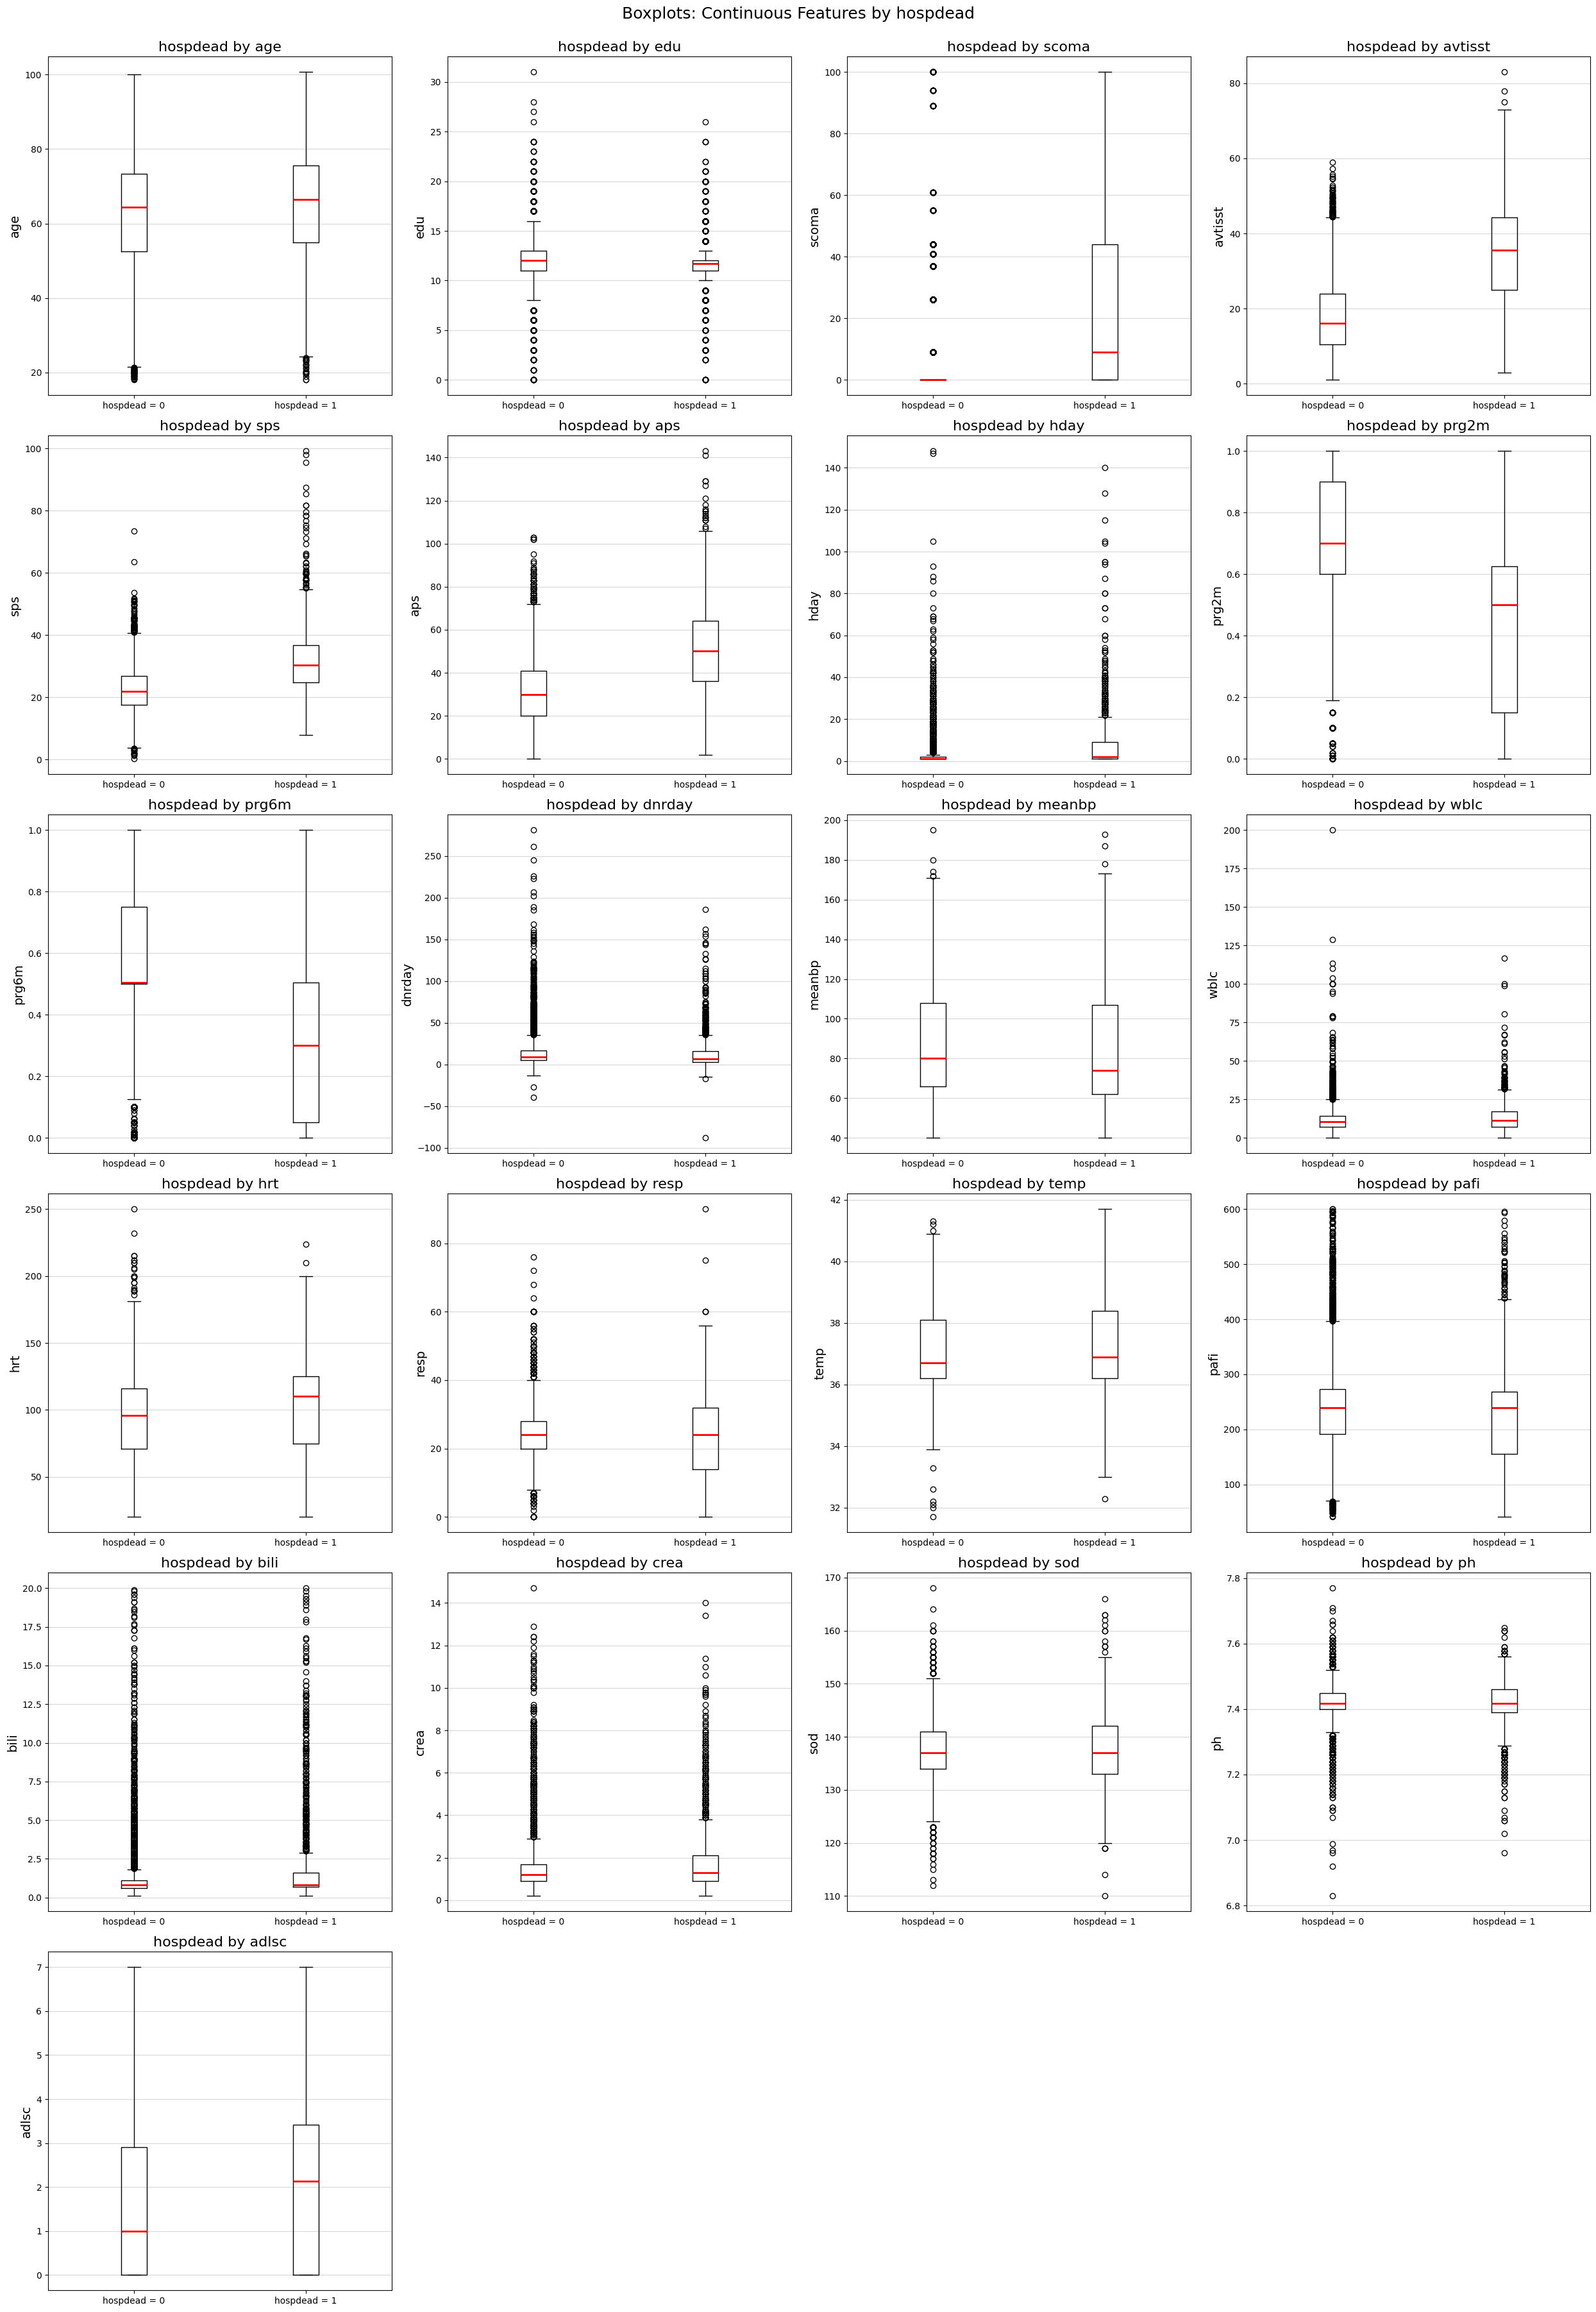

In [ ]:
# Box plots for Categorical Target Variable "hospdead" and Continuous predictors
ContinuousCols = ['age', 'edu', 'scoma', 'avtisst', 'sps', 'aps', 'hday',
                  'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi',
                  'bili', 'crea', 'sod', 'ph', 'adlsc']
target_col = 'hospdead'

# ตั้งค่ากราฟ
n = len(ContinuousCols)
ncols = 4
n_rows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(n_rows, ncols, figsize=(25, 6*n_rows))
fig.suptitle(f'Boxplots: Continuous Features by {target_col}', fontsize=18, y=1)
axes = axes.flatten()

# วาด boxplot แต่ละตัว
for i, col in enumerate(ContinuousCols):
    group0 = data_train[data_train[target_col] == 0][col].dropna()
    group1 = data_train[data_train[target_col] == 1][col].dropna()

    # วาด boxplot
    axes[i].boxplot([group0, group1],
                    tick_labels=['hospdead = 0', 'hospdead = 1'],
                    medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(f'hospdead by {col}', fontsize=16)
    axes[i].set_ylabel(col, fontsize=14)
    axes[i].grid(axis='y', alpha=0.5)

for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

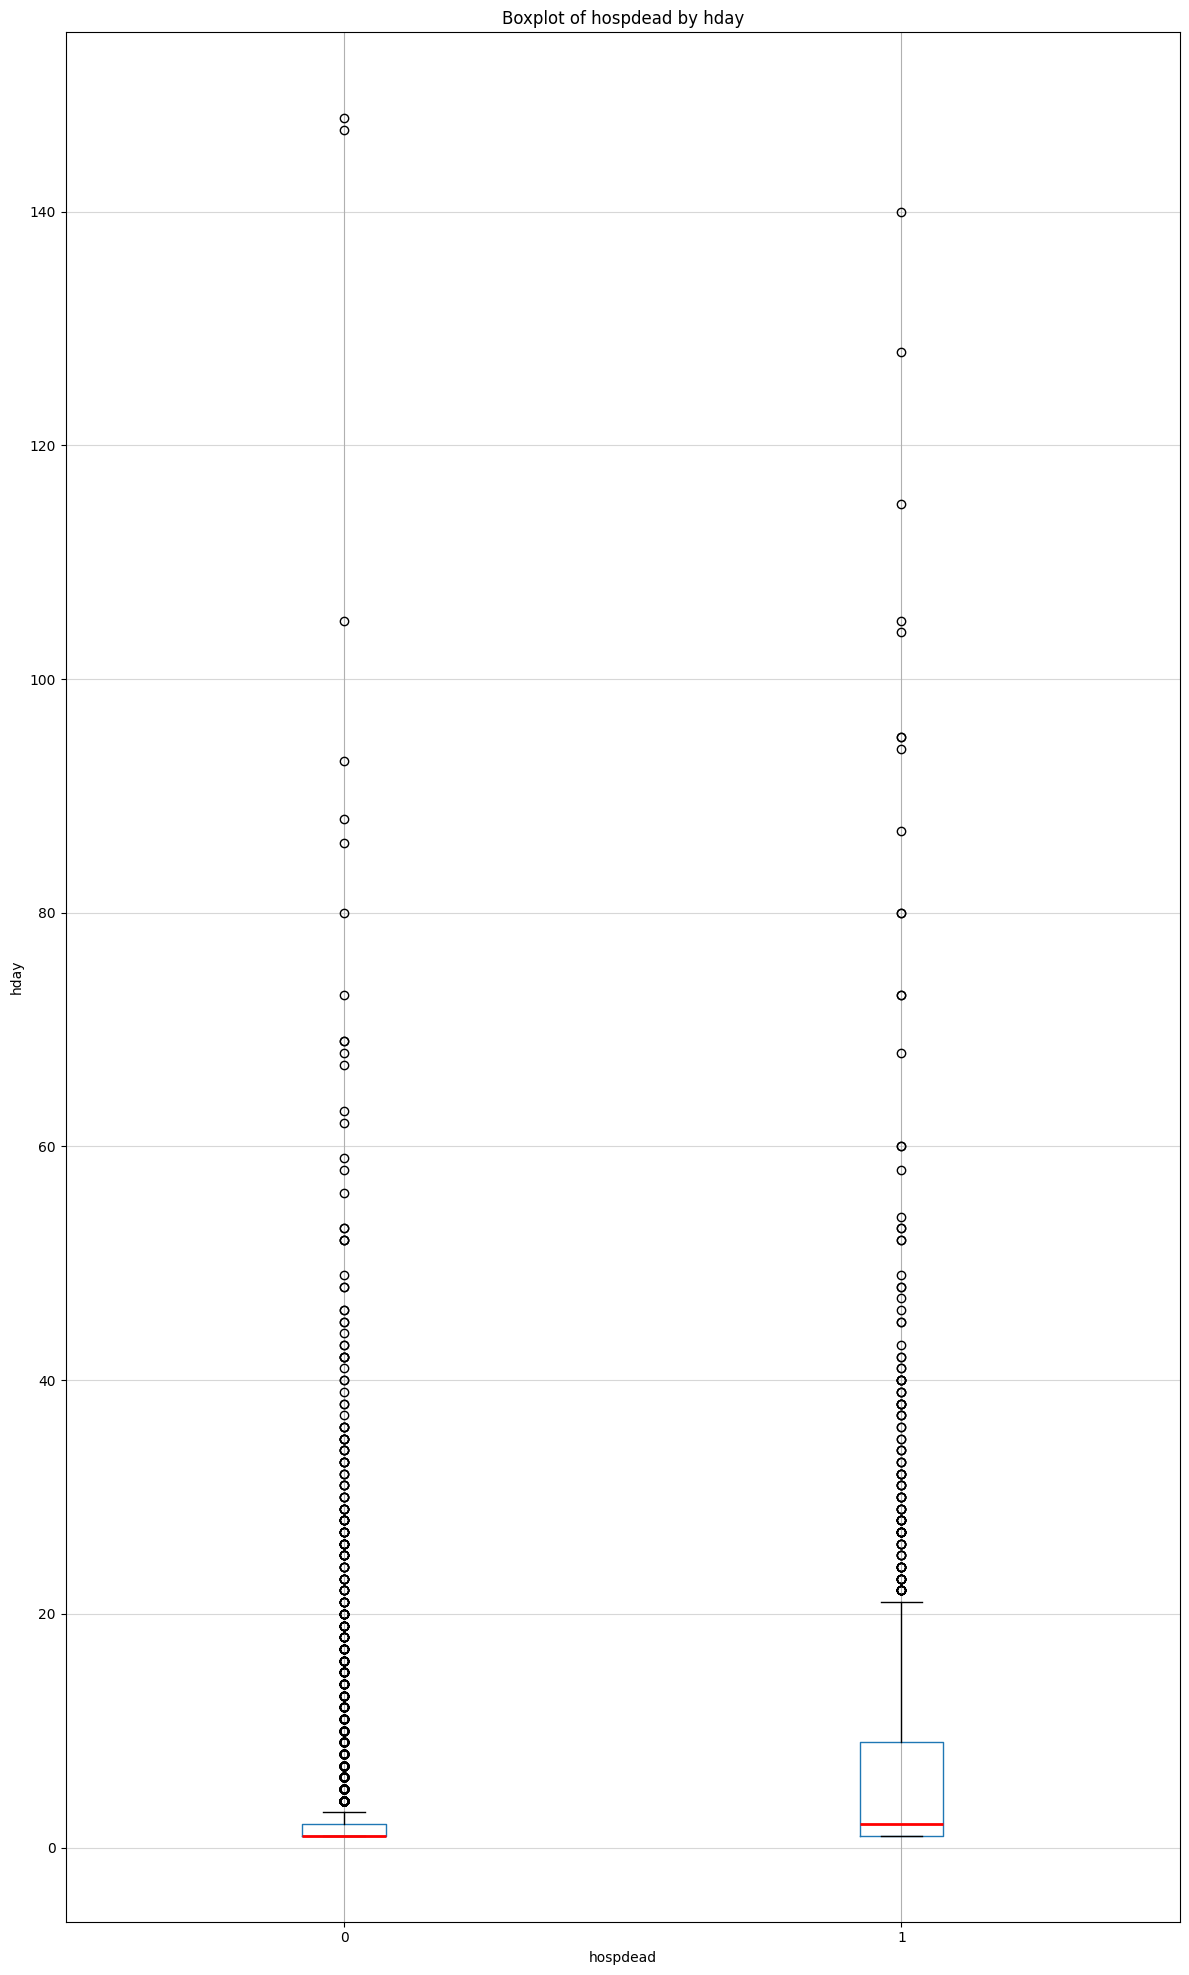

In [ ]:
# Zoom box plots for Categorical Target Variable "hospdead" and Continuous predictors: d.time, hday
for col in ['hday']:
    fig, ax = plt.subplots(figsize=(12, 20))
    # วาด boxplot ของตัวแปร predictor แยกตามกลุ่มของ target
    data_train.boxplot(column=col, by=target_col, ax=ax,
                       patch_artist=False,
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black'),
                       capprops=dict(color='black'),
                       showfliers=True)

    ax.set_title(f'Boxplot of {target_col} by {col}')
    fig.suptitle('')
    ax.set_xlabel(target_col)
    ax.set_ylabel(col)
    ax.grid(True, axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

####**Box Plots interpretation**

**Interpretation**

**Selected Continuous Variables:**

* **age :** Selected. The medians are slightly different and the spreads are close, showing small difference in relation to the target. **(Doubt)**
* **edu :**  Selected. The medians and spreads are almost identical, showing no clear difference. **(Doubt)**
* **scoma :** Selected. The medians are clearly different and the spread in hospdead = 1 is wider, showing strong relation to the target.
* **avtisst :** Selected. The medians are clearly different and the spread in hospdead = 1 is larger, showing strong positive relation to the target.
* **sps :** Selected. The medians are clearly different and spreads are moderately wide, showing clear positive relation to the target.
* **aps :** Selected. The medians are clearly different and the spread in hospdead = 1 is wider, showing strong relation to the target.
* **hday :** Selected. The medians are close, but hospdead = 1 shows wider spread, which may slightly affect the target. **(Doubt)**
* **prg2m :** Selected. The medians are quite different and spreads are also different, showing clear difference and likely affecting the target.
* **prg6m :** Selected. The medians are quite different and spreads are also different, showing clear difference and likely affecting the target.
* **dnrday :** Selected. The medians are almost identical and spreads are extremely wide with many outliers.. **(Doubt)**
* **meanbp :** Selected. The medians are slightly different and spreads are close, showing weak relation to the target. **(Doubt)**
* **wblc :** Selected. The medians and spreads are close, showing small difference. **(Doubt)**
* **hrt :** Selected. The medians and spreads differ slightly, with hospdead = 1 showing a slightly wider spread, which may have a mild effect on the target. **(Doubt)**
* **resp :** Selected. The medians are slightly different and the spread in hospdead = 1 is wider, showing weak relation. **(Doubt)**
* **temp :** Selected. The medians and spreads are nearly identical, suggesting only a minor effect on the target. **(Doubt)**
* **pafi :** Selected. The medians are almost identical and the spreads are wide with large overlap, which may slightly affect the target. **(Doubt)**
* **bili :** Selected. The medians differ slightly and the spreads are wide with large overlap, suggesting a weak relation to the target. **(Doubt)**
* **crea :** Selected. The medians are slightly different and spreads are similar, showing weak relation. **(Doubt)**
* **sod :** Selected.The medians and spreads are almost identical, suggesting minimal influence on the target. **(Doubt)**
* **ph :** Selected. The medians are slightly different and spreads are moderate, showing weak negative relation. **(Doubt)**
* **adlsc :** Selected. The medians are clearly different and spreads are close, showing clear inverse relation to the target.

### **9.2.2 Statistical Feature Selection**

Objective: เพื่อวิเคราะห์ความสัมพันธ์ระหว่าง Continuous Features และ Categorical Target โดยใช้ Analysis of Variance (ANOVA) เพื่อเปรียบเทียบ Mean ของตัวแปรประเภท Continuous ในแต่ละ Class ของ Target ว่ามีความแตกต่างกันอย่างมีนัยสำคัญทางสถิติหรือไม่

Hypotheses:
- H0 (Null Hypothesis): ไม่มีความสัมพันธ์ระหว่างตัวแปรทั้งสอง (ค่าเฉลี่ยของ Continuous Variable ในแต่ละ Class ของ Target เท่ากันทั้งหมด)
- H1 (Alternative Hypothesis): มีความสัมพันธ์ระหว่างตัวแปรทั้งสอง (อย่างน้อยหนึ่ง Class ของ Target มีค่าเฉลี่ยของ Continuous Variable ที่แตกต่างจากกลุ่มอื่น)

จากสมมติฐานดังกล่าว ANOVA จะใช้ค่า p-value เพื่อบอกถึงระดับความน่าจะเป็นของความแตกต่างระหว่างค่าเฉลี่ยของแต่ละ Target Classes โดยค่าดังกล่าวจะถูกนำมาใช้ในการตัดสินว่าข้อมูลมี Evidence เพียงพอที่จะ reject H0 (Null Hypothesis) หรือไม่ ตามเกณฑ์ในตารางต่อไปนี้
| Condition |Interpretation |
| ----------------------------- | ----------------------------- |
| ANOVA p-value < 0.05 | Reject H₀: มีความแตกต่างอย่างมีนัยสำคัญทางสถิติ |
| ANOVA p-value ≥ 0.05 | Fail to Reject H₀: ยังไม่พบความแตกต่างอย่างมีนัยสำคัญทางสถิติ |

In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList, use_welch=True):
    from scipy.stats import f_oneway, ttest_ind

    classes = pd.Series(inpData[TargetVariable].dropna().unique()).tolist()
    c0, c1 = sorted(classes)

    SelectedPredictors = []
    print('##### ANOVA Results ##### \n')

    for predictor in ContinuousPredictorList:
        if predictor not in inpData.columns:
            print(f"{predictor} skipped (column not found)")
            continue

        # ดึงข้อมูลแต่ละกลุ่ม
        x0 = inpData.loc[inpData[TargetVariable] == c0, predictor].dropna().values
        x1 = inpData.loc[inpData[TargetVariable] == c1, predictor].dropna().values

        # ต้องมีข้อมูลอย่างน้อย 2 จุดต่อกลุ่ม
        if len(x0) < 2 or len(x1) < 2:
            print(f"{predictor} skipped (insufficient data: n0={len(x0)}, n1={len(x1)})")
            continue

        # เลือกสถิติ
        if use_welch:
            stat, pval = ttest_ind(x0, x1, equal_var=False)
        else:
            # ANOVA 2 กลุ่ม (เชิงนัยสำคัญเทียบเท่า t-test)
            stat, pval = f_oneway(x0, x1)

        if pval < 0.05:
            print(f"{predictor} is correlated with {TargetVariable} | P-Value: {pval}")
            SelectedPredictors.append(predictor)
        else:
            print(f"{predictor} is NOT correlated with {TargetVariable} | P-Value: {pval}")

    return SelectedPredictors

In [ ]:
# Calling the function to check which continuous variables are correlated with target
ContinuousCols = ['age', 'edu', 'scoma', 'avtisst', 'sps', 'aps', 'hday',
                        'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi',
                        'bili', 'crea', 'sod', 'ph', 'adlsc']

selected = FunctionAnova(data_train, 'hospdead', ContinuousCols)
print(selected)

##### ANOVA Results ##### 

age is correlated with hospdead | P-Value: 5.339343481449461e-06
edu is NOT correlated with hospdead | P-Value: 0.6916740885742872
scoma is correlated with hospdead | P-Value: 6.351631318602719e-108
avtisst is correlated with hospdead | P-Value: 0.0
sps is correlated with hospdead | P-Value: 3.467357152404623e-198
aps is correlated with hospdead | P-Value: 1.2268978273938942e-223
hday is correlated with hospdead | P-Value: 1.1143294314323239e-37
prg2m is correlated with hospdead | P-Value: 2.4487697304632348e-241
prg6m is correlated with hospdead | P-Value: 1.8042823372125026e-208
dnrday is correlated with hospdead | P-Value: 0.0003083652287054785
meanbp is correlated with hospdead | P-Value: 0.00014808735143028432
wblc is correlated with hospdead | P-Value: 6.103888637529719e-07
hrt is correlated with hospdead | P-Value: 2.5997010557748587e-25
resp is correlated with hospdead | P-Value: 0.03492676798280315
temp is correlated with hospdead | P-Value: 1.21633

####**ANOVA interpretation**

**Selected Continuous Variables:**

* **age :** Selected. Correlated with hospdead (p-value < 0.05)
* **edu :**  Unselected. Not correlated with hospdead (p-value ≥ 0.05)
* **scoma :** Selected. Correlated with hospdead (p-value < 0.05)
* **avtisst :** Selected. Correlated with hospdead (p-value < 0.05)
* **sps :** Selected. Correlated with hospdead (p-value < 0.05)
* **aps :** Selected. Correlated with hospdead (p-value < 0.05)
* **hday :** Selected. Correlated with hospdead (p-value < 0.05)
* **prg2m :** Selected. Correlated with hospdead (p-value < 0.05)
* **prg6m :** Selected. Correlated with hospdead (p-value < 0.05)
* **dnrday :** Selected. Correlated with hospdead (p-value < 0.05)
* **meanbp :** Selected. Correlated with hospdead (p-value < 0.05)
* **wblc :** Selected. Correlated with hospdead (p-value < 0.05)
* **hrt :** Selected. Correlated with hospdead (p-value < 0.05)
* **resp :** Selected. Correlated with hospdead (p-value < 0.05)
* **temp :** Selected. Correlated with hospdead (p-value < 0.05)
* **pafi :** Selected. Correlated with hospdead (p-value < 0.05)
* **bili :** Selected. Correlated with hospdead (p-value < 0.05)
* **crea :** Selected. Correlated with hospdead (p-value < 0.05)
* **sod :** Unselected. Not correlated with hospdead (p-value ≥ 0.05)
* **ph :** Unselected. Not correlated with hospdead (p-value ≥ 0.05)
* **adlsc :** Selected. Correlated with hospdead (p-value < 0.05)

### **9.2.3 Correlation and VIF Analysis among Continuous Features**

Objective: เพื่อตรวจสอบปัญหา Multicollinearity ระหว่างตัวแปรประเภท Continuous Variables ซึ่งอาจส่งผลให้ Model เรียนรู้ข้อมูลที่ Redundancy

ดังนั้นจึงเลือกใช้ 2 วิธีด้วยกัน ได้แก่ Pearson Correlation Matrix และ Variance Inflation Factor (VIF) เนื่องจากทั้งสองวิธีสามารถช่วยตรวจจับปัญหา Multicollinearity ได้จากมุมมองที่แตกต่างกันแต่เสริมกันได้อย่างมีประสิทธิภาพ

- Pearson Correlation Matrix
  - ใช้เพื่อหาค่าสัมประสิทธิ์ความสัมพันธ์ (r) ระหว่างคู่ของตัวแปร เพื่อระบุว่าตัวแปรใดมีความสัมพันธ์เชิงเส้นสูง ซึ่งอาจเป็นสาเหตุของ Redundancyในข้อมูล
  - เลือกใช้เพราะสามารถตรวจสอบ Pairwise Correlation ได้ชัดเจน ทำให้สามารถมองเห็นแนวโน้มของตัวแปรที่อาจมีความสัมพันธ์เชิงเส้นสูงต่อกัน ซึ่งช่วยในการคัดกรองตัวแปรที่ Redundancy ในเบื้องต้นได้

- VIF (Variance Inflation Factor):
  - ใช้เพื่อประเมินระดับ Redundancy ของตัวแปร โดยวัดว่าตัวแปรแต่ละตัวสามารถถูกอธิบายได้มากน้อยเพียงใดโดยตัวแปรอื่น ๆ ซึ่งช่วยในการระบุปัญหา Multicollinearity ได้
  - เลือกใช้เพื่อประเมิน Redundancy ของตัวแปรในเชิง Multivariate Correlation ซึ่งช่วยยืนยันว่าตัวแปรใดถูกอธิบายได้มากโดยตัวแปรอื่น ๆ ในภาพรวม การใช้ VIF จึงช่วยให้สามารถประเมินผลของ Multicollinearity ได้ลึกกว่า

**1. Pearson Correlation Matrix**

กำหนด Threshold ในการพิจารณาค่า Correlation ว่า หากมีค่า |r| > 0.8
จะถือว่าอยู่ในระดับ High Correlation ซึ่งอาจก่อให้เกิดปัญหา Multicollinearity ภายในโมเดลได้



In [ ]:
ContinuousCols=['age', 'scoma', 'avtisst', 'sps', 'aps', 'hday','prg2m', 'prg6m',
                'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'adlsc']

# Creating the correlation matrix
CorrelationData=data_train[ContinuousCols].corr()
CorrelationData

age   scoma  avtisst     sps     aps    hday   prg2m   prg6m  \
age      1.0000  0.0155  -0.1159 -0.1013 -0.0138 -0.0587 -0.0855 -0.1288   
scoma    0.0155  1.0000   0.3012  0.2229  0.2384  0.1139 -0.3442 -0.2685   
avtisst -0.1159  0.3012   1.0000  0.5583  0.5845  0.2815 -0.3500 -0.2220   
sps     -0.1013  0.2229   0.5583  1.0000  0.7880  0.2120 -0.3580 -0.2684   
aps     -0.0138  0.2384   0.5845  0.7880  1.0000  0.2373 -0.3517 -0.2452   
hday    -0.0587  0.1139   0.2815  0.2120  0.2373  1.0000 -0.1342 -0.0982   
prg2m   -0.0855 -0.3442  -0.3500 -0.3580 -0.3517 -0.1342  1.0000  0.8929   
prg6m   -0.1288 -0.2685  -0.2220 -0.2684 -0.2452 -0.0982  0.8929  1.0000   
dnrday  -0.1563  0.0140   0.2973  0.1273  0.1462  0.2005  0.0330  0.0933   
meanbp  -0.0641  0.0194  -0.0716 -0.1243 -0.1089  0.0090  0.0386  0.0394   
wblc     0.0025  0.0648   0.1135  0.1004  0.0845  0.0217 -0.0562 -0.0243   
hrt     -0.1429  0.0645   0.2045  0.2243  0.2078  0.0975 -0.1114 -0.0757   
resp    -0.0267  0.0032   0.0264  0.0893  0.1419  0.0352 -0.0345 -0.0230   
temp    -0.1017  0.1209   0.1836  0.0642  0.0883  0.0834 -0.0797 -0.0423   
pafi     0.0004 -0.0039  -0.1699 -0.1657 -0.1269 -0.0404  0.0654  0.0470   
bili    -0.1104  0.0621   0.1202  0.1804  0.2047  0.0810 -0.0773 -0.0572   
crea     0.0088  0.0545   0.1043  0.1521  0.2224  0.0426 -0.0478 -0.0177   
adlsc    0.1094  0.1255   0.0286  0.0914  0.0954  0.0168 -0.1533 -0.1566   

         dnrday  meanbp    wblc     hrt    resp    temp    pafi    bili  \
age     -0.1563 -0.0641  0.0025 -0.1429 -0.0267 -0.1017  0.0004 -0.1104   
scoma    0.0140  0.0194  0.0648  0.0645  0.0032  0.1209 -0.0039  0.0621   
avtisst  0.2973 -0.0716  0.1135  0.2045  0.0264  0.1836 -0.1699  0.1202   
sps      0.1273 -0.1243  0.1004  0.2243  0.0893  0.0642 -0.1657  0.1804   
aps      0.1462 -0.1089  0.0845  0.2078  0.1419  0.0883 -0.1269  0.2047   
hday     0.2005  0.0090  0.0217  0.0975  0.0352  0.0834 -0.0404  0.0810   
prg2m    0.0330  0.0386 -0.0562 -0.1114 -0.0345 -0.0797  0.0654 -0.0773   
prg6m    0.0933  0.0394 -0.0243 -0.0757 -0.0230 -0.0423  0.0470 -0.0572   
dnrday   1.0000  0.0049  0.0867  0.0967  0.0050  0.1144 -0.0622  0.0542   
meanbp   0.0049  1.0000 -0.0064  0.0271  0.0299  0.0057  0.0900 -0.0410   
wblc     0.0867 -0.0064  1.0000  0.1412  0.0387  0.1047 -0.1088  0.0305   
hrt      0.0967  0.0271  0.1412  1.0000  0.1874  0.2900 -0.1448  0.1219   
resp     0.0050  0.0299  0.0387  0.1874  1.0000  0.1023 -0.0760  0.0033   
temp     0.1144  0.0057  0.1047  0.2900  0.1023  1.0000 -0.1538  0.0401   
pafi    -0.0622  0.0900 -0.1088 -0.1448 -0.0760 -0.1538  1.0000 -0.0316   
bili     0.0542 -0.0410  0.0305  0.1219  0.0033  0.0401 -0.0316  1.0000   
crea     0.0479 -0.0243  0.0804  0.0271 -0.0371 -0.0059 -0.0181  0.0708   
adlsc   -0.0346 -0.0182 -0.0007  0.0289  0.0221 -0.0107  0.0199 -0.0059   

           crea   adlsc  
age      0.0088  0.1094  
scoma    0.0545  0.1255  
avtisst  0.1043  0.0286  
sps      0.1521  0.0914  
aps      0.2224  0.0954  
hday     0.0426  0.0168  
prg2m   -0.0478 -0.1533  
prg6m   -0.0177 -0.1566  
dnrday   0.0479 -0.0346  
meanbp  -0.0243 -0.0182  
wblc     0.0804 -0.0007  
hrt      0.0271  0.0289  
resp    -0.0371  0.0221  
temp    -0.0059 -0.0107  
pafi    -0.0181  0.0199  
bili     0.0708 -0.0059  
crea     1.0000 -0.0090  
adlsc   -0.0090  1.0000

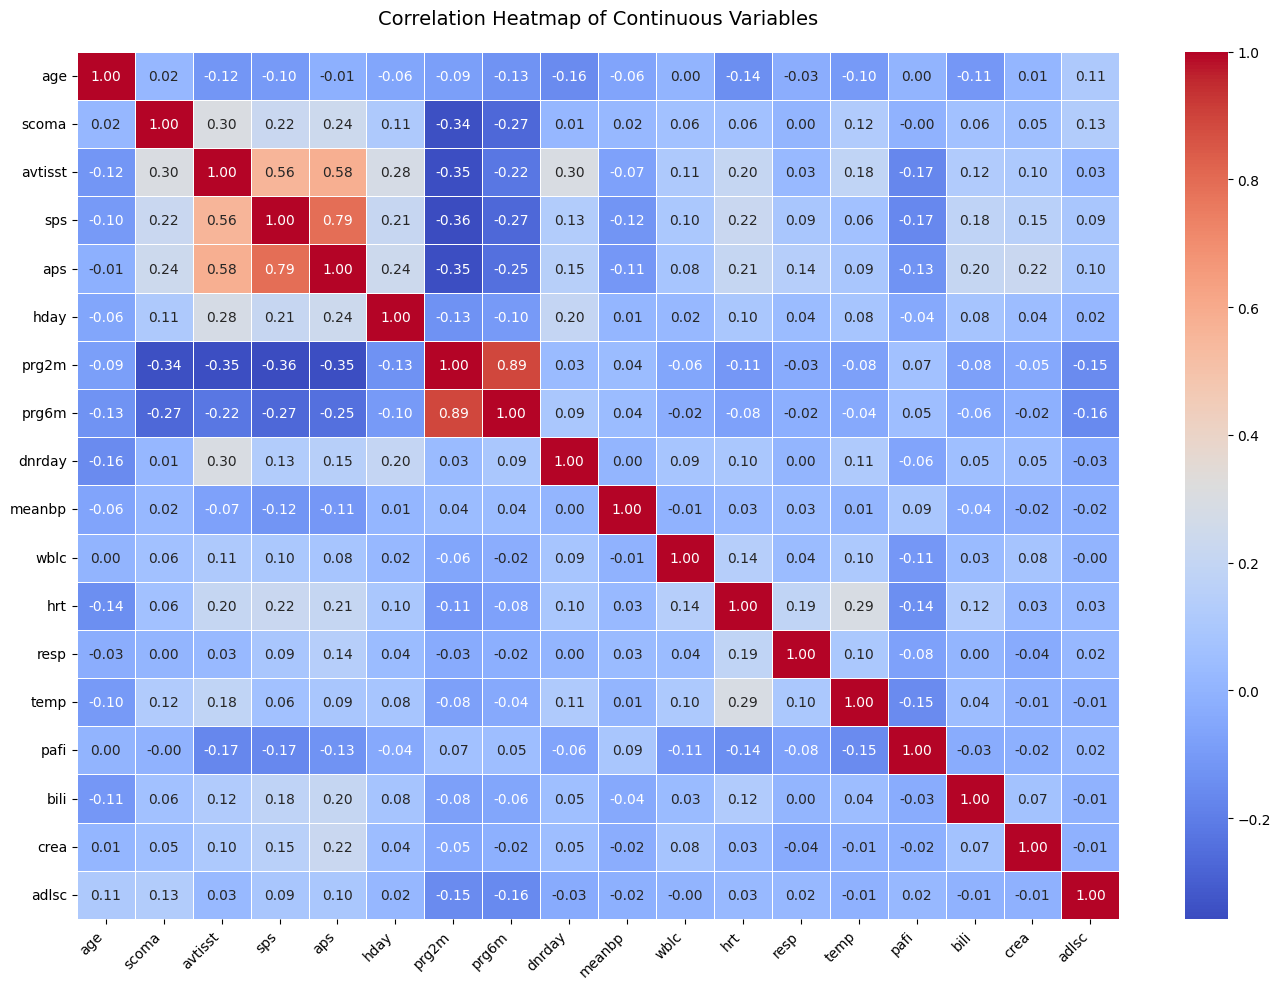

In [ ]:
# Heatmap correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(CorrelationData,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)

plt.title('Correlation Heatmap of Continuous Variables', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

จากการวิเคราะห์ Pearson Correlation Matrix พบว่ามีบางคู่ตัวแปรที่มีความสัมพันธ์กันสูง ซึ่งอาจก่อให้เกิดปัญหา Multicollinearity สามารสรุปออกมาได้ดังตาราง

| Feature Pair |	Correlation Value (r) | Interpretation |
|--------------|------------------------|----------------|
|prg2m ↔ prg6m |0.89| Very high correlation |
|sps ↔ aps |0.79 | Near high threshold |
|avtisst ↔ sps |0.56| Moderate correlation |

พบว่า
1. 'prg2m ↔ prg6m': ตัดตัวแปร prg2m ออก เนื่องจากทั้งสองแสดง Prognosis Score ที่วัดใน 2 เดือน และ 6 เดือน ซึ่งมีแนวโน้มให้ค่าคล้ายกันมาก (r ≈ 0.89) และ prg6m สะท้อนแนวโน้มระยะยาวกว่า จะช่วยลด Redundancy ของข้อมูล

2. 'aps ↔ sps': *Doubt* เนื่องจากทั้งสองเป็น Severity Scores ที่ใช้ประเมินภาวะทางสรีรวิทยาของผู้ป่วย โดยมีการคำนวณจากข้อมูลพื้นฐานคล้ายกัน เช่น ความดันโลหิต ชีพจร และระดับการตอบสนอง จึงอาจเกิด Multicollinearity บางส่วน (r ≈ 0.79 อยู่ใกล้ค่า Thershold ที่กำหนดไว้มาก) และจะตรวจสอบด้วย VIF เพื่อยืนยันระดับของ Redundancy ก่อน

ดังนั้นเหลือ: 'age', 'scoma', 'avtisst', 'sps', 'aps', 'hday', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'bili', 'crea', 'adlsc'

**2. Variance Inflation Factor (VIF)**

ตารางด้านล่างแสดง Threshold ของค่า VIF ที่ใช้ในการประเมินระดับของ Multicollinearity ภายในโมเดล

| VIF value |	Interpretation |
|-----|----------------|
| VIF = 1 | No multicollinearity |
| 1 < VIF ≤ 5 | Low to moderate multicollinearity |
| 5 < VIF ≤ 10 | Moderate to high multicollinearity |
| VIF > 10 | Severe multicollinearity |

In [ ]:
# VIF
features = ['age','scoma','avtisst','sps','aps','hday','prg6m','dnrday','meanbp',
            'wblc','hrt','resp','temp','pafi','bili','crea','adlsc']

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_elim(df, cols, thr=10.0):
    keep = cols[:]
    removed = []
    while len(keep) > 1:
        X = df[keep].dropna()
        vifs = [variance_inflation_factor(X.values, i) for i in range(len(keep))]
        vif_df = pd.DataFrame({"Feature": keep, "VIF": vifs}).sort_values("VIF", ascending=False)
        vmax, fmax = vif_df.iloc[0]["VIF"], vif_df.iloc[0]["Feature"]

        # แสดงตารางของรอบนี้
        print("\n=== VIF (current) ===")
        print(vif_df.to_string(index=False, formatters={"VIF": "{:.3f}".format}))

        if vmax < thr:        # หยุดถ้าทุกตัวต่ำกว่าเกณฑ์
            break
        print(f">> remove: {fmax} (VIF={vmax:.3f})")
        keep.remove(fmax)
        removed.append(fmax)

    # ตารางรอบสุดท้าย
    Xf = df[keep].dropna()
    final_vif = [variance_inflation_factor(Xf.values, i) for i in range(len(keep))]
    final_df = pd.DataFrame({"Feature": keep, "VIF": final_vif}).sort_values("VIF", ascending=False)

    print("\n=== Final VIF ===")
    print(final_df.to_string(index=False, formatters={"VIF": "{:.3f}".format}))
    print("Keep:", keep)
    print("Removed:", removed)
    return keep, removed, final_df

keep, removed, vif_last = vif_elim(df, features, thr=10.0)


=== VIF (current) ===
Feature    VIF
   temp 81.290
    sps 24.934
    age 18.746
    aps 14.574
    hrt 14.127
 meanbp 12.042
   pafi  8.377
   resp  7.799
avtisst  7.492
  prg6m  5.221
   wblc  2.975
   crea  2.383
  adlsc  1.981
 dnrday  1.812
   bili  1.521
  scoma  1.446
   hday  1.388
>> remove: temp (VIF=81.290)

=== VIF (current) ===
Feature    VIF
    sps 22.313
    aps 14.105
    age 12.259
    hrt 12.130
 meanbp 10.431
   pafi  7.402
   resp  7.388
avtisst  7.277
  prg6m  4.563
   wblc  2.953
   crea  2.371
  adlsc  1.978
 dnrday  1.809
   bili  1.514
  scoma  1.446
   hday  1.388
>> remove: sps (VIF=22.313)

=== VIF (current) ===
Feature    VIF
    age 12.140
    hrt 11.639
 meanbp 10.357
    aps  8.216
   resp  7.374
   pafi  7.367
avtisst  6.941
  prg6m  4.561
   wblc  2.941
   crea  2.371
  adlsc  1.971
 dnrday  1.808
   bili  1.510
  scoma  1.446
   hday  1.388
>> remove: age (VIF=12.140)

=== VIF (current) ===
Feature    VIF
    hrt 11.389
 meanbp  9.737
    aps  8.07

จากการทำ VIF แบบ stepwise พบว่าตัวแปร temp, sps, age และ hrt ถูกตัดออกตามลำดับ เนื่องจากแต่ละตัวมีค่า VIF สูงสุดของรอบและมีค่ามากกว่า 10 ซึ่งบอกถึง Multicollinearity ที่สูง และการตัดตัวแปรเหล่านี้จะช่วยลดความซ้ำซ้อนระหว่างตัวแปร โดย VIF แบบ stepwise จะหยุดเมื่อค่า VIF ของตัวที่เหลือทั้งหมดต่ำกว่า 10

####**Correlation and VIF Analysis interpretation**

**Selected Continuous Variables:**

* **age :** Unselected. (Based on VIF Analysis)
* **scoma :** Selected.
* **avtisst :** Selected.
* **sps :** Unselected. (Based on VIF Analysis)
* **aps :** Selected.
* **hday :** Selected.
* **prg2m :** Unselected. (Based on Correlation Analysis)
* **prg6m :** Selected.
* **dnrday :** Selected.
* **meanbp :** Selected.
* **wblc :** Selected.
* **hrt :** Unselected. (Based on VIF Analysis)
* **resp :** Selected.
* **temp :** Unselected. (Based on VIF Analysis)
* **pafi :** Selected.
* **bili :** Selected.
* **crea :** Selected.
* **adlsc :** Selected.

#### **Selected Continuous Variables from statistical feature selection:**

* **age :** Unselected.
* **edu :**  Unselected.
* **scoma :** Selected.
* **avtisst :** Selected.
* **sps :** Unselected.
* **aps :** Selected.
* **hday :** Selected.
* **prg2m :** Unselected.
* **prg6m :** Selected.
* **dnrday :** Selected.
* **meanbp :** Selected.
* **wblc :** Selected.
* **hrt :** Unselected.
* **resp :** Selected.
* **temp :** Unselected.
* **pafi :** Selected.
* **bili :** Selected.
* **crea :** Selected.
* **sod :** Unselected.
* **ph :** Unselected.
* **adlsc :** Selected.

**Final selected Continuous columns from Visual exploration and Statistical Feature Selection:** 'scoma', 'avtisst', 'aps', 'hday', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'resp', 'pafi', 'bili', 'crea', 'adlsc'

# **10. Selecting final predictors for Machine Learning summary**

Based on the above tests, selecting the final columns for machine learning

In [ ]:
SelectedColumns=['dzclass', 'num.co', 'dnr', 'sfdm2', 'scoma', 'avtisst', 'aps', 'hday', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'resp', 'pafi', 'bili', 'crea', 'adlsc']
X_train1 = X_train[SelectedColumns]
X_test1 = X_test[SelectedColumns]

# Selecting final columns
X_train1[SelectedColumns].head()

dzclass  num.co             dnr                sfdm2   scoma  \
2751            ARF/MOSF       6  dnr after sadm     <2 mo. follow-up  0.0000   
931   COPD/CHF/Cirrhosis       3          no dnr  no(M2 and SIP pres)  0.0000   
5629            ARF/MOSF       3  dnr after sadm     <2 mo. follow-up  9.0000   
3673                Coma       0          no dnr  adl>=4 (>=5 if sur) 94.0000   
5187              Cancer       1          no dnr  no(M2 and SIP pres)  0.0000   

      avtisst     aps  hday  prg6m  dnrday   meanbp    wblc    resp     pafi  \
2751  35.0000 67.0000     2 0.4000  5.0000  48.0000 55.5938  0.0000 128.0000   
931   29.2500 31.0000     1 0.2500 34.0000  53.0000  5.5996 16.0000 239.7366   
5629  31.7500 38.0000     1 0.6500 48.0000 107.0000 11.5996 22.0000 155.0000   
3673  33.2500 67.0000     1 0.5000 44.0000  65.0000 15.8984 20.0000 133.3125   
5187   9.0000  9.0000     1 0.5000  4.0000 103.0000  5.5000 20.0000 239.7366   

       bili   crea  adlsc  
2751 0.7999 0.7999 3.2383  
931  1.0999 1.2998 5.0000  
5629 0.7999 0.8999 6.0000  
3673 5.5996 4.5000 0.0000  
5187 0.7999 1.5000 0.0000

# **11. Data Pre-processing for Machine Learning**



## **11.1 Converting the ordinal variable to numeric**
In this dataset, there is only one ordinal categorical variable : 'num.co'. Since it is already stored as an integer, no additional transformation or encoding is required for this variable.

In [ ]:
print("-----X_train-----\n", X_train1[['num.co']].dtypes)
print(X_train1[['num.co']].head(), "\n")

print("-----X_test dtypes-----\n",  X_test1[['num.co']].dtypes)
print(X_test1[['num.co']].head())

-----X_train-----
 num.co    int64
dtype: object
      num.co
2751       6
931        3
5629       3
3673       0
5187       1 

-----X_test dtypes-----
 num.co    int64
dtype: object
      num.co
4620       0
4604       2
5636       1
4151       1
2162       3


## **11.2 Converting the nominal variable to numeric using get_dummies()**
In this dataset, there are three nominal categorical variable : 'dzclass', 'dnr' and 'sfdm2'. These variables will be converted into one-hot encoded variables using the get_dummies() method.

In [ ]:
cat_cols = ['dzclass', 'dnr', 'sfdm2']

# --- TRAIN ---
# one-hot เฉพาะคอลัมน์หมวดหมู่
dummies_train = pd.get_dummies(
    X_train1[cat_cols],
    prefix=cat_cols,
    prefix_sep='__',
    drop_first=False,
    dtype='int8'
)

# ดรอปคอลัมน์หมวดหมู่จาก X_train แล้วค่อยต่อกับ dummies
X_train_encode = pd.concat(
    [X_train1.drop(columns=cat_cols).reset_index(drop=True),
     dummies_train.reset_index(drop=True)],
    axis=1
)

# --- TEST ---
dummies_test = pd.get_dummies(
     X_test1[cat_cols],
    prefix=cat_cols,
    prefix_sep='__',
    drop_first=False,
    dtype='int8'
)

# จัดคอลัมน์ของ test ให้ตรงกับ train (ที่ขาดให้เติม 0)
dummies_test = dummies_test.reindex(columns=dummies_train.columns, fill_value=0)

X_test_encode = pd.concat(
    [X_test1.drop(columns=cat_cols).reset_index(drop=True),
     dummies_test.reset_index(drop=True)],
    axis=1
)

In [ ]:
X_train_encode.head()

num.co   scoma  avtisst     aps  hday  prg6m  dnrday   meanbp    wblc  \
0       6  0.0000  35.0000 67.0000     2 0.4000  5.0000  48.0000 55.5938   
1       3  0.0000  29.2500 31.0000     1 0.2500 34.0000  53.0000  5.5996   
2       3  9.0000  31.7500 38.0000     1 0.6500 48.0000 107.0000 11.5996   
3       0 94.0000  33.2500 67.0000     1 0.5000 44.0000  65.0000 15.8984   
4       1  0.0000   9.0000  9.0000     1 0.5000  4.0000 103.0000  5.5000   

     resp  ...  dzclass__Cancer  dzclass__Coma  dnr__dnr after sadm  \
0  0.0000  ...                0              0                    1   
1 16.0000  ...                0              0                    0   
2 22.0000  ...                0              0                    1   
3 20.0000  ...                0              1                    0   
4 20.0000  ...                1              0                    0   

   dnr__dnr before sadm  dnr__no dnr  sfdm2__<2 mo. follow-up  \
0                     0            0                        1   
1                     0            1                        0   
2                     0            0                        1   
3                     0            1                        0   
4                     0            1                        0   

   sfdm2__Coma or Intub  sfdm2__SIP>=30  sfdm2__adl>=4 (>=5 if sur)  \
0                     0               0                           0   
1                     0               0                           0   
2                     0               0                           0   
3                     0               0                           1   
4                     0               0                           0   

   sfdm2__no(M2 and SIP pres)  
0                           0  
1                           1  
2                           0  
3                           0  
4                           1  

[5 rows x 26 columns]

In [ ]:
X_test_encode.head()

num.co   scoma  avtisst     aps  hday  prg6m  dnrday   meanbp    wblc  \
0       0  0.0000  28.6667 19.0000     2 0.8500 23.0000  92.0000  5.0996   
1       2 44.0000  27.0000 53.0000     8 0.5057 35.0000 128.0000 22.0977   
2       1  0.0000  29.3333 35.0000     1 0.0500 14.0000  79.0000 10.0996   
3       1  0.0000  16.6667 73.0000     2 0.5000 16.0000  60.0000  6.6992   
4       3  0.0000  34.5000 43.0000     1 0.2000 53.0000  45.0000 13.1992   

     resp  ...  dzclass__Cancer  dzclass__Coma  dnr__dnr after sadm  \
0 20.0000  ...                0              0                    0   
1 40.0000  ...                0              1                    0   
2 20.0000  ...                0              0                    1   
3 40.0000  ...                0              0                    0   
4 10.0000  ...                0              0                    0   

   dnr__dnr before sadm  dnr__no dnr  sfdm2__<2 mo. follow-up  \
0                     0            1                        0   
1                     0            1                        0   
2                     0            0                        1   
3                     0            1                        0   
4                     0            1                        1   

   sfdm2__Coma or Intub  sfdm2__SIP>=30  sfdm2__adl>=4 (>=5 if sur)  \
0                     0               1                           0   
1                     0               0                           0   
2                     0               0                           0   
3                     0               0                           0   
4                     0               0                           0   

   sfdm2__no(M2 and SIP pres)  
0                           0  
1                           1  
2                           0  
3                           1  
4                           0  

[5 rows x 26 columns]

## **11.3 Normalization**

The data were normalized using the StandardScaler method to adjust continuous variables to have a mean of zero and a standard deviation of one. This method was chosen because medical variables often have different units and scales, such as age (20–100 years), blood pressure (80–200 mmHg), and blood glucose level (50–500 mg/dL). Without scaling, the model may assign excessive weight to variables with larger numeric ranges, causing the coefficients to become incomparable and the model training process to be slower or unstable. Furthermore, standardization allows the coefficients to be appropriately comparable since all features are brought to the same standardized scale, making it easier to interpret which variables have a greater influence on the prediction.


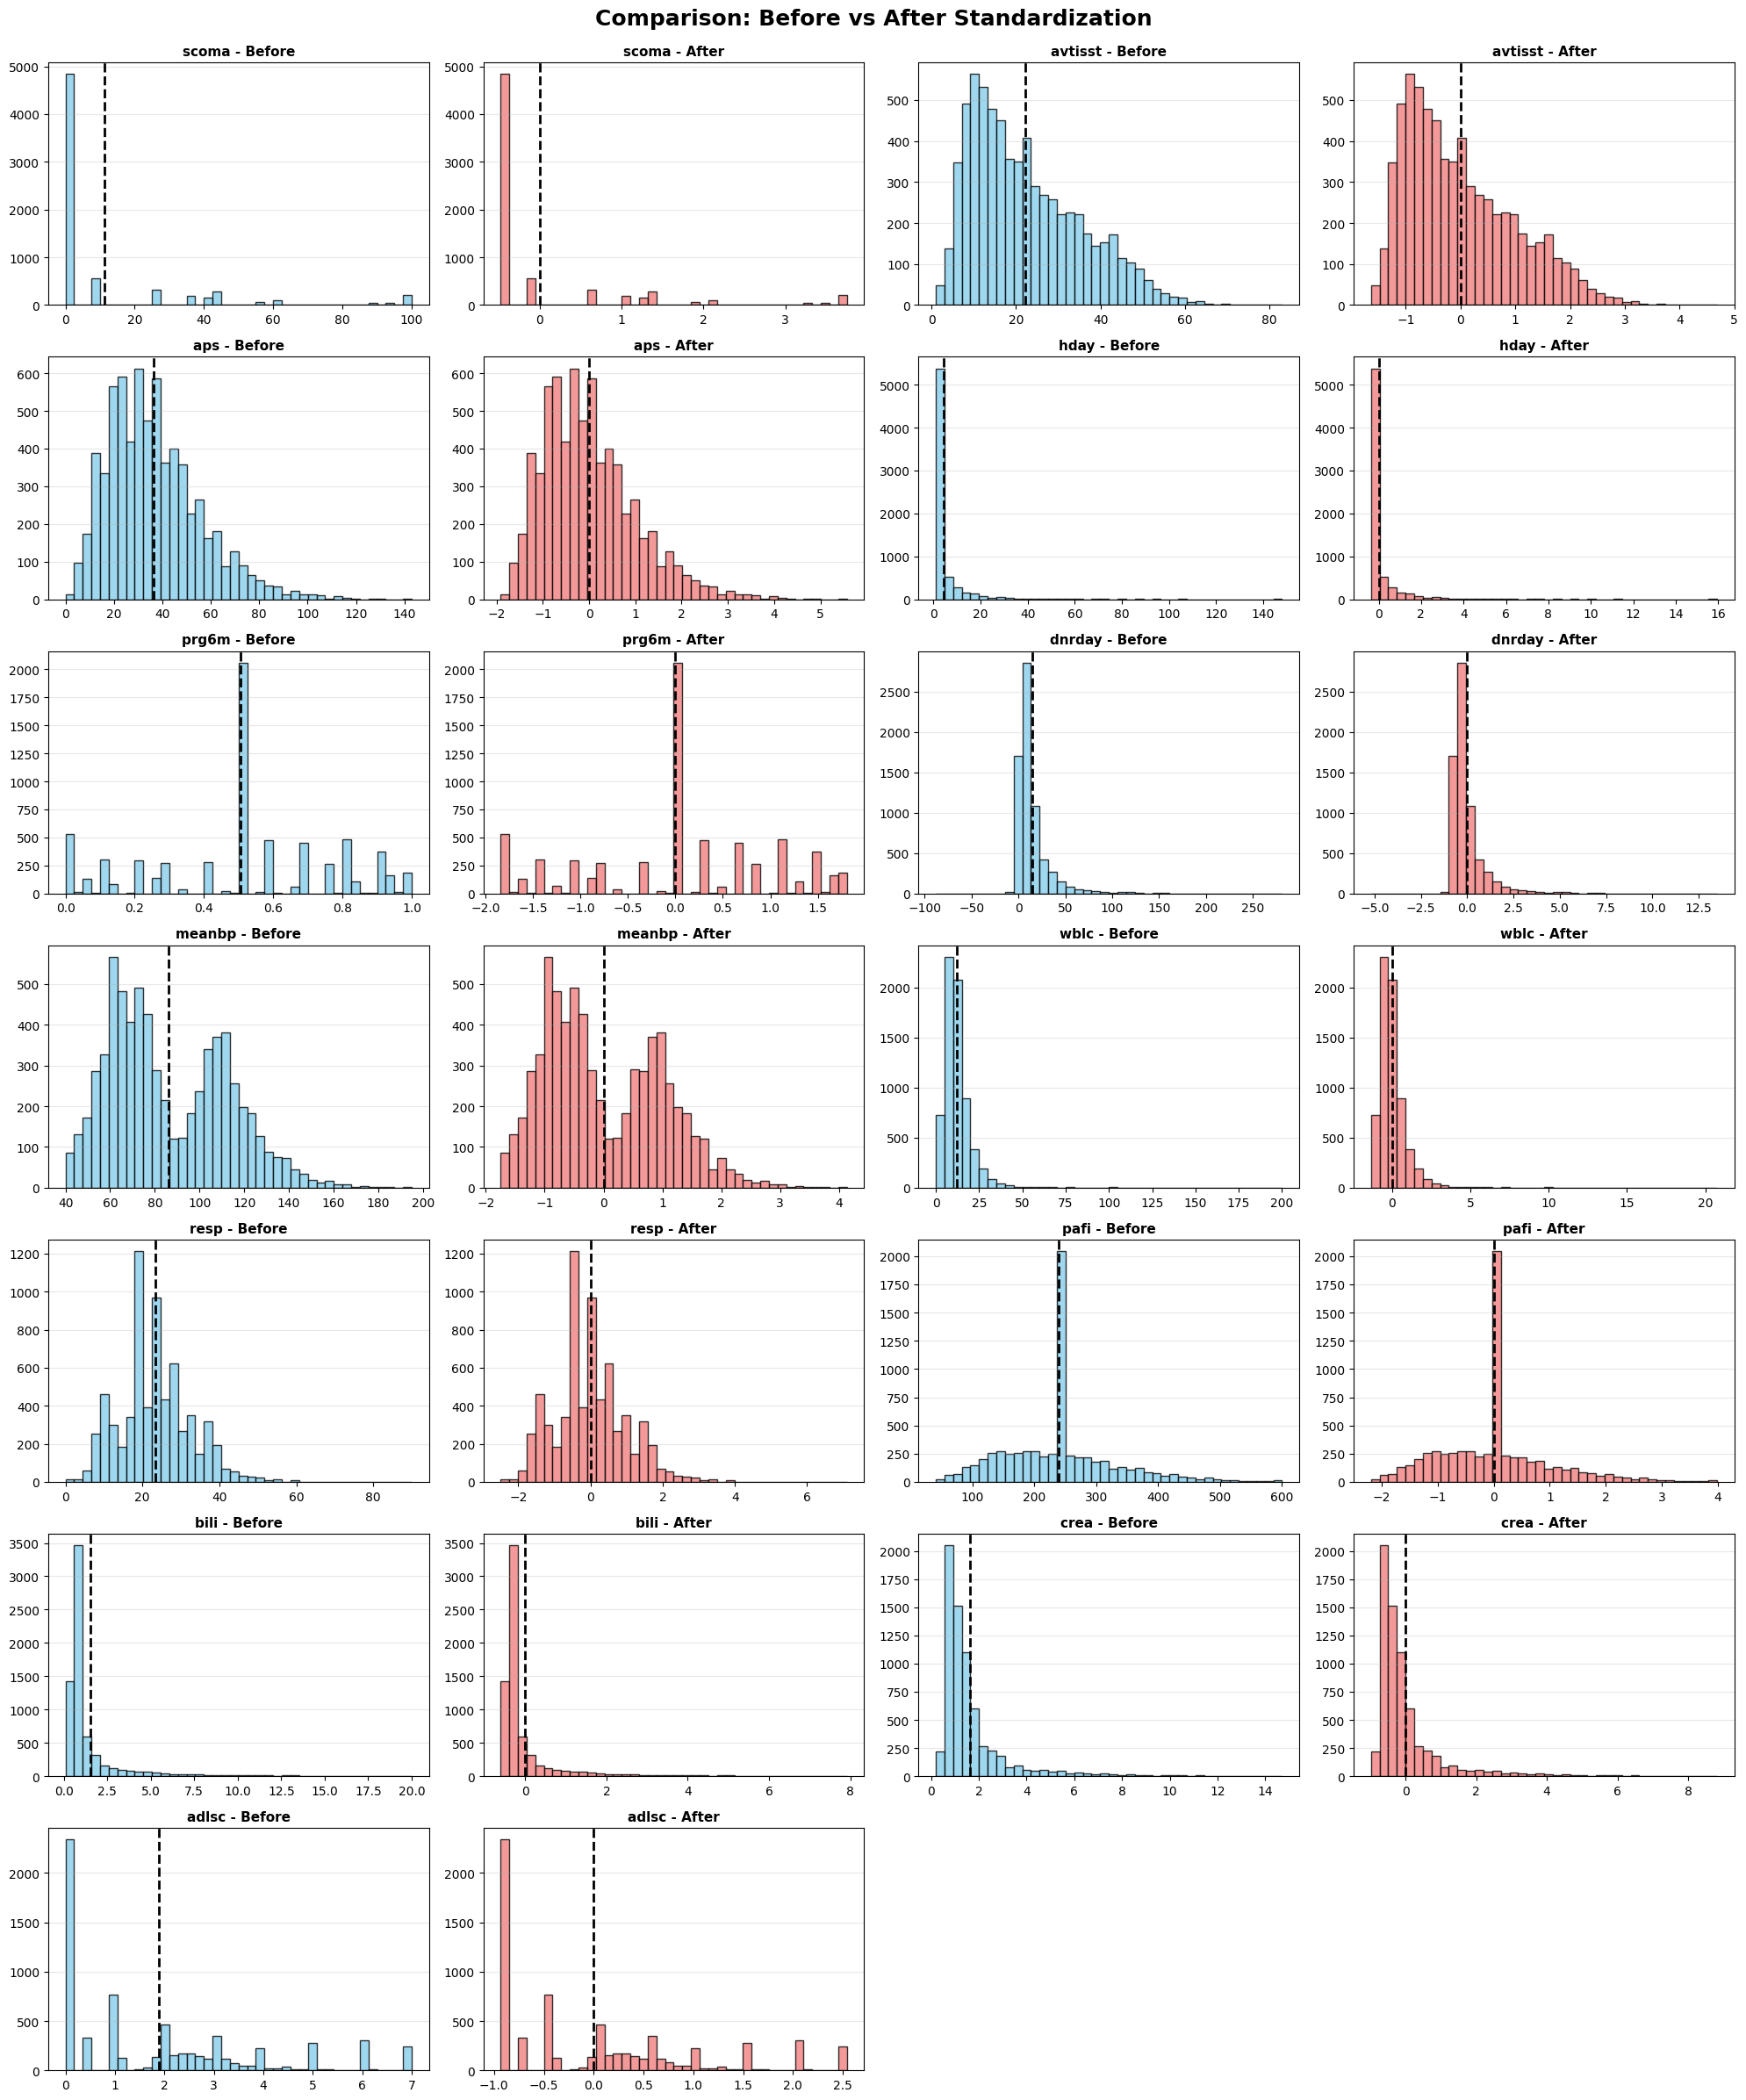

In [ ]:
from sklearn.preprocessing import StandardScaler

selected_continuous_cols = ['scoma', 'avtisst', 'aps', 'hday', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'resp', 'pafi', 'bili', 'crea', 'adlsc']

# Scaling
X_train_before = X_train_encode[selected_continuous_cols].copy()

scaler = StandardScaler()
X_train_after = scaler.fit_transform(X_train_encode[selected_continuous_cols])
X_train_after = pd.DataFrame(X_train_after, columns=selected_continuous_cols, index=X_train_encode.index)

X_test_encode[selected_continuous_cols] = scaler.transform(X_test_encode[selected_continuous_cols])

# Graph
fig, axes = plt.subplots(7, 4, figsize=(20, 24))  # เพิ่มความสูง
axes = axes.flatten()
fig.suptitle('Comparison: Before vs After Standardization', fontsize=18, fontweight='bold', y=0.995)

for idx, col in enumerate(selected_continuous_cols):
    # 2 subplot / 1 feature (Before/After)
    ax_before = axes[idx*2]
    ax_after = axes[idx*2 + 1]

    # Plot before scaling
    ax_before.hist(X_train_before[col].dropna(), bins=40, color='skyblue', edgecolor='black', alpha=0.8)
    ax_before.set_title(f'{col} - Before', fontsize=11, fontweight='bold')
    ax_before.grid(axis='y', alpha=0.3)
    # Present mean and std
    mean_b = X_train_before[col].mean()
    std_b = X_train_before[col].std()
    ax_before.axvline(mean_b, color='black', linestyle='--', linewidth=2)

    # Plot after scaling
    ax_after.hist(X_train_after[col].dropna(), bins=40, color='lightcoral', edgecolor='black', alpha=0.8)
    ax_after.set_title(f'{col} - After', fontsize=11, fontweight='bold')
    ax_after.grid(axis='y', alpha=0.3)
    # Present mean and std
    mean_a = X_train_after[col].mean()
    std_a = X_train_after[col].std()
    ax_after.axvline(mean_a, color='black', linestyle='--', linewidth=2)

for idx in range(len(selected_continuous_cols)*2, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Statics table
print("\nStatistics Comparison: Before VS After Standardization")
print("="*100)
comparison_df = pd.DataFrame({'Feature': selected_continuous_cols, 'Mean_Before': X_train_before.mean().values, 'Std_Before': X_train_before.std().values,
    'Min_Before': X_train_before.min().values, 'Max_Before': X_train_before.max().values, 'Mean_After': X_train_after.mean().values,
    'Std_After': X_train_after.std().values, 'Min_After': X_train_after.min().values, 'Max_After': X_train_after.max().values})
pd.options.display.float_format = '{:.4f}'.format
print(comparison_df.to_string(index=False))
print("="*100)


Statistics Comparison: Before VS After Standardization
Feature  Mean_Before  Std_Before  Min_Before  Max_Before  Mean_After  Std_After  Min_After  Max_After
  scoma      11.3146     23.6526      0.0000    100.0000     -0.0000     1.0001    -0.4784     3.7498
avtisst      22.2219     12.9638      1.0000     83.0000     -0.0000     1.0001    -1.6371     4.6887
    aps      36.5671     19.0989      0.0000    143.0000     -0.0000     1.0001    -1.9148     5.5731
   hday       4.2675      9.0121      1.0000    148.0000      0.0000     1.0001    -0.3626    15.9500
  prg6m       0.5048      0.2743      0.0000      1.0000     -0.0000     1.0001    -1.8407     1.8056
 dnrday      14.5052     19.7464    -88.0000    281.0000      0.0000     1.0001    -5.1915    13.4969
 meanbp      86.0836     26.3605     40.0000    195.0000     -0.0000     1.0001    -1.7483     4.1321
   wblc      12.1435      9.0540      0.0000    200.0000     -0.0000     1.0001    -1.3413    20.7499
   resp      23.3702      

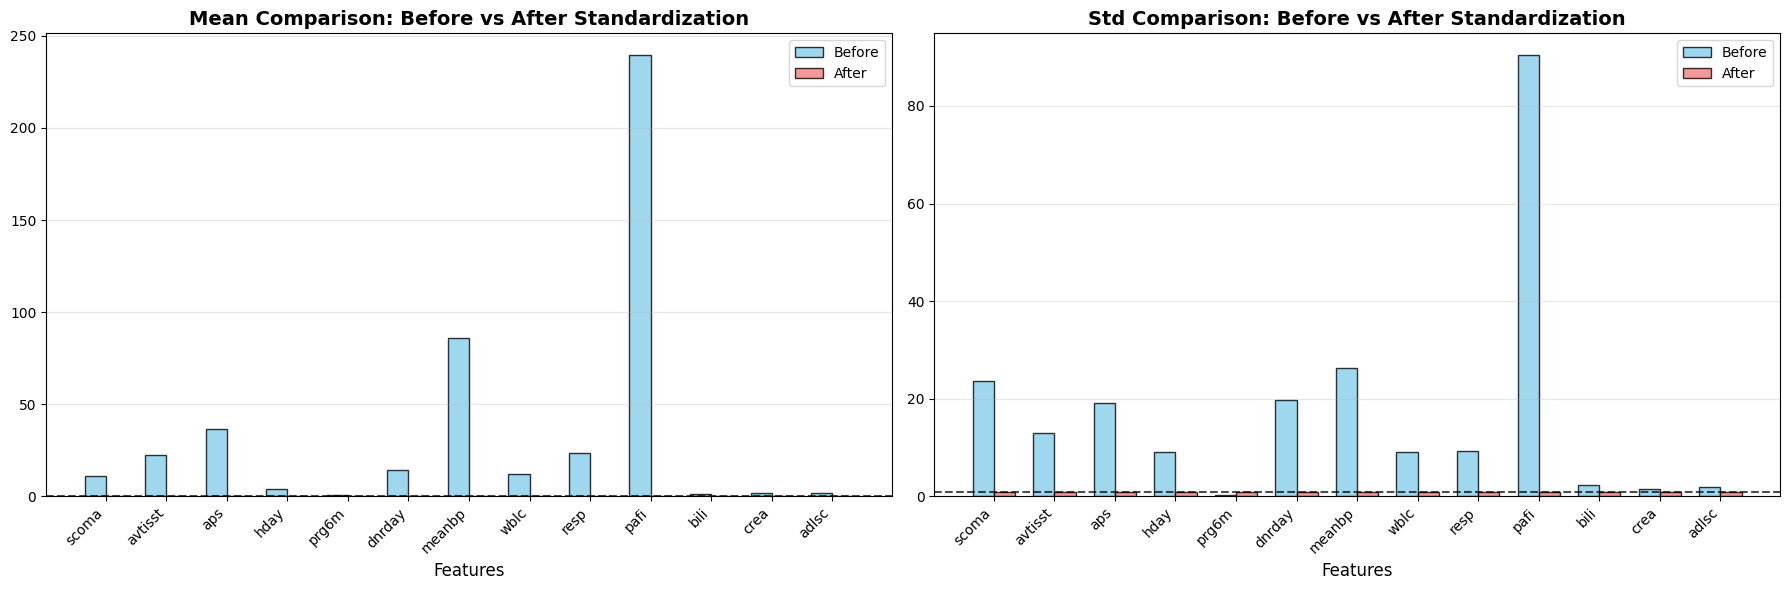

Final Validation
Mean of scaled features: -0.0000
Std of scaled features: 1.0001


In [ ]:
# Graph: Mean and Std
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
x_pos = np.arange(len(selected_continuous_cols))
width = 0.35

# Mean comparison
bars1 = ax1.bar(x_pos - width/2, comparison_df['Mean_Before'], width,
                label='Before', alpha=0.8, color='skyblue', edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, comparison_df['Mean_After'], width,
                label='After', alpha=0.8, color='lightcoral', edgecolor='black')
ax1.set_xlabel('Features', fontsize=12)
ax1.set_title('Mean Comparison: Before vs After Standardization', fontweight='bold', fontsize=14)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(selected_continuous_cols, rotation=45, ha='right')
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target Mean=0')

# Std comparison
bars3 = ax2.bar(x_pos - width/2, comparison_df['Std_Before'], width,
                label='Before', alpha=0.8, color='skyblue', edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, comparison_df['Std_After'], width,
                label='After', alpha=0.8, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Features', fontsize=12)
ax2.set_title('Std Comparison: Before vs After Standardization', fontweight='bold', fontsize=14)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(selected_continuous_cols, rotation=45, ha='right')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target Std=1')

plt.tight_layout()
plt.show()

# Check correct scaling
print("Final Validation")
print(f"Mean of scaled features: {X_train_after.mean().mean():.4f}")
print(f"Std of scaled features: {X_train_after.std().mean():.4f}")

# Update X_train_encode with scaled values
X_train_encode[selected_continuous_cols] = X_train_after

# **12. Model construction**

จะทำการสร้าง Model 2 แบบ ได้แก่ แบบที่ทำ Feature Selection แบบ Filter Method กับแบบที่ทำ Feature Selection แบบ Wrapper Method เพื่อเปรียบเทียบประสิทธิภาพของ Model



## **12.1 Logistic Regression with Filter Method**

In [ ]:
# let's print the shape of train and test
print("X_train shape", X_train_encode.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test_encode.shape)
print("y_test shape", y_test.shape)

X_train shape (6793, 26)
y_train shape (6793,)
X_test shape (1699, 26)
y_test shape (1699,)


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'hospdead'
Predictors = list(X_train_encode.columns)

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Printing all the parameters of Linear regression
print(logreg)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)


In [ ]:
# Creating the model on Training Data
logreg.fit(X_train_encode, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
print("Model training completed")
print(f"Number of features: {logreg.n_features_in_}")
print(f"Number of iterations: {logreg.n_iter_}")
print(f"Coefficient: {logreg.coef_}")
print(f"intercept: {logreg.intercept_}")

Model training completed
Number of features: 26
Number of iterations: [39]
Coefficient: [[-0.08997303  0.16457479  1.15282609  0.39873426  0.10289729  0.00942062
   0.51170002  0.04937813 -0.05077142 -0.01997524 -0.00459699  0.04520699
   0.17547694  0.00920131 -0.34420562 -0.26954638 -0.4287918   0.10696766
   0.531803    0.11199824 -1.57937737  4.23268843 -1.03219866 -1.86719986
  -0.96806956 -1.30079649]]
intercept: [-1.84467854]


In [ ]:
# Printing some sample values of prediction
print("Training result prediction of Model")
TrainingPrediction = logreg.predict(X_train_encode)
TrainingPredictionProba = logreg.predict_proba(X_train_encode)[:, 1]

TrainingDataResults = pd.DataFrame(data=X_train_encode, columns=Predictors)
TrainingDataResults[TargetVariable] = y_train.values
TrainingDataResults[('Predicted' + TargetVariable)] = TrainingPrediction
TrainingDataResults[('Probability')] = TrainingPredictionProba

# Printing sample prediction values
print(TrainingDataResults.head())

Training result prediction of Model
   num.co   scoma  avtisst     aps    hday   prg6m  dnrday  meanbp    wblc  \
0       6 -0.4784   0.9858  1.5936 -0.2516 -0.3822 -0.4814 -1.4448  4.7993   
1       3 -0.4784   0.5422 -0.2915 -0.3626 -0.9291  0.9873 -1.2551 -0.7228   
2       3 -0.0979   0.7350  0.0750 -0.3626  0.5294  1.6964  0.7935 -0.0601   
3       0  3.4961   0.8507  1.5936 -0.3626 -0.0176  1.4938 -0.7999  0.4148   
4       1 -0.4784  -1.0200 -1.4435 -0.3626 -0.0176 -0.5320  0.6418 -0.7338   

     resp  ...  dnr__dnr before sadm  dnr__no dnr  sfdm2__<2 mo. follow-up  \
0 -2.4902  ...                     0            0                        1   
1 -0.7853  ...                     0            1                        0   
2 -0.1460  ...                     0            0                        1   
3 -0.3591  ...                     0            1                        0   
4 -0.3591  ...                     0            1                        0   

   sfdm2__Coma or Intub  s

In [ ]:
# Printing some sample values of prediction
print("Testing result prediction of Model")
TestingPrediction = logreg.predict(X_test_encode)
TestingPredictionProba = logreg.predict_proba(X_test_encode)[:, 1]

TestingDataResults = pd.DataFrame(data=X_test_encode, columns=Predictors)
TestingDataResults[TargetVariable] = y_test.values
TestingDataResults[('Predicted' + TargetVariable)] = TestingPrediction
TestingDataResults[('Probability')] = TestingPredictionProba

# Printing sample prediction values
print(TestingDataResults.head())

Testing result prediction of Model
   num.co   scoma  avtisst     aps    hday   prg6m  dnrday  meanbp    wblc  \
0       0 -0.4784   0.4972 -0.9199 -0.2516  1.2586  0.4302  0.2245 -0.7780   
1       2  1.3820   0.3686  0.8605  0.4142  0.0034  1.0380  1.5902  1.0995   
2       1 -0.4784   0.5486 -0.0821 -0.3626 -1.6584 -0.0256 -0.2687 -0.2258   
3       1 -0.4784  -0.4286  1.9077 -0.2516 -0.0176  0.0757 -0.9896 -0.6013   
4       3 -0.4784   0.9472  0.3368 -0.3626 -1.1115  1.9496 -1.5586  0.1166   

     resp  ...  dnr__dnr before sadm  dnr__no dnr  sfdm2__<2 mo. follow-up  \
0 -0.3591  ...                     0            1                        0   
1  1.7720  ...                     0            1                        0   
2 -0.3591  ...                     0            0                        1   
3  1.7720  ...                     0            1                        0   
4 -1.4247  ...                     0            1                        1   

   sfdm2__Coma or Intub  sf

In [ ]:
# Evaluation Metrics
from sklearn import metrics

# Classification Metrics for Training data
print('=== Training Data Metrics ===')
print('Accuracy Score:', metrics.accuracy_score(y_train, TrainingPrediction))
print('Precision Score:', metrics.precision_score(y_train, TrainingPrediction))
print('Recall Score:', metrics.recall_score(y_train, TrainingPrediction))
print('F1 Score:', metrics.f1_score(y_train, TrainingPrediction))
print('ROC AUC Score:', metrics.roc_auc_score(y_train, TrainingPredictionProba))

=== Training Data Metrics ===
Accuracy Score: 0.9230089798321802
Precision Score: 0.7793974732750243
Recall Score: 0.958756724447101
F1 Score: 0.8598231037255427
ROC AUC Score: 0.9816946774133293


In [ ]:
# Confusion Matrix for Training data
print('Confusion Matrix (Training):')
print(metrics.confusion_matrix(y_train, TrainingPrediction))

# Classification Report for Training data
print('\nClassification Report (Training):')
print(metrics.classification_report(y_train, TrainingPrediction))

Confusion Matrix (Training):
[[4666  454]
 [  69 1604]]

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5120
           1       0.78      0.96      0.86      1673

    accuracy                           0.92      6793
   macro avg       0.88      0.94      0.90      6793
weighted avg       0.93      0.92      0.93      6793



In [ ]:
# Classification Metrics for Testing data
print('=== Testing Data Metrics ===')
print('Accuracy Score:', metrics.accuracy_score(y_test, TestingPrediction))
print('Precision Score:', metrics.precision_score(y_test, TestingPrediction))
print('Recall Score:', metrics.recall_score(y_test, TestingPrediction))
print('F1 Score:', metrics.f1_score(y_test, TestingPrediction))
print('ROC AUC Score:', metrics.roc_auc_score(y_test, TestingPredictionProba))

=== Testing Data Metrics ===
Accuracy Score: 0.9193643319599765
Precision Score: 0.7738791423001949
Recall Score: 0.9497607655502392
F1 Score: 0.8528464017185822
ROC AUC Score: 0.9801086172958478


In [ ]:
# Confusion Matrix for Testing data
print('Confusion Matrix (Testing):')
print(metrics.confusion_matrix(y_test, TestingPrediction))

# Classification Report for Testing data
print('\nClassification Report (Testing):')
print(metrics.classification_report(y_test, TestingPrediction))

Confusion Matrix (Testing):
[[1165  116]
 [  21  397]]

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1281
           1       0.77      0.95      0.85       418

    accuracy                           0.92      1699
   macro avg       0.88      0.93      0.90      1699
weighted avg       0.93      0.92      0.92      1699



In [ ]:
# Print coefficients with feature names
print('=== Model Coefficients ===')
print("Intercept:", logreg.intercept_[0])
for i, predictor in enumerate(Predictors):
    print(f"Coefficient for {predictor}: {logreg.coef_[0][i]:.4f}")

=== Model Coefficients ===
Intercept: -1.8446785425275893
Coefficient for num.co: -0.0900
Coefficient for scoma: 0.1646
Coefficient for avtisst: 1.1528
Coefficient for aps: 0.3987
Coefficient for hday: 0.1029
Coefficient for prg6m: 0.0094
Coefficient for dnrday: 0.5117
Coefficient for meanbp: 0.0494
Coefficient for wblc: -0.0508
Coefficient for resp: -0.0200
Coefficient for pafi: -0.0046
Coefficient for bili: 0.0452
Coefficient for crea: 0.1755
Coefficient for adlsc: 0.0092
Coefficient for dzclass__ARF/MOSF: -0.3442
Coefficient for dzclass__COPD/CHF/Cirrhosis: -0.2695
Coefficient for dzclass__Cancer: -0.4288
Coefficient for dzclass__Coma: 0.1070
Coefficient for dnr__dnr after sadm: 0.5318
Coefficient for dnr__dnr before sadm: 0.1120
Coefficient for dnr__no dnr: -1.5794
Coefficient for sfdm2__<2 mo. follow-up: 4.2327
Coefficient for sfdm2__Coma or Intub: -1.0322
Coefficient for sfdm2__SIP>=30: -1.8672
Coefficient for sfdm2__adl>=4 (>=5 if sur): -0.9681
Coefficient for sfdm2__no(M2 and S

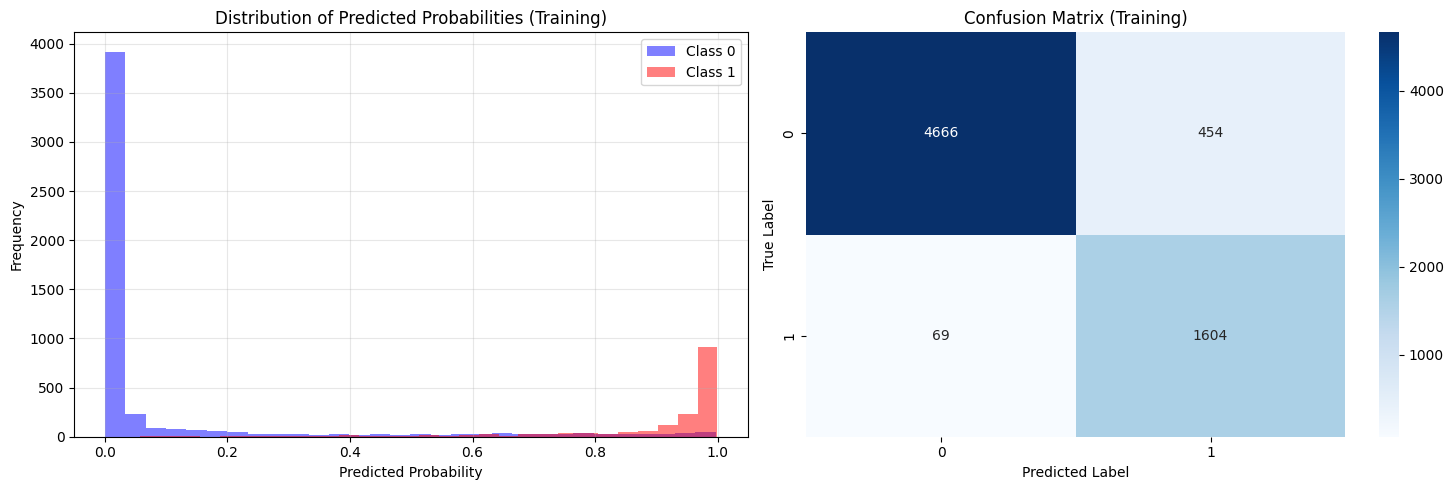

In [ ]:
# Visualize Training Results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Predicted Probabilities Distribution
axes[0].hist(TrainingDataResults[TrainingDataResults[TargetVariable] == 0]['Probability'],
             bins=30, alpha=0.5, label='Class 0', color='blue')
axes[0].hist(TrainingDataResults[TrainingDataResults[TargetVariable] == 1]['Probability'],
             bins=30, alpha=0.5, label='Class 1', color='red')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Predicted Probabilities (Training)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Confusion Matrix Heatmap
cm_train = metrics.confusion_matrix(y_train, TrainingPrediction)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (Training)')

plt.tight_layout()
plt.show()

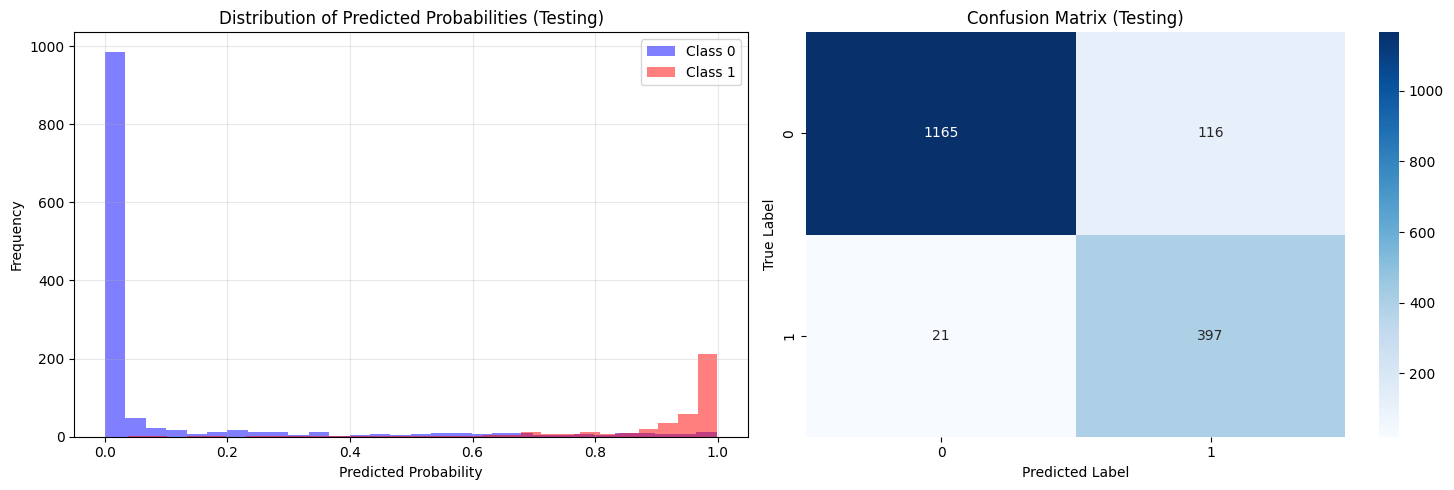

In [ ]:
# Visualize Testing Results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Predicted Probabilities Distribution
axes[0].hist(TestingDataResults[TestingDataResults[TargetVariable] == 0]['Probability'],
             bins=30, alpha=0.5, label='Class 0', color='blue')
axes[0].hist(TestingDataResults[TestingDataResults[TargetVariable] == 1]['Probability'],
             bins=30, alpha=0.5, label='Class 1', color='red')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Predicted Probabilities (Testing)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Confusion Matrix Heatmap
cm_test = metrics.confusion_matrix(y_test, TestingPrediction)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (Testing)')

plt.tight_layout()
plt.show()

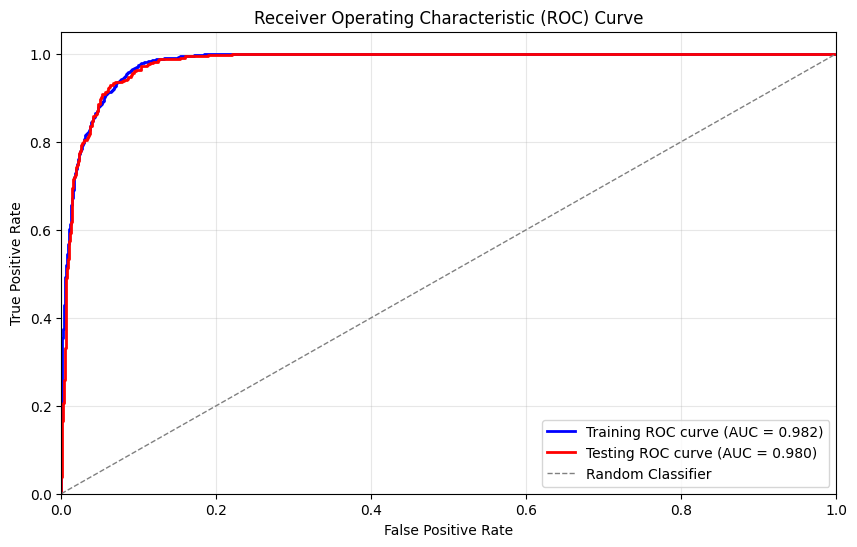

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Training data
fpr_train, tpr_train, _ = roc_curve(y_train, TrainingPredictionProba)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve for Testing data
fpr_test, tpr_test, _ = roc_curve(y_test, TestingPredictionProba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2,
         label=f'Training ROC curve (AUC = {roc_auc_train:.3f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2,
         label=f'Testing ROC curve (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

## **12.2 Logistic Regression with Wrapper Method**

ได้มีการทำอีก Model โดย Model ตัวนี้จะมีการทำ Wrapper Method ในการเลือก Feature ซึ่งในการทำ Wrapper Method จะเลือกใช้วิธี Forward Selection เนื่องจากเหมาะสมกับชุดข้อมูลที่มีจำนวนตัวแปรจำนวนมาก และช่วยให้สามารถประเมินได้อย่างชัดเจนว่าแต่ละ Feature ที่ถูกเพิ่มเข้ามามีส่วนช่วยในการปรับปรุงประสิทธิภาพของโมเดลจริงหรือไม่

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score

# แยกประเภทตัวแปร
categorical_cols = ['death', 'sex', 'dzgroup', 'dzclass', 'num.co', 'diabetes', 'dementia', 'ca', 'dnr', 'sfdm2']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# One-Hot Encoding and Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# แปลงให้เป็น DataFrame พร้อม column names ใหม่
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([cat_features, numeric_cols])
X_train_df = pd.DataFrame(X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed,
                          columns=all_features)
X_test_df = pd.DataFrame(X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed,
                         columns=all_features)

# Forward Feature Selection
log_reg = LogisticRegression(max_iter=1000)

sfs = SFS(
    log_reg,
    k_features='best',
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=5
)

sfs = sfs.fit(X_train_df, y_train)

selected_features = list(sfs.k_feature_names_)
print(selected_features)

['death_1', 'sex_male', 'dzgroup_COPD', 'dzgroup_Colon Cancer', 'dzgroup_Lung Cancer', 'dzclass_COPD/CHF/Cirrhosis', 'dzclass_Cancer', 'num.co_5', 'num.co_6', 'num.co_7', 'num.co_8', 'num.co_9', 'dementia_1', 'ca_yes', 'dnr_dnr before sadm', 'dnr_no dnr', 'sfdm2_Coma or Intub', 'sfdm2_SIP>=30', 'sfdm2_adl>=4 (>=5 if sur)', 'sfdm2_no(M2 and SIP pres)', 'scoma', 'avtisst', 'aps', 'hday', 'prg6m', 'dnrday', 'wblc', 'hrt', 'temp', 'pafi', 'bili', 'sod', 'ph', 'adlsc']


In [ ]:
X_train_df = X_train_df[selected_features]
X_test_df = X_test_df[selected_features]

In [ ]:
X_train_df.head()

death_1  sex_male  dzgroup_COPD  dzgroup_Colon Cancer  dzgroup_Lung Cancer  \
0   1.0000    0.0000        0.0000                0.0000               0.0000   
1   1.0000    1.0000        0.0000                0.0000               0.0000   
2   1.0000    1.0000        0.0000                0.0000               0.0000   
3   1.0000    1.0000        0.0000                0.0000               0.0000   
4   1.0000    1.0000        0.0000                0.0000               1.0000   

   dzclass_COPD/CHF/Cirrhosis  dzclass_Cancer  num.co_5  num.co_6  num.co_7  \
0                      0.0000          0.0000    0.0000    1.0000    0.0000   
1                      1.0000          0.0000    0.0000    0.0000    0.0000   
2                      0.0000          0.0000    0.0000    0.0000    0.0000   
3                      0.0000          0.0000    0.0000    0.0000    0.0000   
4                      0.0000          1.0000    0.0000    0.0000    0.0000   

   ...   prg6m  dnrday    wblc     hrt    temp    pafi    bili     sod  \
0  ... -0.3822 -0.4814  4.7993 -0.9331  0.8710 -1.2322 -0.3064 -1.1151   
1  ... -0.9291  0.9873 -0.7228  0.2439 -0.4919  0.0045 -0.1780 -0.6029   
2  ...  0.5294  1.6964 -0.0601 -1.6057 -0.3349 -0.9334 -0.3064 -0.4321   
3  ... -0.0176  1.4938  0.4148  2.7659  0.9527 -1.1734  1.7487  2.2999   
4  ... -0.0176 -0.5320 -0.7338 -0.5968 -0.7368  0.0045 -0.3064  0.0801   

       ph   adlsc  
0  0.0212  0.6736  
1 -0.0028  1.5482  
2  0.7786  2.0446  
3  0.3182 -0.9341  
4 -0.0028 -0.9341  

[5 rows x 34 columns]

In [ ]:
X_test_df.head()

death_1  sex_male  dzgroup_COPD  dzgroup_Colon Cancer  dzgroup_Lung Cancer  \
0   0.0000    1.0000        0.0000                0.0000               0.0000   
1   0.0000    1.0000        0.0000                0.0000               0.0000   
2   1.0000    1.0000        0.0000                0.0000               0.0000   
3   0.0000    0.0000        0.0000                0.0000               0.0000   
4   1.0000    1.0000        0.0000                0.0000               0.0000   

   dzclass_COPD/CHF/Cirrhosis  dzclass_Cancer  num.co_5  num.co_6  num.co_7  \
0                      0.0000          0.0000    0.0000    0.0000    0.0000   
1                      0.0000          0.0000    0.0000    0.0000    0.0000   
2                      0.0000          0.0000    0.0000    0.0000    0.0000   
3                      0.0000          0.0000    0.0000    0.0000    0.0000   
4                      1.0000          0.0000    0.0000    0.0000    0.0000   

   ...   prg6m  dnrday    wblc     hrt    temp    pafi    bili     sod  \
0  ...  1.2586  0.4302 -0.7780 -0.9331 -0.0899  0.0045  0.9781 -0.2614   
1  ...  0.0034  1.0380  1.0995  1.7571 -0.4919  0.5386 -0.0924 -0.4321   
2  ... -1.6584 -0.0256 -0.2258 -1.0004  0.4690  0.0045 -0.3921  0.0801   
3  ... -0.0176  0.0757 -0.6013  0.8155  1.1160  0.0959  0.4642 -1.7982   
4  ... -1.1115  1.9496  0.1166 -0.9331 -0.5735 -0.2970  0.0789 -0.9444   

       ph   adlsc  
0 -0.0028 -0.9341  
1 -1.6571 -0.4376  
2 -0.0028 -0.4376  
3 -0.2907 -0.9341  
4  1.0757  2.5411  

[5 rows x 34 columns]

In [ ]:
# let's print the shape of train and test
print("X_train shape", X_train_df.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test_df.shape)
print("y_test shape", y_test.shape)

X_train shape (6793, 34)
y_train shape (6793,)
X_test shape (1699, 34)
y_test shape (1699,)


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable2 = 'hospdead'
Predictors2 = list(X_train_df.columns)

In [ ]:
# Multiple Linear Regression
logreg2 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Printing all the parameters of Linear regression
print(logreg2)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)


In [ ]:
# Creating the model on Training Data
logreg2.fit(X_train_df, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
print("Model training completed")
print(f"Number of features: {logreg2.n_features_in_}")
print(f"Number of iterations: {logreg2.n_iter_}")
print(f"Coefficient: {logreg2.coef_}")
print(f"intercept: {logreg2.intercept_}")

Model training completed
Number of features: 34
Number of iterations: [37]
Coefficient: [[ 3.92172554e+00  2.05565782e-02  1.72463564e-01 -1.91649208e-01
  -1.05797899e-02 -2.23341490e-01 -2.02228998e-01  3.65028025e-01
   2.89021039e-01 -8.93903450e-01 -3.92930743e-03 -1.65362748e-03
  -1.59954185e-01 -3.13177506e-01 -2.84284381e-01 -1.86969578e+00
  -3.68189899e+00 -4.64395615e+00 -4.29660934e+00 -4.60154036e+00
   2.44362467e-01  1.10234499e+00  3.70917555e-01  7.04662168e-02
  -3.52625063e-02  4.92659128e-01 -2.37146866e-02  4.27891066e-03
  -3.36452650e-02 -3.30508831e-03  7.26018914e-02  5.25453390e-02
  -3.66227953e-03 -2.41002678e-02]]
intercept: [-1.53388015]


In [ ]:
# Printing some sample values of prediction
print("Training result prediction of Model")
TrainingPrediction2 = logreg2.predict(X_train_df)
TrainingPredictionProba2 = logreg2.predict_proba(X_train_df)[:, 1]

TrainingDataResults2 = pd.DataFrame(data=X_train_df, columns=Predictors2)
TrainingDataResults2[TargetVariable2] = y_train.values
TrainingDataResults2[('Predicted' + TargetVariable2)] = TrainingPrediction2
TrainingDataResults2[('Probability')] = TrainingPredictionProba2

# Printing sample prediction values
print(TrainingDataResults2.head())

Training result prediction of Model
   death_1  sex_male  dzgroup_COPD  dzgroup_Colon Cancer  dzgroup_Lung Cancer  \
0   1.0000    0.0000        0.0000                0.0000               0.0000   
1   1.0000    1.0000        0.0000                0.0000               0.0000   
2   1.0000    1.0000        0.0000                0.0000               0.0000   
3   1.0000    1.0000        0.0000                0.0000               0.0000   
4   1.0000    1.0000        0.0000                0.0000               1.0000   

   dzclass_COPD/CHF/Cirrhosis  dzclass_Cancer  num.co_5  num.co_6  num.co_7  \
0                      0.0000          0.0000    0.0000    1.0000    0.0000   
1                      1.0000          0.0000    0.0000    0.0000    0.0000   
2                      0.0000          0.0000    0.0000    0.0000    0.0000   
3                      0.0000          0.0000    0.0000    0.0000    0.0000   
4                      0.0000          1.0000    0.0000    0.0000    0.0000   

  

In [ ]:
# Printing some sample values of prediction
print("Testing result prediction of Model")
TestingPrediction2 = logreg2.predict(X_test_df)
TestingPredictionProba2 = logreg2.predict_proba(X_test_df)[:, 1]

TestingDataResults2 = pd.DataFrame(data=X_test_df, columns=Predictors2)
TestingDataResults2[TargetVariable2] = y_test.values
TestingDataResults2[('Predicted' + TargetVariable2)] = TestingPrediction2
TestingDataResults2[('Probability')] = TestingPredictionProba2

# Printing sample prediction values
print(TestingDataResults2.head())

Testing result prediction of Model
   death_1  sex_male  dzgroup_COPD  dzgroup_Colon Cancer  dzgroup_Lung Cancer  \
0   0.0000    1.0000        0.0000                0.0000               0.0000   
1   0.0000    1.0000        0.0000                0.0000               0.0000   
2   1.0000    1.0000        0.0000                0.0000               0.0000   
3   0.0000    0.0000        0.0000                0.0000               0.0000   
4   1.0000    1.0000        0.0000                0.0000               0.0000   

   dzclass_COPD/CHF/Cirrhosis  dzclass_Cancer  num.co_5  num.co_6  num.co_7  \
0                      0.0000          0.0000    0.0000    0.0000    0.0000   
1                      0.0000          0.0000    0.0000    0.0000    0.0000   
2                      0.0000          0.0000    0.0000    0.0000    0.0000   
3                      0.0000          0.0000    0.0000    0.0000    0.0000   
4                      1.0000          0.0000    0.0000    0.0000    0.0000   

   

In [ ]:
# Evaluation Metrics
# Classification Metrics for Training data
print('=== Training Data Metrics ===')
print('Accuracy Score:', metrics.accuracy_score(y_train, TrainingPrediction2))
print('Precision Score:', metrics.precision_score(y_train, TrainingPrediction2))
print('Recall Score:', metrics.recall_score(y_train, TrainingPrediction2))
print('F1 Score:', metrics.f1_score(y_train, TrainingPrediction2))
print('ROC AUC Score:', metrics.roc_auc_score(y_train, TrainingPredictionProba2))

=== Training Data Metrics ===
Accuracy Score: 0.9258059767407626
Precision Score: 0.7822308063737325
Recall Score: 0.968320382546324
F1 Score: 0.8653846153846154
ROC AUC Score: 0.9826464902121937


In [ ]:
# Confusion Matrix for Training data
print('Confusion Matrix (Training):')
print(metrics.confusion_matrix(y_train, TrainingPrediction2))

# Classification Report for Training data
print('\nClassification Report (Training):')
print(metrics.classification_report(y_train, TrainingPrediction2))

Confusion Matrix (Training):
[[4669  451]
 [  53 1620]]

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5120
           1       0.78      0.97      0.87      1673

    accuracy                           0.93      6793
   macro avg       0.89      0.94      0.91      6793
weighted avg       0.94      0.93      0.93      6793



In [ ]:
# Classification Metrics for Testing data
print('=== Testing Data Metrics ===')
print('Accuracy Score:', metrics.accuracy_score(y_test, TestingPrediction2))
print('Precision Score:', metrics.precision_score(y_test, TestingPrediction2))
print('Recall Score:', metrics.recall_score(y_test, TestingPrediction2))
print('F1 Score:', metrics.f1_score(y_test, TestingPrediction2))
print('ROC AUC Score:', metrics.roc_auc_score(y_test, TestingPredictionProba2))

=== Testing Data Metrics ===
Accuracy Score: 0.9228958210712184
Precision Score: 0.7754318618042226
Recall Score: 0.9665071770334929
F1 Score: 0.8604898828541001
ROC AUC Score: 0.9820732905288556


In [ ]:
# Confusion Matrix for Testing data
print('Confusion Matrix (Testing):')
print(metrics.confusion_matrix(y_test, TestingPrediction2))

# Classification Report for Testing data
print('\nClassification Report (Testing):')
print(metrics.classification_report(y_test, TestingPrediction2))

Confusion Matrix (Testing):
[[1164  117]
 [  14  404]]

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1281
           1       0.78      0.97      0.86       418

    accuracy                           0.92      1699
   macro avg       0.88      0.94      0.90      1699
weighted avg       0.94      0.92      0.93      1699



In [ ]:
# Print coefficients with feature names
print('=== Model Coefficients ===')
print("Intercept:", logreg2.intercept_[0])
for i, predictor in enumerate(Predictors2):
    print(f"Coefficient for {predictor}: {logreg2.coef_[0][i]:.4f}")

=== Model Coefficients ===
Intercept: -1.5338801492076921
Coefficient for death_1: 3.9217
Coefficient for sex_male: 0.0206
Coefficient for dzgroup_COPD: 0.1725
Coefficient for dzgroup_Colon Cancer: -0.1916
Coefficient for dzgroup_Lung Cancer: -0.0106
Coefficient for dzclass_COPD/CHF/Cirrhosis: -0.2233
Coefficient for dzclass_Cancer: -0.2022
Coefficient for num.co_5: 0.3650
Coefficient for num.co_6: 0.2890
Coefficient for num.co_7: -0.8939
Coefficient for num.co_8: -0.0039
Coefficient for num.co_9: -0.0017
Coefficient for dementia_1: -0.1600
Coefficient for ca_yes: -0.3132
Coefficient for dnr_dnr before sadm: -0.2843
Coefficient for dnr_no dnr: -1.8697
Coefficient for sfdm2_Coma or Intub: -3.6819
Coefficient for sfdm2_SIP>=30: -4.6440
Coefficient for sfdm2_adl>=4 (>=5 if sur): -4.2966
Coefficient for sfdm2_no(M2 and SIP pres): -4.6015
Coefficient for scoma: 0.2444
Coefficient for avtisst: 1.1023
Coefficient for aps: 0.3709
Coefficient for hday: 0.0705
Coefficient for prg6m: -0.0353
Coef

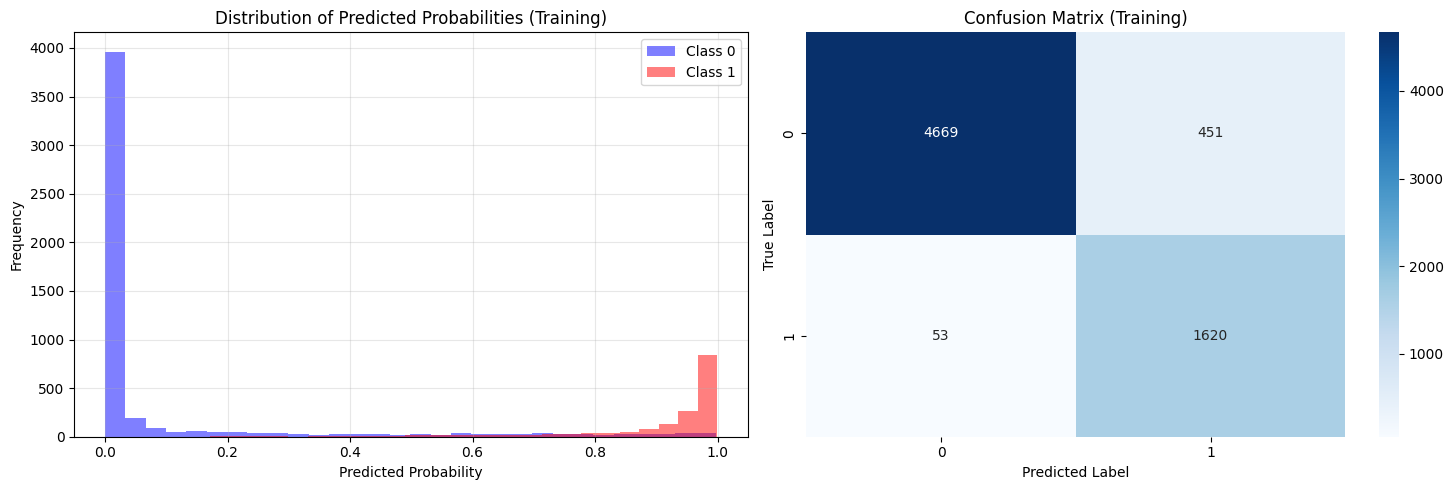

In [ ]:
# Visualize Training Results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Predicted Probabilities Distribution
axes[0].hist(TrainingDataResults2[TrainingDataResults2[TargetVariable2] == 0]['Probability'],
             bins=30, alpha=0.5, label='Class 0', color='blue')
axes[0].hist(TrainingDataResults2[TrainingDataResults2[TargetVariable2] == 1]['Probability'],
             bins=30, alpha=0.5, label='Class 1', color='red')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Predicted Probabilities (Training)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Confusion Matrix Heatmap
cm_train = metrics.confusion_matrix(y_train, TrainingPrediction2)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (Training)')

plt.tight_layout()
plt.show()

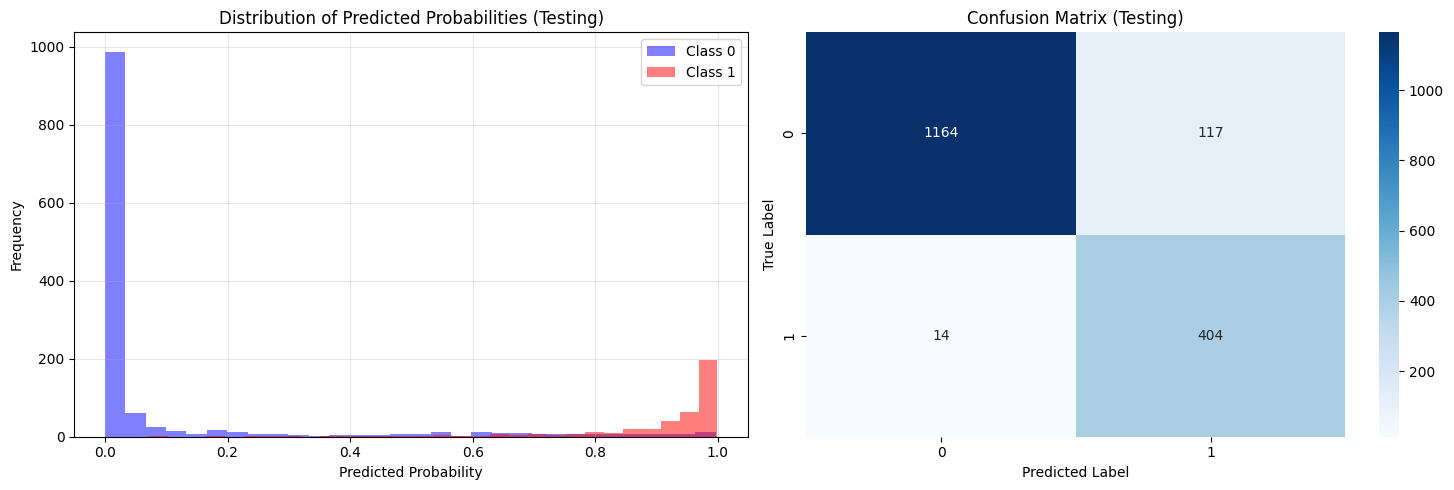

In [ ]:
# Visualize Testing Results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Predicted Probabilities Distribution
axes[0].hist(TestingDataResults2[TestingDataResults2[TargetVariable2] == 0]['Probability'],
             bins=30, alpha=0.5, label='Class 0', color='blue')
axes[0].hist(TestingDataResults2[TestingDataResults2[TargetVariable2] == 1]['Probability'],
             bins=30, alpha=0.5, label='Class 1', color='red')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Predicted Probabilities (Testing)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Confusion Matrix Heatmap
cm_test = metrics.confusion_matrix(y_test, TestingPrediction2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (Testing)')

plt.tight_layout()
plt.show()

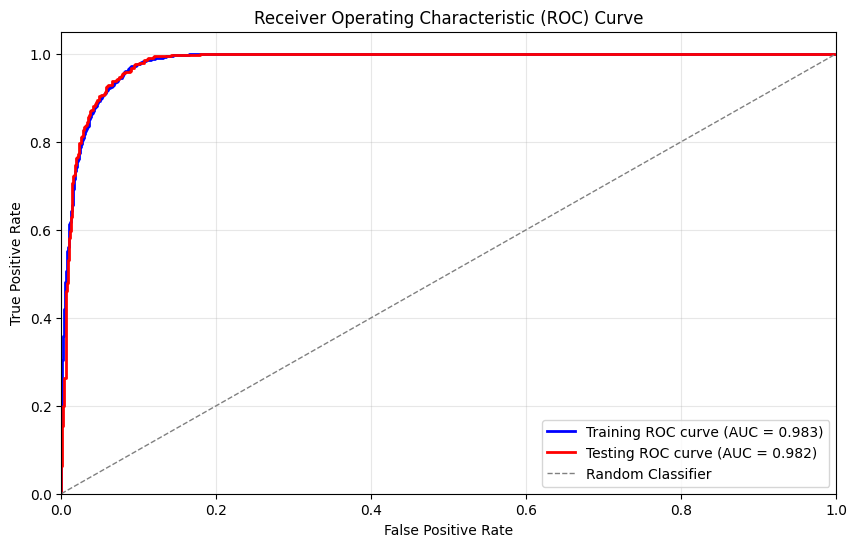

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Training data
fpr_train, tpr_train, _ = roc_curve(y_train, TrainingPredictionProba2)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve for Testing data
fpr_test, tpr_test, _ = roc_curve(y_test, TestingPredictionProba2)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2,
         label=f'Training ROC curve (AUC = {roc_auc_train:.3f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2,
         label=f'Testing ROC curve (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# **13. Results Analysis**

## **13.1 Overfitting or not? Why?**

Performance Comparison (Model1):
   Metric  Training  Testing  Difference  Difference %
 Accuracy    0.9230   0.9194      0.0036        0.3900
Precision    0.7794   0.7739      0.0055        0.7100
   Recall    0.9588   0.9498      0.0090        0.9400
 F1-Score    0.8598   0.8528      0.0070        0.8100
  ROC-AUC    0.9817   0.9801      0.0016        0.1600


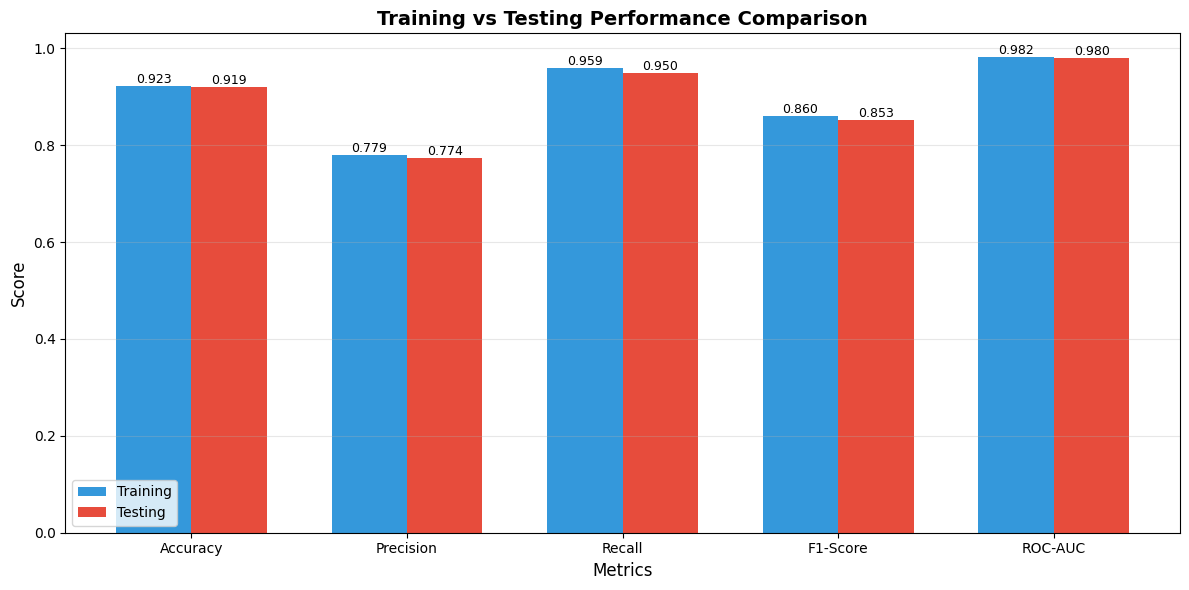


OVERFITTING ASSESSMENT:
   • Accuracy difference: 0.39%
   • ROC-AUC difference: 0.16%

NO OVERFITTING DETECTED

    The model shows excellent generalization:
    - Performance gap < 3% indicates the model learned general patterns
    - Similar performance on unseen data validates model reliability
    - The model is ready for production use with proper monitoring
    


In [ ]:
# Calculate metrics comparison
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Training': [
        metrics.accuracy_score(y_train, TrainingPrediction),
        metrics.precision_score(y_train, TrainingPrediction),
        metrics.recall_score(y_train, TrainingPrediction),
        metrics.f1_score(y_train, TrainingPrediction),
        metrics.roc_auc_score(y_train, TrainingPredictionProba)
    ],
    'Testing': [
        metrics.accuracy_score(y_test, TestingPrediction),
        metrics.precision_score(y_test, TestingPrediction),
        metrics.recall_score(y_test, TestingPrediction),
        metrics.f1_score(y_test, TestingPrediction),
        metrics.roc_auc_score(y_test, TestingPredictionProba)
    ]
})

metrics_comparison['Difference'] = metrics_comparison['Training'] - metrics_comparison['Testing']
metrics_comparison['Difference %'] = (metrics_comparison['Difference'] / metrics_comparison['Training'] * 100).round(2)

print("Performance Comparison (Model1):")
print(metrics_comparison.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics_comparison['Metric']))
width = 0.35
bars1 = ax.bar(x - width/2, metrics_comparison['Training'], width, label='Training', color='#3498db')
bars2 = ax.bar(x + width/2, metrics_comparison['Testing'], width, label='Testing', color='#e74c3c')
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Training vs Testing Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison['Metric'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# Statistical interpretation
accuracy_diff = abs(metrics_comparison.loc[metrics_comparison['Metric'] == 'Accuracy', 'Difference %'].values[0])
roc_auc_diff = abs(metrics_comparison.loc[metrics_comparison['Metric'] == 'ROC-AUC', 'Difference %'].values[0])

print("\nOVERFITTING ASSESSMENT:")
print(f"   • Accuracy difference: {accuracy_diff:.2f}%")
print(f"   • ROC-AUC difference: {roc_auc_diff:.2f}%")

if accuracy_diff < 3 and roc_auc_diff < 3:
    overfitting_status = "NO OVERFITTING DETECTED"
    overfitting_explanation = """
    The model shows excellent generalization:
    - Performance gap < 3% indicates the model learned general patterns
    - Similar performance on unseen data validates model reliability
    - The model is ready for production use with proper monitoring
    """
elif accuracy_diff < 7 and roc_auc_diff < 7:
    overfitting_status = "SLIGHT OVERFITTING"
    overfitting_explanation = """
    The model shows minor overfitting:
    - Performance gap 3-7% suggests slight memorization of training data
    - Still acceptable for clinical decision support with caution
    - Consider: Cross-validation, reducing model complexity, or adding regularization
    """
else:
    overfitting_status = "SIGNIFICANT OVERFITTING"
    overfitting_explanation = """
    The model shows concerning overfitting:
    - Performance gap > 7% indicates poor generalization
    - Model likely memorized training data patterns
    - REQUIRED ACTIONS: Feature selection, regularization, more data, or simpler model
    """

print(f"\n{overfitting_status}")
print(overfitting_explanation)

Performance Comparison (Model2):
   Metric  Training  Testing  Difference  Difference %
 Accuracy    0.9258   0.9229      0.0029        0.3100
Precision    0.7822   0.7754      0.0068        0.8700
   Recall    0.9683   0.9665      0.0018        0.1900
 F1-Score    0.8654   0.8605      0.0049        0.5700
  ROC-AUC    0.9826   0.9821      0.0006        0.0600


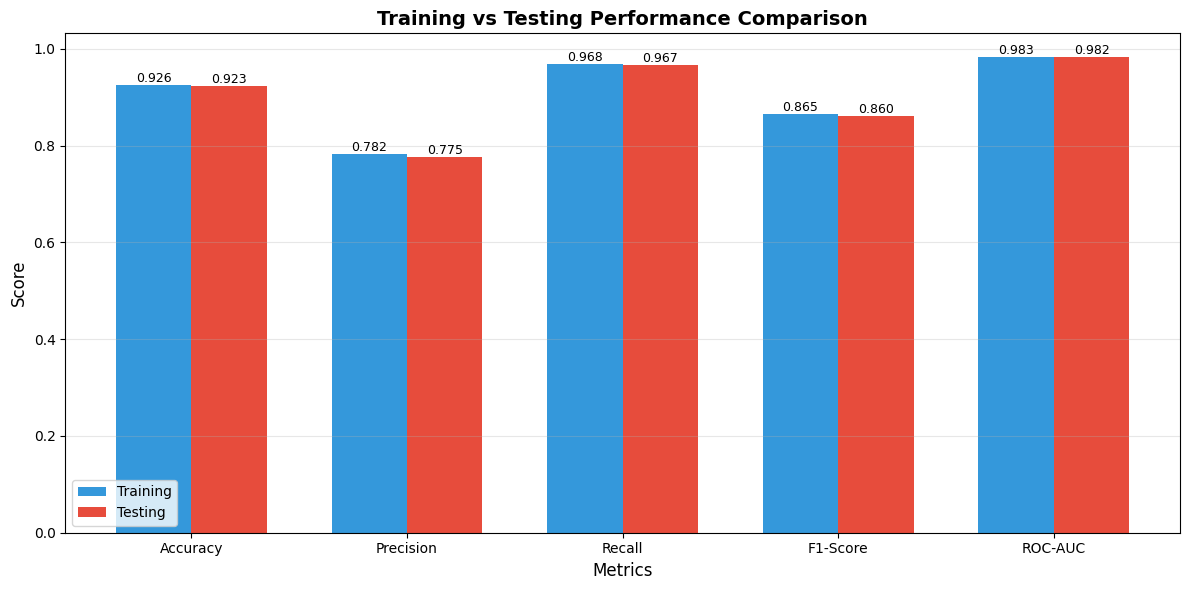


OVERFITTING ASSESSMENT:
   • Accuracy difference: 0.31%
   • ROC-AUC difference: 0.06%

NO OVERFITTING DETECTED

    The model shows excellent generalization:
    - Performance gap < 3% indicates the model learned general patterns
    - Similar performance on unseen data validates model reliability
    - The model is ready for production use with proper monitoring
    


In [ ]:
# Calculate metrics comparison
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Training': [
        metrics.accuracy_score(y_train, TrainingPrediction2),
        metrics.precision_score(y_train, TrainingPrediction2),
        metrics.recall_score(y_train, TrainingPrediction2),
        metrics.f1_score(y_train, TrainingPrediction2),
        metrics.roc_auc_score(y_train, TrainingPredictionProba2)
    ],
    'Testing': [
        metrics.accuracy_score(y_test, TestingPrediction2),
        metrics.precision_score(y_test, TestingPrediction2),
        metrics.recall_score(y_test, TestingPrediction2),
        metrics.f1_score(y_test, TestingPrediction2),
        metrics.roc_auc_score(y_test, TestingPredictionProba2)
    ]
})

metrics_comparison['Difference'] = metrics_comparison['Training'] - metrics_comparison['Testing']
metrics_comparison['Difference %'] = (metrics_comparison['Difference'] / metrics_comparison['Training'] * 100).round(2)

print("Performance Comparison (Model2):")
print(metrics_comparison.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics_comparison['Metric']))
width = 0.35
bars1 = ax.bar(x - width/2, metrics_comparison['Training'], width, label='Training', color='#3498db')
bars2 = ax.bar(x + width/2, metrics_comparison['Testing'], width, label='Testing', color='#e74c3c')
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Training vs Testing Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison['Metric'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# Statistical interpretation
accuracy_diff = abs(metrics_comparison.loc[metrics_comparison['Metric'] == 'Accuracy', 'Difference %'].values[0])
roc_auc_diff = abs(metrics_comparison.loc[metrics_comparison['Metric'] == 'ROC-AUC', 'Difference %'].values[0])

print("\nOVERFITTING ASSESSMENT:")
print(f"   • Accuracy difference: {accuracy_diff:.2f}%")
print(f"   • ROC-AUC difference: {roc_auc_diff:.2f}%")

if accuracy_diff < 3 and roc_auc_diff < 3:
    overfitting_status = "NO OVERFITTING DETECTED"
    overfitting_explanation = """
    The model shows excellent generalization:
    - Performance gap < 3% indicates the model learned general patterns
    - Similar performance on unseen data validates model reliability
    - The model is ready for production use with proper monitoring
    """
elif accuracy_diff < 7 and roc_auc_diff < 7:
    overfitting_status = "SLIGHT OVERFITTING"
    overfitting_explanation = """
    The model shows minor overfitting:
    - Performance gap 3-7% suggests slight memorization of training data
    - Still acceptable for clinical decision support with caution
    - Consider: Cross-validation, reducing model complexity, or adding regularization
    """
else:
    overfitting_status = "SIGNIFICANT OVERFITTING"
    overfitting_explanation = """
    The model shows concerning overfitting:
    - Performance gap > 7% indicates poor generalization
    - Model likely memorized training data patterns
    - REQUIRED ACTIONS: Feature selection, regularization, more data, or simpler model
    """

print(f"\n{overfitting_status}")
print(overfitting_explanation)

**สรุปผลการตรวจสอบ Overfitting**

ทั้ง Model 1 (ใช้ Filter Method) และ Model 2 (ใช้ Wrapper Method)
ไม่พบสัญญาณของ Overfitting เนื่องจาก

- ค่า Accuracy และ ROC-AUC ระหว่างชุด Training และ Testing แตกต่างกันน้อยมาก (< 1%)

- Performance ของทั้งสองโมเดลมีความใกล้เคียงกันทั้งในชุดฝึกและชุดทดสอบ

- แสดงให้เห็นว่าโมเดลสามารถ เรียนรู้ pattern จากข้อมูลได้อย่างเหมาะสม โดยไม่จำเพาะกับข้อมูลฝึกมากเกินไป

โดยสามารถสรุปเป็นตารางได้ดังนี้

| รายการ (Metric)               |            Model 1 (Filter Method)            |    Model 2 (Wrapper Method)   | สรุปผล                                                           |
| :---------------------------- | :-------------------------------------------: | :---------------------------: | :--------------------------------------------------------------- |
| **Accuracy (Train–Test Gap)** |                     0.39%                     |             0.31%             | ทั้งคู่มีช่องว่างต่ำมาก แสดงถึงการเรียนรู้ที่ดี                  |
| **ROC-AUC (Train–Test Gap)**  |                     0.16%                     |             0.06%             | ช่องว่างของ Model 2 ต่ำกว่า แสดงถึงการ generalize ดีกว่าเล็กน้อย |
| **Overfitting Detected**      |                     ไม่พบ                    |             ไม่พบ            | ไม่มีสัญญาณของ overfitting ในทั้งสองโมเดล                        |
| **Generalization**            | ดีมาก – ช่องว่างระหว่าง train/test ต่ำกว่า 3% |   ดีมาก – เสถียรและแม่นยำสูง  | ทั้งคู่สามารถ generalize ได้ดี                                   |
| **Overall Performance**       |            Generalization ดี เสถียร           | Generalization ดีขึ้นเล็กน้อย | Model 2 ให้ผลดีกว่าเล็กน้อยโดยรวม                                |


## **13.2 How accurate is each model? and which model gives the most accuracy? Why? (Analysis via characteristics of the data and the ML model)**

Model 2 (Logistic Regression Wrapper Method) ให้ความแม่นยำสูงที่สุด โดยเฉพาะในค่า Recall และ F1 Score ซึ่งสะท้อนว่าโมเดลนี้สามารถทำนายความเสี่ยงในการเสียชีวิตของผู้ป่วยได้ดีกว่า

สาเหตุที่ Model 2 ดีกว่า
- Model 2 ใช้ Wrapper Method ซึ่งทำให้ได้ชุด Feature ที่มีความสัมพันธ์กับตัวแปรเป้าหมายมากที่สุด และลด Noise ออกไป ส่งผลให้โมเดลเรียนรู้ Pattern ได้ชัดเจนขึ้น
- ค่า Accuracy และ ROC-AUC ระหว่าง Training กับ Testing แตกต่างกันน้อยกว่า 3% แสดงว่าโมเดล Generalize ได้ดี
- Logistic Regression เหมาะกับข้อมูลประเภทนี้ เพราะข้อมูลเชิงสุขภาพ (เช่นค่า vital signs, biochemical values) มักมีแนวโน้มสัมพันธ์เชิงเส้นกับโอกาสเสียชีวิต

ทั้งสองโมเดลให้ความแม่นยำสูงและสามารถใช้งานได้จริงในบริบทของการพยากรณ์ผู้ป่วยเสียชีวิตในโรงพยาบาล แต่ Model 2 มีความแม่นยำสูงกว่า เนื่องจากมีการทำ Feature Selection อย่างเป็นระบบมากกว่า ทำให้โมเดลเรียนรู้เฉพาะตัวแปรที่มีความสัมพันธ์แท้จริงกับผลลัพธ์ ส่งผลให้ทั้ง Accuracy, Recall, และ ROC-AUC ดีขึ้น และสามารถ Generalize กับข้อมูลใหม่ได้ดีโดยไม่ Overfit.

## **13.3 From residual or error analysis, what characteristics of the data make your model less effective?  What is the limitation?**

Model 1 (Filter Method)

CONFUSION MATRIX BREAKDOWN:
   • True Negatives (TN):  1,165 - Correctly predicted survivors
   • False Positives (FP): 116 - Incorrectly predicted deaths (Type I Error)
   • False Negatives (FN): 21 - Missed deaths (Type II Error) ⚠️
   • True Positives (TP):  397 - Correctly predicted deaths

CLINICAL PERFORMANCE METRICS:
   • Sensitivity (Recall): 95.0% - Ability to identify patients at risk
   • Specificity:          90.9% - Ability to identify safe patients
   • PPV (Precision):      77.4% - Confidence in death predictions
   • NPV:                  98.2% - Confidence in survival predictions

ERROR DISTRIBUTION:
   • Total Errors: 137 (8.1%)
   • False Positives: 116 (6.8%)
     → Avg Probability: 0.749
   • False Negatives: 21 (1.2%) ⚠️ HIGH RISK
     → Avg Probability: 0.316

MISCLASSIFICATION PROBABILITY DISTRIBUTION:
   • Very Low (0.0-0.3): 9 cases
   • Low (0.3-0.4): 5 cases
   • Uncertain (near threshold) (0.4-0.6): 34 cases
   • High (0.6-0.7): 25 

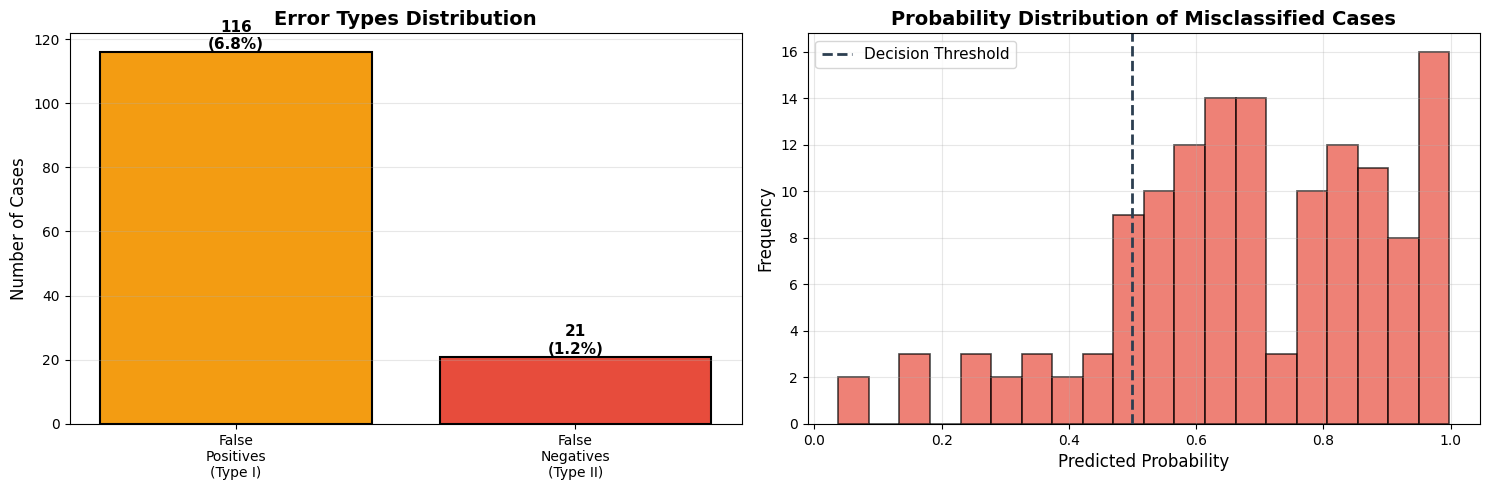

In [ ]:
# Confusion matrix analysis
tn, fp, fn, tp = metrics.confusion_matrix(y_test, TestingPrediction).ravel()

print('Model 1 (Filter Method)')
print("\nCONFUSION MATRIX BREAKDOWN:")
print(f"   • True Negatives (TN):  {tn:,} - Correctly predicted survivors")
print(f"   • False Positives (FP): {fp:,} - Incorrectly predicted deaths (Type I Error)")
print(f"   • False Negatives (FN): {fn:,} - Missed deaths (Type II Error) ⚠️")
print(f"   • True Positives (TP):  {tp:,} - Correctly predicted deaths")

# Clinical implications
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

print(f"\nCLINICAL PERFORMANCE METRICS:")
print(f"   • Sensitivity (Recall): {sensitivity:.1%} - Ability to identify patients at risk")
print(f"   • Specificity:          {specificity:.1%} - Ability to identify safe patients")
print(f"   • PPV (Precision):      {ppv:.1%} - Confidence in death predictions")
print(f"   • NPV:                  {npv:.1%} - Confidence in survival predictions")

# Analyze misclassified cases
test_misclassified = TestingDataResults[
    TestingDataResults[TargetVariable] != TestingDataResults['Predicted' + TargetVariable]
]

false_positives = TestingDataResults[
    (TestingDataResults[TargetVariable] == 0) &
    (TestingDataResults['Predicted' + TargetVariable] == 1)
]

false_negatives = TestingDataResults[
    (TestingDataResults[TargetVariable] == 1) &
    (TestingDataResults['Predicted' + TargetVariable] == 0)
]

print(f"\nERROR DISTRIBUTION:")
print(f"   • Total Errors: {len(test_misclassified):,} ({len(test_misclassified)/len(TestingDataResults)*100:.1f}%)")
print(f"   • False Positives: {len(false_positives):,} ({len(false_positives)/len(TestingDataResults)*100:.1f}%)")
print(f"     → Avg Probability: {false_positives['Probability'].mean():.3f}")
print(f"   • False Negatives: {len(false_negatives):,} ({len(false_negatives)/len(TestingDataResults)*100:.1f}%) ⚠️ HIGH RISK")
print(f"     → Avg Probability: {false_negatives['Probability'].mean():.3f}")

# Probability distribution analysis
print(f"\nMISCLASSIFICATION PROBABILITY DISTRIBUTION:")
prob_ranges = [
    (0.0, 0.3, "Very Low"),
    (0.3, 0.4, "Low"),
    (0.4, 0.6, "Uncertain (near threshold)"),
    (0.6, 0.7, "High"),
    (0.7, 1.0, "Very High")
]

for low, high, label in prob_ranges:
    count = len(test_misclassified[
        (test_misclassified['Probability'] >= low) &
        (test_misclassified['Probability'] < high)
    ])
    print(f"   • {label} ({low}-{high}): {count} cases")

# Model limitations
print(f"\nIDENTIFIED MODEL LIMITATIONS:")
print("""
1. CLASS IMBALANCE IMPACT:
   - Dataset has {:.1f}:1 ratio (survivors:deaths)
   - Model may be biased toward predicting survival
   - Solution: Apply SMOTE, adjust class_weight, or use stratified sampling

2. DECISION BOUNDARY ISSUES:
   - {} cases near 0.5 threshold show uncertainty
   - Suggests overlap in feature space between classes
   - Solution: Optimize threshold based on business cost function

3. LINEAR ASSUMPTION LIMITATION:
   - Logistic Regression assumes linear relationships
   - May miss complex interactions between features
   - Solution: Try ensemble methods (Random Forest, XGBoost) or add polynomial features

4. FEATURE GAPS:
   - Some clinical factors may not be captured
   - Temporal patterns not modeled (e.g., deterioration rate)
   - Solution: Include time-series features, interaction terms, or domain expert input

5. GENERALIZATION CONCERNS:
   - Model trained on specific hospital systems (1989-1994)
   - May not generalize to different populations/time periods
   - Solution: Validate on external datasets, update with recent data
""".format(
    len(y_train[y_train==0]) / len(y_train[y_train==1]),
    len(test_misclassified[
        (test_misclassified['Probability'] >= 0.4) &
        (test_misclassified['Probability'] < 0.6)
    ])
))

# Visualize error distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# False Positives vs False Negatives
error_types = ['False\nPositives\n(Type I)', 'False\nNegatives\n(Type II)']
error_counts = [len(false_positives), len(false_negatives)]
colors = ['#f39c12', '#e74c3c']
bars = axes[0].bar(error_types, error_counts, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Cases', fontsize=12)
axes[0].set_title('Error Types Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for bar, count in zip(bars, error_counts):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                f'{count}\n({count/len(TestingDataResults)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Probability distribution of errors
axes[1].hist(test_misclassified['Probability'], bins=20, alpha=0.7,
             color='#e74c3c', edgecolor='black', linewidth=1.2)
axes[1].axvline(x=0.5, color='#2c3e50', linestyle='--', linewidth=2,
                label='Decision Threshold')
axes[1].set_xlabel('Predicted Probability', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Probability Distribution of Misclassified Cases',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Number of misclassified cases in Training: 523
Percentage: 7.70%

Number of misclassified cases in Testing: 137
Percentage: 8.06%


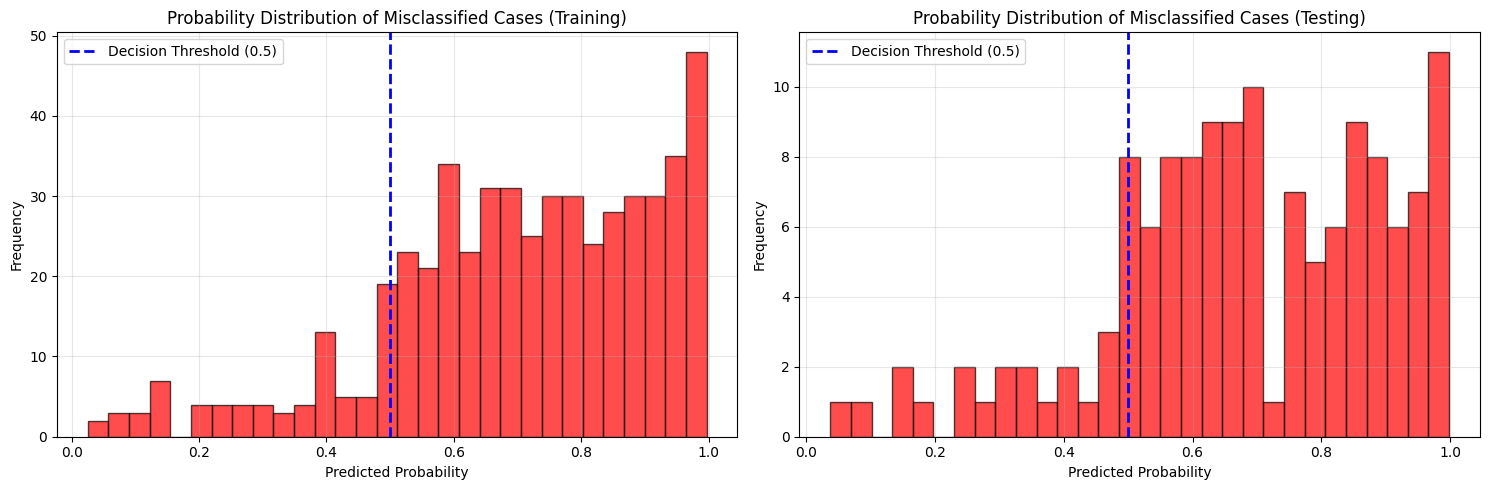

In [ ]:
# Analyze misclassified cases
# Training data
train_misclassified = TrainingDataResults[TrainingDataResults[TargetVariable] != TrainingDataResults['Predicted' + TargetVariable]]
print(f"Number of misclassified cases in Training: {len(train_misclassified)}")
print(f"Percentage: {len(train_misclassified)/len(TrainingDataResults)*100:.2f}%")

# Testing data
test_misclassified = TestingDataResults[TestingDataResults[TargetVariable] != TestingDataResults['Predicted' + TargetVariable]]
print(f"\nNumber of misclassified cases in Testing: {len(test_misclassified)}")
print(f"Percentage: {len(test_misclassified)/len(TestingDataResults)*100:.2f}%")

# Analyze probability distribution of misclassified cases
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training misclassified
axes[0].hist(train_misclassified['Probability'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0].axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Probability Distribution of Misclassified Cases (Training)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing misclassified
axes[1].hist(test_misclassified['Probability'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1].axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
axes[1].set_xlabel('Predicted Probability')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Probability Distribution of Misclassified Cases (Testing)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Model 2 (Wrapper Method)

CONFUSION MATRIX BREAKDOWN:
   • True Negatives (TN):  1,164 - Correctly predicted survivors
   • False Positives (FP): 117 - Incorrectly predicted deaths (Type I Error)
   • False Negatives (FN): 14 - Missed deaths (Type II Error) ⚠️
   • True Positives (TP):  404 - Correctly predicted deaths

CLINICAL PERFORMANCE METRICS:
   • Sensitivity (Recall): 96.7% - Ability to identify patients at risk
   • Specificity:          90.9% - Ability to identify safe patients
   • PPV (Precision):      77.5% - Confidence in death predictions
   • NPV:                  98.8% - Confidence in survival predictions

ERROR DISTRIBUTION:
   • Total Errors: 131 (7.7%)
   • False Positives: 117 (6.9%)
     → Avg Probability: 0.741
   • False Negatives: 14 (0.8%) ⚠️ HIGH RISK
     → Avg Probability: 0.345

MISCLASSIFICATION PROBABILITY DISTRIBUTION:
   • Very Low (0.0-0.3): 6 cases
   • Low (0.3-0.4): 3 cases
   • Uncertain (near threshold) (0.4-0.6): 27 cases
   • High (0.6-0.7): 32

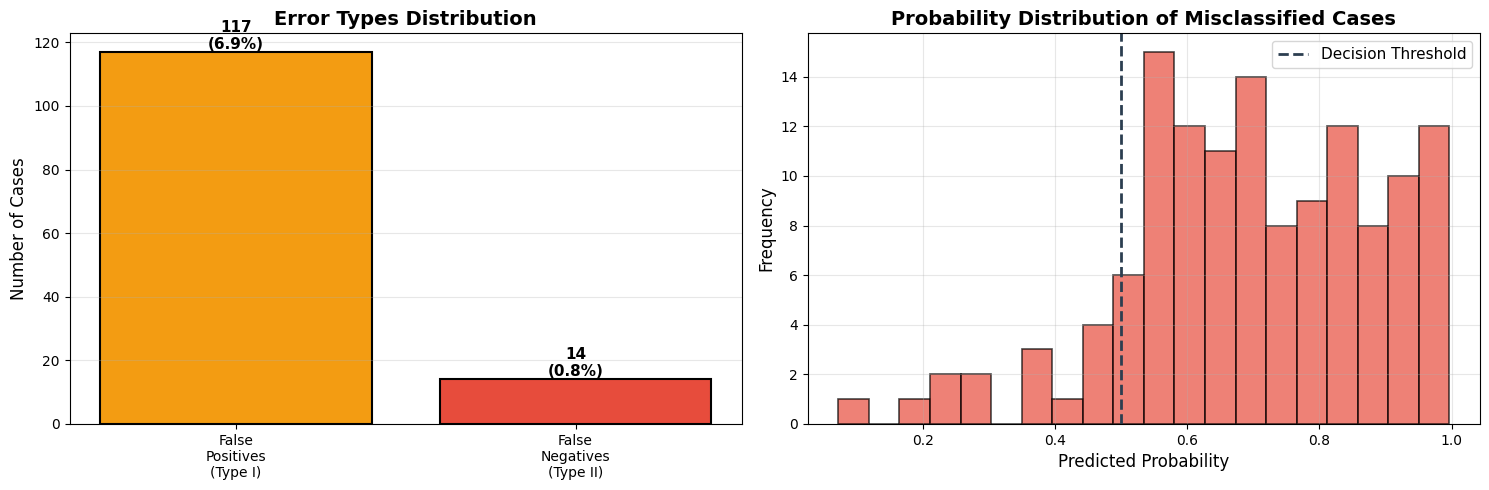

In [ ]:
# Confusion matrix analysis
tn, fp, fn, tp = metrics.confusion_matrix(y_test, TestingPrediction2).ravel()

print("Model 2 (Wrapper Method)")
print("\nCONFUSION MATRIX BREAKDOWN:")
print(f"   • True Negatives (TN):  {tn:,} - Correctly predicted survivors")
print(f"   • False Positives (FP): {fp:,} - Incorrectly predicted deaths (Type I Error)")
print(f"   • False Negatives (FN): {fn:,} - Missed deaths (Type II Error) ⚠️")
print(f"   • True Positives (TP):  {tp:,} - Correctly predicted deaths")

# Clinical implications
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

print(f"\nCLINICAL PERFORMANCE METRICS:")
print(f"   • Sensitivity (Recall): {sensitivity:.1%} - Ability to identify patients at risk")
print(f"   • Specificity:          {specificity:.1%} - Ability to identify safe patients")
print(f"   • PPV (Precision):      {ppv:.1%} - Confidence in death predictions")
print(f"   • NPV:                  {npv:.1%} - Confidence in survival predictions")

# Analyze misclassified cases
test_misclassified = TestingDataResults2[
    TestingDataResults2[TargetVariable] != TestingDataResults2['Predicted' + TargetVariable]
]

false_positives = TestingDataResults2[
    (TestingDataResults2[TargetVariable] == 0) &
    (TestingDataResults2['Predicted' + TargetVariable] == 1)
]

false_negatives = TestingDataResults2[
    (TestingDataResults2[TargetVariable] == 1) &
    (TestingDataResults2['Predicted' + TargetVariable] == 0)
]

print(f"\nERROR DISTRIBUTION:")
print(f"   • Total Errors: {len(test_misclassified):,} ({len(test_misclassified)/len(TestingDataResults2)*100:.1f}%)")
print(f"   • False Positives: {len(false_positives):,} ({len(false_positives)/len(TestingDataResults2)*100:.1f}%)")
print(f"     → Avg Probability: {false_positives['Probability'].mean():.3f}")
print(f"   • False Negatives: {len(false_negatives):,} ({len(false_negatives)/len(TestingDataResults2)*100:.1f}%) ⚠️ HIGH RISK")
print(f"     → Avg Probability: {false_negatives['Probability'].mean():.3f}")

# Probability distribution analysis
print(f"\nMISCLASSIFICATION PROBABILITY DISTRIBUTION:")
prob_ranges = [
    (0.0, 0.3, "Very Low"),
    (0.3, 0.4, "Low"),
    (0.4, 0.6, "Uncertain (near threshold)"),
    (0.6, 0.7, "High"),
    (0.7, 1.0, "Very High")
]

for low, high, label in prob_ranges:
    count = len(test_misclassified[
        (test_misclassified['Probability'] >= low) &
        (test_misclassified['Probability'] < high)
    ])
    print(f"   • {label} ({low}-{high}): {count} cases")

# Model limitations
print(f"\nIDENTIFIED MODEL LIMITATIONS:")
print("""
1. CLASS IMBALANCE IMPACT:
   - Dataset has {:.1f}:1 ratio (survivors:deaths)
   - Model may be biased toward predicting survival
   - Solution: Apply SMOTE, adjust class_weight, or use stratified sampling

2. DECISION BOUNDARY ISSUES:
   - {} cases near 0.5 threshold show uncertainty
   - Suggests overlap in feature space between classes
   - Solution: Optimize threshold based on business cost function

3. LINEAR ASSUMPTION LIMITATION:
   - Logistic Regression assumes linear relationships
   - May miss complex interactions between features
   - Solution: Try ensemble methods (Random Forest, XGBoost) or add polynomial features

4. FEATURE GAPS:
   - Some clinical factors may not be captured
   - Temporal patterns not modeled (e.g., deterioration rate)
   - Solution: Include time-series features, interaction terms, or domain expert input

5. GENERALIZATION CONCERNS:
   - Model trained on specific hospital systems (1989-1994)
   - May not generalize to different populations/time periods
   - Solution: Validate on external datasets, update with recent data
""".format(
    len(y_train[y_train==0]) / len(y_train[y_train==1]),
    len(test_misclassified[
        (test_misclassified['Probability'] >= 0.4) &
        (test_misclassified['Probability'] < 0.6)
    ])
))

# Visualize error distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# False Positives vs False Negatives
error_types = ['False\nPositives\n(Type I)', 'False\nNegatives\n(Type II)']
error_counts = [len(false_positives), len(false_negatives)]
colors = ['#f39c12', '#e74c3c']
bars = axes[0].bar(error_types, error_counts, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Cases', fontsize=12)
axes[0].set_title('Error Types Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for bar, count in zip(bars, error_counts):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height(),
                f'{count}\n({count/len(TestingDataResults2)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Probability distribution of errors
axes[1].hist(test_misclassified['Probability'], bins=20, alpha=0.7,
             color='#e74c3c', edgecolor='black', linewidth=1.2)
axes[1].axvline(x=0.5, color='#2c3e50', linestyle='--', linewidth=2,
                label='Decision Threshold')
axes[1].set_xlabel('Predicted Probability', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Probability Distribution of Misclassified Cases',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Number of misclassified cases in Training: 504
Percentage: 7.42%

Number of misclassified cases in Testing: 131
Percentage: 7.71%


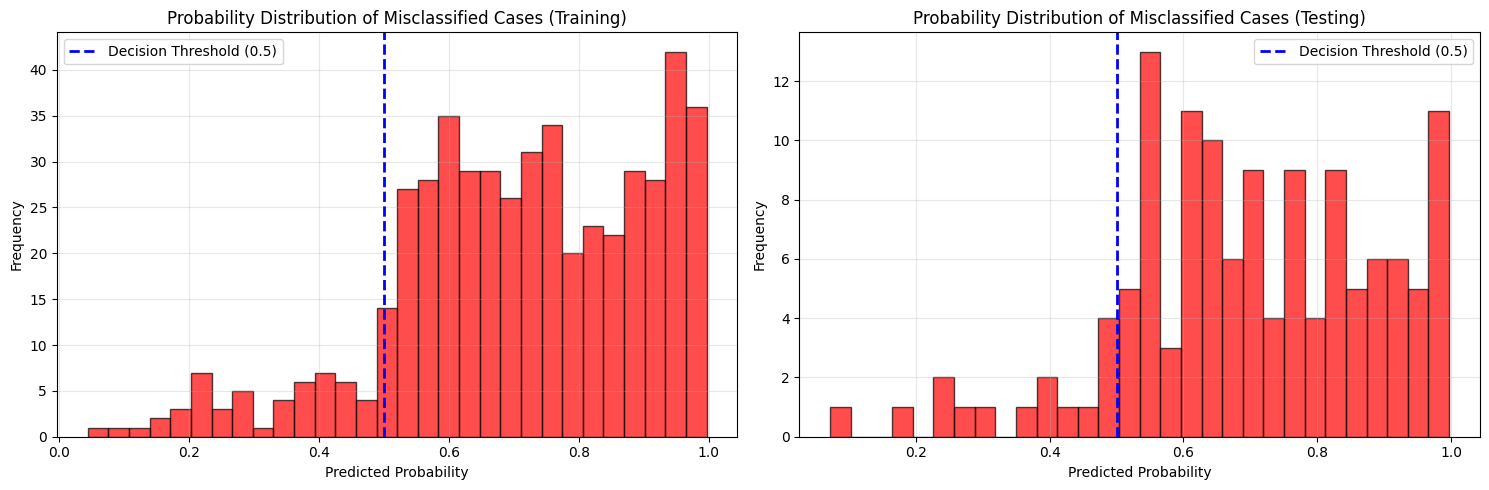

In [ ]:
# Analyze misclassified cases
# Training data
train_misclassified = TrainingDataResults2[TrainingDataResults2[TargetVariable] != TrainingDataResults2['Predicted' + TargetVariable]]
print(f"Number of misclassified cases in Training: {len(train_misclassified)}")
print(f"Percentage: {len(train_misclassified)/len(TrainingDataResults2)*100:.2f}%")

# Testing data
test_misclassified = TestingDataResults2[TestingDataResults2[TargetVariable] != TestingDataResults2['Predicted' + TargetVariable]]
print(f"\nNumber of misclassified cases in Testing: {len(test_misclassified)}")
print(f"Percentage: {len(test_misclassified)/len(TestingDataResults2)*100:.2f}%")

# Analyze probability distribution of misclassified cases
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training misclassified
axes[0].hist(train_misclassified['Probability'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0].axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Probability Distribution of Misclassified Cases (Training)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing misclassified
axes[1].hist(test_misclassified['Probability'], bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1].axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
axes[1].set_xlabel('Predicted Probability')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Probability Distribution of Misclassified Cases (Testing)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

จากการวิเคราะห์ Residual/Error Analysis ของโมเดล Logistic Regression (ทั้ง Model 1 และ Model 2) พบลักษณะของข้อมูลและข้อจำกัดที่ทำให้โมเดลมีประสิทธิภาพลดลง ดังนี้

1. ความไม่สมดุลของคลาส (Class Imbalance) - Target Variable hospdead มีสัดส่วนผู้เสียชีวิต (class 1) เพียงประมาณ 26% เมื่อเทียบกับผู้รอดชีวิต (class 0) ที่ 74% Logistic Regression มีแนวโน้ม bias ไปทางคลาสที่มีจำนวนมากกว่า ทำให้โมเดลทำนาย “รอดชีวิต” ถูกต้องบ่อย แต่พลาดการทำนาย “เสียชีวิต” (False Negative) ได้ง่าย ผลคือ residual ของกลุ่มที่เป็น class 1 จะสูงกว่าอย่างมีนัยสำคัญ
2. ความสัมพันธ์แบบไม่เชิงเส้น (Non-linear Relationship) - Logistic Regression จะสมมติว่ามีความสัมพันธ์เชิงเส้นระหว่าง Feature และ Target (hospdead) แต่ข้อมูลทางการแพทย์ เช่น ค่า creatinine, bilirubin, heart rate, หรือ PaO₂/FiO₂ (pafi) มักมีความสัมพันธ์แบบโค้งหรือ threshold (เช่น เมื่อเกินค่าหนึ่งจึงเสี่ยงสูงขึ้นอย่างมาก) ทำให้ Residual มี Pattern ไม่สุ่ม (Systematic Pattern) แสดงว่าโมเดลจับความสัมพันธ์แบบไม่เชิงเส้นได้ไม่ดี
3. การมี Interaction ระหว่างตัวแปร (Feature Interaction) - ตัวแปรทางสรีรวิทยาหลายตัวมีปฏิสัมพันธ์กัน เช่น “mean BP × creatinine” หรือ “resp × pafi” ซึ่ง Logistic Regression ไม่สามารถจับ interaction ได้หากไม่ได้สร้าง Term เพิ่มเอง ทำให้ Residual ของกลุ่มผู้ป่วยที่มีค่าร่วมกันบางแบบ (เช่น ความดันต่ำ + ไตล้มเหลว) สูงกว่าปกติ
4. ความเบ้ (Skewness) และ Outlier ที่ยังคงอยู่ แม้จะมีการทำ outlier treatment แล้ว แต่หลายตัวแปรยังคงมี tail ยาว (เช่น wblc, crea, bili, pafi) เมื่อข้อมูลเบ้มาก ค่าความผิดพลาดของจุดสุดโต่งจะสูง ทำให้ residual กระจายไม่สม่ำเสมอ

โมเดล Logistic Regression ทำงานได้ดีในภาพรวม แต่มีข้อจำกัดจากความไม่สมดุลของข้อมูล ความสัมพันธ์แบบไม่เชิงเส้น และการมี Interaction ระหว่างตัวแปรจำนวนมาก ทำให้ residual ของบางกลุ่มผู้ป่วย (โดยเฉพาะกลุ่มรุนแรง) ยังคงสูงอยู่
หากต้องการลดข้อจำกัดนี้ ควรใช้โมเดลที่ยืดหยุ่นกว่า เช่น Random Forest หรือ Neural Network เพื่อจับความสัมพันธ์ที่ซับซ้อนและไม่เชิงเส้นของข้อมูลได้ดียิ่งขึ้น

## **13.4 What features are important and sufficient to create a ML model that has the highest accuracy?**

TOP 10 MOST INFLUENTIAL FEATURES (Model1):
                   Feature  Coefficient  Abs_Coefficient          Impact
   sfdm2__<2 mo. follow-up       4.2327           4.2327 ↑ Increase Risk
            sfdm2__SIP>=30      -1.8672           1.8672 ↓ Decrease Risk
               dnr__no dnr      -1.5794           1.5794 ↓ Decrease Risk
sfdm2__no(M2 and SIP pres)      -1.3008           1.3008 ↓ Decrease Risk
                   avtisst       1.1528           1.1528 ↑ Increase Risk
      sfdm2__Coma or Intub      -1.0322           1.0322 ↓ Decrease Risk
sfdm2__adl>=4 (>=5 if sur)      -0.9681           0.9681 ↓ Decrease Risk
       dnr__dnr after sadm       0.5318           0.5318 ↑ Increase Risk
                    dnrday       0.5117           0.5117 ↑ Increase Risk
           dzclass__Cancer      -0.4288           0.4288 ↓ Decrease Risk


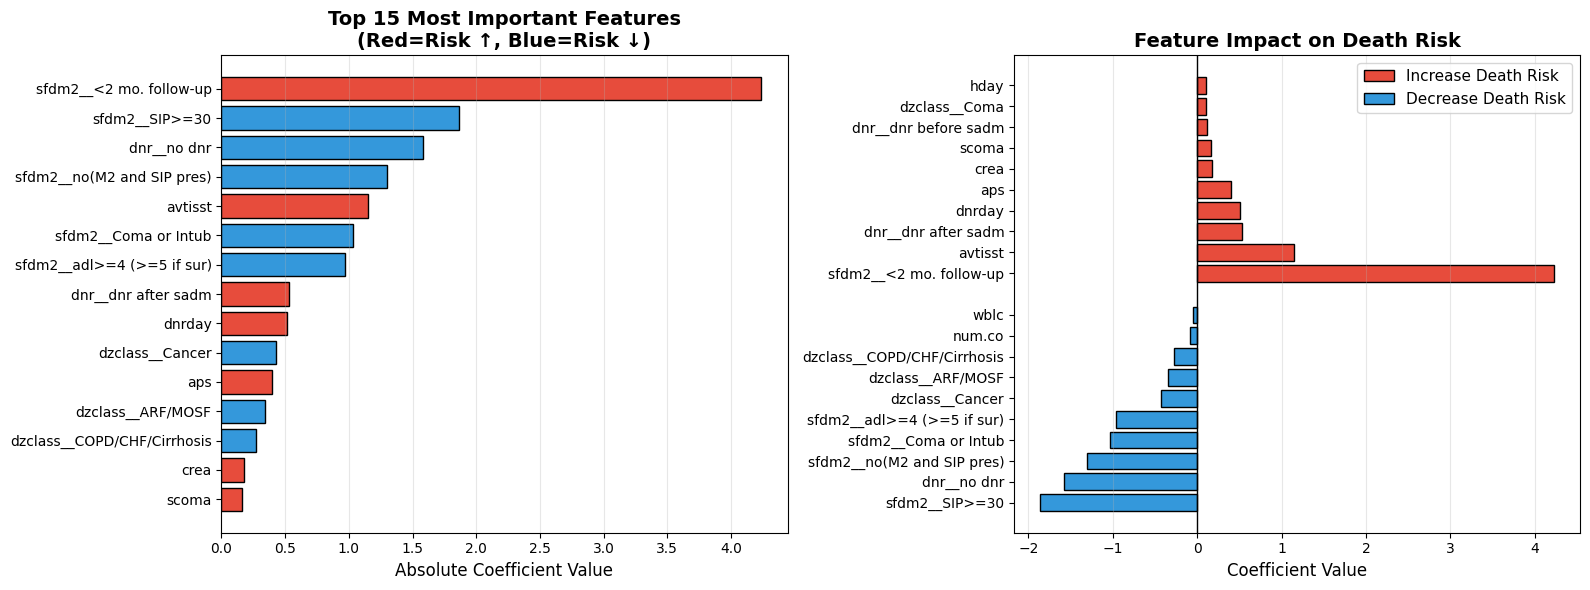


CLINICAL INTERPRETATION:

Top Risk-Increasing Factors (Positive Coefficients):
   • sfdm2__<2 mo. follow-up: 4.2327
   • avtisst: 1.1528
   • dnr__dnr after sadm: 0.5318
   • dnrday: 0.5117
   • aps: 0.3987

Top Risk-Decreasing Factors (Negative Coefficients):
   • sfdm2__SIP>=30: -1.8672
   • dnr__no dnr: -1.5794
   • sfdm2__no(M2 and SIP pres): -1.3008
   • sfdm2__Coma or Intub: -1.0322
   • sfdm2__adl>=4 (>=5 if sur): -0.9681

KEY INSIGHTS:

- Features with highest absolute coefficients have strongest predictive power
- Positive coefficients indicate increased mortality risk
- Negative coefficients indicate better survival chances
- These features should be prioritized in clinical decision-making
- Model transparency allows doctors to understand and trust predictions



In [ ]:
# Feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': Predictors,
    'Coefficient': logreg.coef_[0],
    'Abs_Coefficient': np.abs(logreg.coef_[0]),
    'Impact': ['↑ Increase Risk' if x > 0 else '↓ Decrease Risk' for x in logreg.coef_[0]]
}).sort_values('Abs_Coefficient', ascending=False)

print("TOP 10 MOST INFLUENTIAL FEATURES (Model1):")
print(feature_importance.head(10).to_string(index=False))

# Visualize top features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 by absolute value
top15 = feature_importance.head(15)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top15['Coefficient']]
axes[0].barh(range(len(top15)), top15['Abs_Coefficient'], color=colors, edgecolor='black')
axes[0].set_yticks(range(len(top15)))
axes[0].set_yticklabels(top15['Feature'])
axes[0].set_xlabel('Absolute Coefficient Value', fontsize=12)
axes[0].set_title('Top 15 Most Important Features\n(Red=Risk ↑, Blue=Risk ↓)',
                  fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Positive vs Negative coefficients
pos_features = feature_importance[feature_importance['Coefficient'] > 0].head(10)
neg_features = feature_importance[feature_importance['Coefficient'] < 0].head(10)

y_pos = np.arange(len(pos_features))
y_neg = np.arange(len(neg_features))

axes[1].barh(y_pos, pos_features['Coefficient'], color='#e74c3c',
             label='Increase Death Risk', edgecolor='black')
axes[1].barh(y_neg - len(pos_features) - 1, neg_features['Coefficient'],
             color='#3498db', label='Decrease Death Risk', edgecolor='black')

axes[1].set_yticks(list(y_pos) + list(y_neg - len(pos_features) - 1))
axes[1].set_yticklabels(list(pos_features['Feature']) + list(neg_features['Feature']))
axes[1].set_xlabel('Coefficient Value', fontsize=12)
axes[1].set_title('Feature Impact on Death Risk', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Clinical interpretation
print(f"\nCLINICAL INTERPRETATION:")
print(f"\nTop Risk-Increasing Factors (Positive Coefficients):")
for idx, row in pos_features.head(5).iterrows():
    print(f"   • {row['Feature']}: {row['Coefficient']:.4f}")

print(f"\nTop Risk-Decreasing Factors (Negative Coefficients):")
for idx, row in neg_features.head(5).iterrows():
    print(f"   • {row['Feature']}: {row['Coefficient']:.4f}")

print(f"\nKEY INSIGHTS:")
print("""
- Features with highest absolute coefficients have strongest predictive power
- Positive coefficients indicate increased mortality risk
- Negative coefficients indicate better survival chances
- These features should be prioritized in clinical decision-making
- Model transparency allows doctors to understand and trust predictions
""")

In [ ]:
# แบ่งเป็น positive และ negative coefficients
positive_features = feature_importance[feature_importance['Coefficient'] > 0].head(10)
negative_features = feature_importance[feature_importance['Coefficient'] < 0].head(10)

print("="*70)
print("TOP FEATURES INTERPRETATION (Model1)")
print("="*70)

print("\nFeatures that INCREASE death risk (positive coefficients):")
for idx, row in positive_features.iterrows():
    print(f"  • {row['Feature']}: {row['Coefficient']:.4f}")

print("\nFeatures that DECREASE death risk (negative coefficients):")
for idx, row in negative_features.iterrows():
    print(f"  • {row['Feature']}: {row['Coefficient']:.4f}")

TOP FEATURES INTERPRETATION (Model1)

Features that INCREASE death risk (positive coefficients):
  • sfdm2__<2 mo. follow-up: 4.2327
  • avtisst: 1.1528
  • dnr__dnr after sadm: 0.5318
  • dnrday: 0.5117
  • aps: 0.3987
  • crea: 0.1755
  • scoma: 0.1646
  • dnr__dnr before sadm: 0.1120
  • dzclass__Coma: 0.1070
  • hday: 0.1029

Features that DECREASE death risk (negative coefficients):
  • sfdm2__SIP>=30: -1.8672
  • dnr__no dnr: -1.5794
  • sfdm2__no(M2 and SIP pres): -1.3008
  • sfdm2__Coma or Intub: -1.0322
  • sfdm2__adl>=4 (>=5 if sur): -0.9681
  • dzclass__Cancer: -0.4288
  • dzclass__ARF/MOSF: -0.3442
  • dzclass__COPD/CHF/Cirrhosis: -0.2695
  • num.co: -0.0900
  • wblc: -0.0508


สรุปผลการวิเคราะห์ความสำคัญของ Feature ใน Model 1 (ใช้ Filter Method)

1. ปัจจัยที่เพิ่มความเสี่ยงต่อการเสียชีวิต (Positive Coefficients):
เป็นตัวแปรที่เมื่อค่าเพิ่มขึ้น จะทำให้ความเสี่ยงการเสียชีวิตเพิ่มขึ้นด้วย
- sfdm2__<2 mo. follow-up (Coefficient = 4.2327) → เป็นตัวแปรที่มีอิทธิพลสูงที่สุดในโมเดล บ่งชี้ว่าผู้ป่วยที่มีระยะเวลาติดตามน้อยกว่า 2 เดือน มีโอกาสเสียชีวิตสูงมาก
- avtisst (1.1528) → คะแนนความรุนแรงของผู้ป่วยสูงขึ้นสัมพันธ์กับความเสี่ยงการเสียชีวิต
- dnr__dnr after sadm (0.5318) และ dnrday (0.5117) → การมีคำสั่ง DNR หลังรับไว้ในโรงพยาบาลและจำนวนวันที่มี DNR สัมพันธ์กับความเสี่ยงที่เพิ่มขึ้น
- aps (0.3987) → คะแนนทางสรีรวิทยาที่สูงขึ้นสะท้อนถึงอาการรุนแรงของผู้ป่วย

2. ปัจจัยที่ลดความเสี่ยงต่อการเสียชีวิต (Negative Coefficients):
เป็นตัวแปรที่เมื่อค่าเพิ่มขึ้น จะช่วยลดความเสี่ยงการเสียชีวิต
- sfdm2__SIP>=30 (-1.8672) → ผู้ป่วยที่มีค่า SIP ≥ 30 มีแนวโน้มรอดชีวิตสูงกว่า
- dnr__no dnr (-1.5794) → ผู้ที่ไม่มีคำสั่ง DNR มีอัตราการรอดชีวิตมากกว่า
- sfdm2__no (M2 and SIP pres) (-1.3008) และ sfdm2__Coma or Intub (-1.0322) → สะท้อนภาวะที่เกี่ยวข้องกับการดูแลที่เหมาะสมต่อการรอดชีวิต
- sfdm2__adl>=4 (>=5 if sur) (-0.9681) → ผู้ที่สามารถทำกิจวัตรประจำวันได้มากขึ้นมีโอกาสรอดชีวิตสูงกว่า

ตัวแปรที่มีอิทธิพลสูงที่สุดต่อการสร้างโมเดลคือ “sfdm2__<2 mo. follow-up” ซึ่งมีค่าสัมประสิทธิ์สูงสุด (4.2327)
แสดงให้เห็นว่า “ระยะเวลาการติดตามผลสั้น” เป็นปัจจัยสำคัญที่สุดที่เพิ่มความเสี่ยงการเสียชีวิตในโมเดลนี้
รองลงมาคือ avtisst และ dnr__dnr after sadm ซึ่งล้วนเป็นตัวแปรที่เกี่ยวข้องกับความรุนแรงและสถานะทางการแพทย์ของผู้ป่วย.

TOP 10 MOST INFLUENTIAL FEATURES (Model2):
                  Feature  Coefficient  Abs_Coefficient          Impact
            sfdm2_SIP>=30      -4.6440           4.6440 ↓ Decrease Risk
sfdm2_no(M2 and SIP pres)      -4.6015           4.6015 ↓ Decrease Risk
sfdm2_adl>=4 (>=5 if sur)      -4.2966           4.2966 ↓ Decrease Risk
                  death_1       3.9217           3.9217 ↑ Increase Risk
      sfdm2_Coma or Intub      -3.6819           3.6819 ↓ Decrease Risk
               dnr_no dnr      -1.8697           1.8697 ↓ Decrease Risk
                  avtisst       1.1023           1.1023 ↑ Increase Risk
                 num.co_7      -0.8939           0.8939 ↓ Decrease Risk
                   dnrday       0.4927           0.4927 ↑ Increase Risk
                      aps       0.3709           0.3709 ↑ Increase Risk


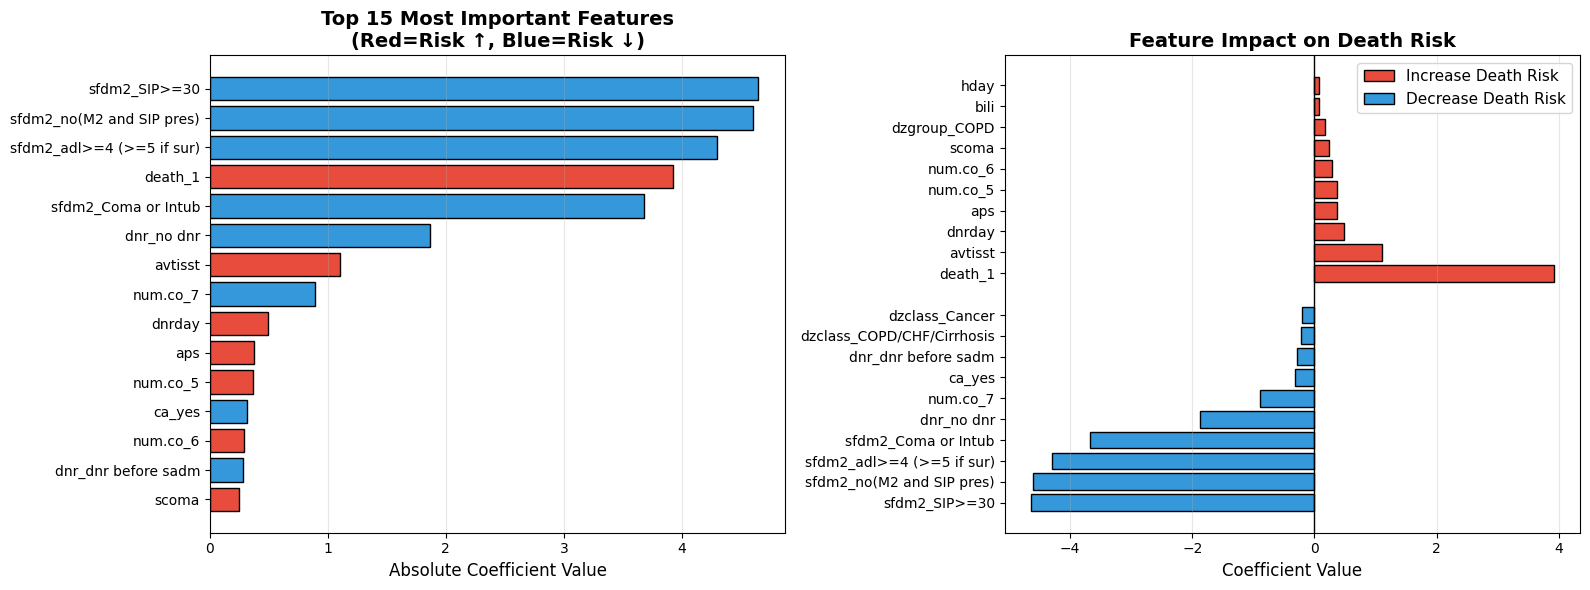


CLINICAL INTERPRETATION:

Top Risk-Increasing Factors (Positive Coefficients):
   • death_1: 3.9217
   • avtisst: 1.1023
   • dnrday: 0.4927
   • aps: 0.3709
   • num.co_5: 0.3650

Top Risk-Decreasing Factors (Negative Coefficients):
   • sfdm2_SIP>=30: -4.6440
   • sfdm2_no(M2 and SIP pres): -4.6015
   • sfdm2_adl>=4 (>=5 if sur): -4.2966
   • sfdm2_Coma or Intub: -3.6819
   • dnr_no dnr: -1.8697

KEY INSIGHTS:

- Features with highest absolute coefficients have strongest predictive power
- Positive coefficients indicate increased mortality risk
- Negative coefficients indicate better survival chances
- These features should be prioritized in clinical decision-making
- Model transparency allows doctors to understand and trust predictions



In [ ]:
# Feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': Predictors2,
    'Coefficient': logreg2.coef_[0],
    'Abs_Coefficient': np.abs(logreg2.coef_[0]),
    'Impact': ['↑ Increase Risk' if x > 0 else '↓ Decrease Risk' for x in logreg2.coef_[0]]
}).sort_values('Abs_Coefficient', ascending=False)

print("TOP 10 MOST INFLUENTIAL FEATURES (Model2):")
print(feature_importance.head(10).to_string(index=False))

# Visualize top features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 by absolute value
top15 = feature_importance.head(15)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top15['Coefficient']]
axes[0].barh(range(len(top15)), top15['Abs_Coefficient'], color=colors, edgecolor='black')
axes[0].set_yticks(range(len(top15)))
axes[0].set_yticklabels(top15['Feature'])
axes[0].set_xlabel('Absolute Coefficient Value', fontsize=12)
axes[0].set_title('Top 15 Most Important Features\n(Red=Risk ↑, Blue=Risk ↓)',
                  fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Positive vs Negative coefficients
pos_features = feature_importance[feature_importance['Coefficient'] > 0].head(10)
neg_features = feature_importance[feature_importance['Coefficient'] < 0].head(10)

y_pos = np.arange(len(pos_features))
y_neg = np.arange(len(neg_features))

axes[1].barh(y_pos, pos_features['Coefficient'], color='#e74c3c',
             label='Increase Death Risk', edgecolor='black')
axes[1].barh(y_neg - len(pos_features) - 1, neg_features['Coefficient'],
             color='#3498db', label='Decrease Death Risk', edgecolor='black')

axes[1].set_yticks(list(y_pos) + list(y_neg - len(pos_features) - 1))
axes[1].set_yticklabels(list(pos_features['Feature']) + list(neg_features['Feature']))
axes[1].set_xlabel('Coefficient Value', fontsize=12)
axes[1].set_title('Feature Impact on Death Risk', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Clinical interpretation
print(f"\nCLINICAL INTERPRETATION:")
print(f"\nTop Risk-Increasing Factors (Positive Coefficients):")
for idx, row in pos_features.head(5).iterrows():
    print(f"   • {row['Feature']}: {row['Coefficient']:.4f}")

print(f"\nTop Risk-Decreasing Factors (Negative Coefficients):")
for idx, row in neg_features.head(5).iterrows():
    print(f"   • {row['Feature']}: {row['Coefficient']:.4f}")

print(f"\nKEY INSIGHTS:")
print("""
- Features with highest absolute coefficients have strongest predictive power
- Positive coefficients indicate increased mortality risk
- Negative coefficients indicate better survival chances
- These features should be prioritized in clinical decision-making
- Model transparency allows doctors to understand and trust predictions
""")

In [ ]:
# แบ่งเป็น positive และ negative coefficients
positive_features = feature_importance[feature_importance['Coefficient'] > 0].head(10)
negative_features = feature_importance[feature_importance['Coefficient'] < 0].head(10)

print("="*70)
print("TOP FEATURES INTERPRETATION (Model2)")
print("="*70)

print("\nFeatures that INCREASE death risk (positive coefficients):")
for idx, row in positive_features.iterrows():
    print(f"  • {row['Feature']}: {row['Coefficient']:.4f}")

print("\nFeatures that DECREASE death risk (negative coefficients):")
for idx, row in negative_features.iterrows():
    print(f"  • {row['Feature']}: {row['Coefficient']:.4f}")

TOP FEATURES INTERPRETATION (Model2)

Features that INCREASE death risk (positive coefficients):
  • death_1: 3.9217
  • avtisst: 1.1023
  • dnrday: 0.4927
  • aps: 0.3709
  • num.co_5: 0.3650
  • num.co_6: 0.2890
  • scoma: 0.2444
  • dzgroup_COPD: 0.1725
  • bili: 0.0726
  • hday: 0.0705

Features that DECREASE death risk (negative coefficients):
  • sfdm2_SIP>=30: -4.6440
  • sfdm2_no(M2 and SIP pres): -4.6015
  • sfdm2_adl>=4 (>=5 if sur): -4.2966
  • sfdm2_Coma or Intub: -3.6819
  • dnr_no dnr: -1.8697
  • num.co_7: -0.8939
  • ca_yes: -0.3132
  • dnr_dnr before sadm: -0.2843
  • dzclass_COPD/CHF/Cirrhosis: -0.2233
  • dzclass_Cancer: -0.2022


สรุปผลการวิเคราะห์ความสำคัญของ Feature ใน Model 2 (ใช้ Wrapper Method)

1. ปัจจัยที่เพิ่มความเสี่ยงต่อการเสียชีวิต (Positive Coefficients):
เป็นตัวแปรที่เมื่อค่าเพิ่มขึ้น จะเพิ่มโอกาสการเสียชีวิตของผู้ป่วย
- death_1 (3.9217) → เป็นตัวแปรที่มีอิทธิพลสูงสุดในกลุ่มที่เพิ่มความเสี่ยง สะท้อนให้เห็นถึงความสัมพันธ์โดยตรงกับผลลัพธ์การเสียชีวิต
- avtisst (1.1023) → ค่าความรุนแรงของผู้ป่วยสูงขึ้นสัมพันธ์กับความเสี่ยงต่อการเสียชีวิต
- dnrday (0.4927) → จำนวนวันที่มีคำสั่ง DNR ยิ่งมาก ยิ่งเพิ่มโอกาสเสียชีวิต
- aps (0.3709) → คะแนนสรีรวิทยาที่สูงแสดงถึงอาการรุนแรงของผู้ป่วย
- num.co_5 (0.3650) → จำนวนโรคร่วมระดับปานกลางถึงสูงสัมพันธ์กับโอกาสเสียชีวิตที่เพิ่มขึ้น

2. ปัจจัยที่ลดความเสี่ยงต่อการเสียชีวิต (Negative Coefficients):
เป็นตัวแปรที่ช่วยลดความเสี่ยงต่อการเสียชีวิตของผู้ป่วย
- sfdm2_SIP≥30 (-4.6440) → ตัวแปรที่มีอิทธิพลสูงที่สุดในโมเดล โดยผู้ป่วยที่มีค่า SIP ≥ 30 มีแนวโน้มรอดชีวิตมากกว่าอย่างชัดเจน
- sfdm2_no(M2 and SIP pres) (-4.6015) และ sfdm2_adl≥4 (≥5 if sur) (-4.2966) → สะท้อนว่าผู้ป่วยที่สามารถทำกิจวัตรได้เองหรือไม่มีภาวะรุนแรงบางอย่างจะมีโอกาสรอดชีวิตสูง
- sfdm2_Coma or Intub (-3.6819) → ผู้ป่วยที่ไม่อยู่ในภาวะโคมาหรือไม่ได้ใส่ท่อช่วยหายใจมีแนวโน้มรอดสูงกว่า
- dnr_no dnr (-1.8697) → การไม่มีคำสั่ง DNR เชื่อมโยงกับโอกาสรอดชีวิตที่ดีกว่า

ตัวแปรที่มีอิทธิพลมากที่สุดในการสร้างโมเดลคือ “sfdm2_SIP≥30” (Coefficient = -4.6440)
ซึ่งเป็นปัจจัยสำคัญที่สุดที่ช่วย ลดความเสี่ยงต่อการเสียชีวิต อย่างมีนัยสำคัญ
รองลงมาคือ sfdm2_no(M2 and SIP pres) และ sfdm2_adl≥4 (≥5 if sur) ซึ่งสะท้อนถึงสภาพร่างกายและความสามารถของผู้ป่วยในการดูแลตนเอง
ด้านปัจจัยที่เพิ่มความเสี่ยงต่อการเสียชีวิตมากที่สุดคือ death_1, ตามด้วย avtisst และ dnrday

## **13.5 Based on the accuracy you get from the model, can your model actually be used in real situation?**

**Model 1 : Logistic Regression with Filter Method**

In [ ]:
# Model 1 : Logistic Regression with Filter Method
print('=== Model 1 : Logistic Regression with Filter Methods ===')
print('Accuracy Score:', metrics.accuracy_score(y_test, TestingPrediction))
print('Precision Score:', metrics.precision_score(y_test, TestingPrediction))
print('Recall Score:', metrics.recall_score(y_test, TestingPrediction))
print('F1 Score:', metrics.f1_score(y_test, TestingPrediction))
print('ROC AUC Score:', metrics.roc_auc_score(y_test, TestingPredictionProba))

print('\n--Confusion Matrix--')
cm_test = metrics.confusion_matrix(y_test, TestingPrediction)
cm_df = pd.DataFrame(cm_test,
                     index=['Actual: Negative (0)', 'Actual: Positive (1)'],
                     columns=['Predicted: Negative (0)', 'Predicted: Positive (1)'])
print(cm_df)

=== Model 1 : Logistic Regression with Filter Methods ===
Accuracy Score: 0.9193643319599765
Precision Score: 0.7738791423001949
Recall Score: 0.9497607655502392
F1 Score: 0.8528464017185822
ROC AUC Score: 0.9801086172958478

--Confusion Matrix--
                      Predicted: Negative (0)  Predicted: Positive (1)
Actual: Negative (0)                     1165                      116
Actual: Positive (1)                       21                      397


Model 1 : Logistic Regression with Filter Method

จุดเด่นของ Model:
1. ประสิทธิภาพในการตรวจจับผู้ป่วยเสี่ยงสูง (High Recall): Recall = 0.9498 →  Model สามารถตรวจจับผู้ป่วยที่เสียชีวิตในโรงพยาบาล (hospdead = 1) ได้ถูกต้อง 397 จาก 418 ราย ตรวจจับพลาดเพียง 21 ราย (5.02%) ซึ่งถือว่ามีความแม่นยำสูงมากในด้านการคัดกรองผู้ป่วยกลุ่มเสี่ยง
2. มีความสามารถในการแยกแยะระหว่างกลุ่มที่ดี: ROC AUC = 0.9801 → บ่งบอกว่า Model มีความสามารถในการแยกแยะระหว่างผู้ป่วยที่รอดชีวิต (hospdead = 0) และผู้ป่วยที่เสียชีวิต (hospdead = 1) ได้ดีมาก
3. มีความแม่นยำในการระบุผู้ป่วยที่รอดชีวิตมาก (High Specificity): Specificity = 90.94% ซึ่งคำนวณจาก 1,165/(1,165+116) → Model สามารถระบุผู้ป่วยที่รอดชีวิต (hospdead = 0) ได้ถูกต้อง 90.94%
4. มีความสมดุลโดยรวมของ Model:
- F1 Score = 0.8516 → บ่งบอกถึงความสมดุลระหว่าง Precision และ Recall ที่ดี
- Accuracy = 0.9197 → บ่งบอกถึง Model นี้ทำนายถูกต้องโดยรวม 1,562 จาก 1,699 ราย

ข้อจำกัดของ Model:
1. ความแม่นยำในการทำนายเชิงบวก (Moderate Precision):
- Precision = 0.7739 → เมื่อ Model ทำนายผู้ป่วยว่ามีความเสี่ยงเสียชีวิตในโรงพยาบาล (hospdead = 1) จะถูกต้องเพียง 77.39%
- False Positive = 116 ราย (22.61%) → ผู้ป่วยถูกระบุว่ามีความเสี่ยงสูง แต่จริง ๆ แล้วรอดชีวิต (hospdead = 0)
  - ผลกระทบของ False Positive:
      - ก่อให้เกิดความกังวลแก่ผู้ป่วยและครอบครัวโดยไม่จำเป็น
      - เพิ่มต้นทุนการตรวจวินิจฉัยเพิ่มเติม
      - สร้างภาระงานให้บุคลากรทางการแพทย์เพิ่มขึ้น
2. การพลาดผู้ป่วยกลุ่มเสี่ยง (False Negative):
- False Negative = 21 ราย: Model ทำนายว่าผู้ป่วยจะรอดชีวิต (hospdead = 0) แต่ความจริงผู้ป่วยเสียชีวิต (hospdead = 1)  และนี่คือความเสี่ยงที่สำคัญที่สุดในทางการแพทย์ เนื่องจากผู้ป่วย 21 รายนี้อาจไม่ได้รับการดูแลที่เพียงพอและทันท่วงที

ดังนั้น Model นี้สามารถนำไปประยุกต์ใช้งานใน Real Situation ได้ โดยใช้ได้ในบริบทต่อไปนี้:
1. Early Warning System: ใช้คัดกรองผู้ป่วยเสี่ยงสูง (hospdead = 1) เพื่อติดตามเป็นพิเศษ และด้วย Recall ที่สูงนี้ (0.9498) จะช่วยลดโอกาสการพลาดผู้ป่วยกลุ่มเสี่ยง
2. Clinical Decision Support: ใช้เป็นเครื่องมือเสริมในการประเมินความเสี่ยงของผู้ป่วย โดยที่แพทย์ยังคงต้องตรวจสอบและตัดสินใจขั้นสุดท้าย
3. Risk Screening Tool: คัดกรองผู้ป่วยที่ต้องการการดูแลเร่งด่วน
จัดลำดับความสำคัญในการรักษา

แต่ยังมีเงื่อนไขและข้อควรระวังในการใช้งาน Model นี้อยู่ คือ:
1. การตรวจสอบโดยแพทย์: Model ต้องใช้เป็นเครื่องมือสนับสนุนเท่านั้น แพทย์ต้องตรวจสอบและตัดสินใจขั้นสุดท้ายเสมอ
2. การจัดการ False Negative (21 ราย): ต้องมีระบบสำรองเพื่อดักจับผู้ป่วยที่ Model ทำนายพลาด และมีการติดตามอาการของผู้ป่วยทุกรายอย่างใกล้ชิด
3. การยอมรับ False Positive (116 ราย): ในทางการแพทย์ ความปลอดภัยของผู้ป่วยสำคัญกว่าความแม่นยำแบบสมบูรณ์ ดังนั้นต้องยอมรับการแจ้งเตือนผิดพลาด 22.61% เพื่อไม่พลาดผู้ป่วยที่มีความเสี่ยงจริง (hospdead = 1)

อย่างไรก็ตามถึงแม้ Model นี้สามารถนำไปใช้เพื่อสนับสนุนการทำงานของแพทย์ใน Real Situation ได้ แต่ยังควรได้รับการพัฒนาเพิ่มเติมเพื่อเพิ่มประสิทธิภาพและความแม่นยำให้ดียิ่งขึ้น ตามข้อเสนอแนะดังต่อไปนี้
1. การลด False Negative (จาก 21 ราย)
- ปรับ Decision Threshold: ลดค่า threshold เพื่อเพิ่ม Sensitivity และลดโอกาสการพลาดผู้ป่วยเสี่ยงสูง
- จัดการ Class Imbalance: ใช้เทคนิคเช่น SMOTE หรือ ADASYN เพื่อสร้าง Class Imbalance (hospdead = 0 และ hospdead = 1)
- อาจใช้ Ensemble Methods เพื่อเพิ่มประสิทธิภาพการตรวจจับ
2. การจัดการ False Positive (116 ราย)
- เพิ่ม Features หรือข้อมูลเพิ่มเติมเพื่อเพิ่มความแม่นยำในการแยกแยะ

---

**Model 2 : Logistic Regression with Wrapper Method**

In [ ]:
# Model 2 : Logistic Regression with Wrapper Method
print('=== Model 2 : Logistic Regression with Wrapper Method ===')
print('Accuracy Score:', metrics.accuracy_score(y_test, TestingPrediction2))
print('Precision Score:', metrics.precision_score(y_test, TestingPrediction2))
print('Recall Score:', metrics.recall_score(y_test, TestingPrediction2))
print('F1 Score:', metrics.f1_score(y_test, TestingPrediction2))
print('ROC AUC Score:', metrics.roc_auc_score(y_test, TestingPredictionProba2))

print('\nConfusion Matrix')
cm_test2 = metrics.confusion_matrix(y_test, TestingPrediction2)
cm_df2 = pd.DataFrame(cm_test2,
                     index=['Actual: Negative (0)', 'Actual: Positive (1)'],
                     columns=['Predicted: Negative (0)', 'Predicted: Positive (1)'])
print(cm_df2)

=== Model 2 : Logistic Regression with Wrapper Method ===
Accuracy Score: 0.9228958210712184
Precision Score: 0.7754318618042226
Recall Score: 0.9665071770334929
F1 Score: 0.8604898828541001
ROC AUC Score: 0.9820732905288556

Confusion Matrix
                      Predicted: Negative (0)  Predicted: Positive (1)
Actual: Negative (0)                     1164                      117
Actual: Positive (1)                       14                      404


Model 2 : Logistic Regression with Wrapper Method

จุดเด่นของ Model:
1. ประสิทธิภาพในการตรวจจับผู้ป่วยเสี่ยงสูง (High Recall): Recall = 0.9665 → Model สามารถตรวจจับผู้ป่วยที่เสียชีวิตในโรงพยาบาล (hospdead = 1) ได้ถูกต้อง 404 จาก 418 ราย ตรวจจับพลาดเพียง 14 ราย (3.35%)
2. มีความสามารถในการแยกแยะระหว่างกลุ่มที่ดี: ROC AUC = 0.9821 → บ่งบอกว่า Model มีความสามารถในการแยกแยะระหว่างผู้ป่วยที่รอดชีวิต (hospdead = 0) และผู้ป่วยที่เสียชีวิต (hospdead = 1) ได้ดีมาก
3. มีความแม่นยำในการระบุผู้ป่วยที่รอดชีวิตมาก (High Specificity): Specificity = 90.86%: คำนวณจาก 1,164/(1,164+117) → บ่งบอกว่า Model นี้สามารถระบุผู้ป่วยที่รอดชีวิต (hospdead = 0) ได้ถูกต้อง 90.86%
4. มีความสมดุลโดยรวมของ Model:
- F1 Score = 0.8605 → บ่งบอกถึงความสมดุลระหว่าง Precision และ Recall ที่ดี
- Accuracy = 0.9229 (92.29%) → บ่งบอกถึง Model นี้ทำนายถูกต้องโดยรวม 1,568 จาก 1,699 ราย

ข้อจำกัดของ Model:
1. ความแม่นยำในการทำนายเชิงบวก (Moderate Precision):
- Precision = 0.7739 → เมื่อ Model ทำนายผู้ป่วยว่ามีความเสี่ยงเสียชีวิตในโรงพยาบาล (hospdead = 1) จะถูกต้องเพียง 77.39%
- False Positive = 116 ราย (22.61%) → ผู้ป่วยถูกระบุว่ามีความเสี่ยงสูง แต่จริง ๆ แล้วรอดชีวิต (hospdead = 0)
  - ผลกระทบของ False Positive:
      - ก่อให้เกิดความกังวลแก่ผู้ป่วยและครอบครัวโดยไม่จำเป็น
      - เพิ่มต้นทุนการตรวจวินิจฉัยเพิ่มเติม
      - สร้างภาระงานให้บุคลากรทางการแพทย์เพิ่มขึ้น

- Precision = 0.7754 → เมื่อ Model ทำนายผู้ป่วยว่ามีความเสี่ยงเสียชีวิตในโรงพยาบาล (hospdead = 1) จะถูกต้องเพียง 77.54%
- False Positive = 117 ราย (22.46%): ผู้ป่วยถูกระบุว่ามีความเสี่ยงสูง แต่จริงๆ แล้วรอดชีวิต (hospdead = 0)
  - ผลกระทบของ False Positive:
      - ก่อให้เกิดความกังวลแก่ผู้ป่วยและครอบครัวโดยไม่จำเป็น
      - เพิ่มต้นทุนการตรวจวินิจฉัยเพิ่มเติม
      - สร้างภาระงานให้บุคลากรทางการแพทย์เพิ่มขึ้น

2. การพลาดผู้ป่วยกลุ่มเสี่ยง (False Negative):
- False Negative = 14 ราย: Model ทำนายว่าผู้ป่วยจะรอดชีวิต (hospdead = 0) แต่ความจริงผู้ป่วยเสียชีวิต (hospdead = 1) และนี่คือความเสี่ยงที่สำคัญที่สุดในทางการแพทย์ เนื่องจากผู้ป่วย 21 รายนี้อาจไม่ได้รับการดูแลที่เพียงพอและทันท่วงที

ดังนั้น Model นี้สามารถนำไปประยุกต์ใช้งานใน Real Situation ได้ โดยใช้ได้ในบริบทต่อไปนี้:
1. Early Warning System: ใช้คัดกรองผู้ป่วยเสี่ยงสูง (hospdead = 1) เพื่อติดตามเป็นพิเศษ และด้วย Recall ที่สูงนี้ (0.9665) จะช่วยลดโอกาสการพลาดผู้ป่วยกลุ่มเสี่ยง
2. Clinical Decision Support: ใช้เป็นเครื่องมือเสริมในการประเมินความเสี่ยงของผู้ป่วย โดยที่แพทย์ยังคงต้องตรวจสอบและตัดสินใจขั้นสุดท้าย
3. Risk Screening Tool: คัดกรองผู้ป่วยที่ต้องการการดูแลเร่งด่วน
จัดลำดับความสำคัญในการรักษา

แต่ยังมีเงื่อนไขและข้อควรระวังในการใช้งาน Model นี้อยู่ คือ:
1. การตรวจสอบโดยแพทย์: Model ต้องใช้เป็นเครื่องมือสนับสนุนเท่านั้น แพทย์ต้องตรวจสอบและตัดสินใจขั้นสุดท้ายเสมอ
2. การจัดการ False Negative (14 ราย): ต้องมีระบบสำรองเพื่อดักจับผู้ป่วยที่ Model ทำนายพลาด และมีการติดตามอาการของผู้ป่วยทุกรายอย่างใกล้ชิด
3. การยอมรับ False Positive (117 ราย): ในทางการแพทย์ ความปลอดภัยของผู้ป่วยสำคัญกว่าความแม่นยำแบบสมบูรณ์ ดังนั้นต้องยอมรับการแจ้งเตือนผิดพลาด 22.46% เพื่อไม่พลาดผู้ป่วยที่มีความเสี่ยงจริง (hospdead = 1)

อย่างไรก็ตามถึงแม้ Model นี้สามารถนำไปใช้เพื่อสนับสนุนการทำงานของแพทย์ใน Real Situation ได้ แต่ยังควรได้รับการพัฒนาเพิ่มเติมเพื่อเพิ่มประสิทธิภาพและความแม่นยำให้ดียิ่งขึ้น ตามข้อเสนอแนะดังต่อไปนี้
1. การลด False Negative (จาก 21 ราย)
- ปรับ Decision Threshold: ลดค่า threshold เพื่อเพิ่ม Sensitivity และลดโอกาสการพลาดผู้ป่วยเสี่ยงสูง
- Fine-tune Hyperparameters: ปรับแต่งพารามิเตอร์ของ Wrapper Method เพื่อค้นหา Feature Combination ที่ดีที่สุด
- ใช้ Cost-Sensitive Learning: กำหนดน้ำหนักที่สูงขึ้นสำหรับ False Negative เพื่อให้ Model ระมัดระวังมากขึ้น
2. การจัดการ False Positive (117 ราย)
- พิจารณาการใช้ Two-Stage Model เพื่อลด False Positive โดยไม่กระทบ Recall

---

**Model 1 VS Model 2**

| Metric        | Model 1 | Model 2 | Δ (M2 − M1) | Interpretation          |
| ------------ | ----- | ----- | --------- | ---------------- |
| Accuracy  |  0.9194 |  0.9229 | +0.0035 | Model 2 ดีขึ้นเล็กน้อย |
| Precision |  0.7739 |  0.7754 | +0.0015 | Model 2 ดีขึ้นเล็กน้อย |
| Recall    |  0.9498 |  0.9665 | +0.0167 | Model 2 ดีขึ้นชัดเจน      |
| F1 Score  |  0.8528 |  0.8605 | +0.0077 | Model 2 ดีขึ้นเล็กน้อย    |
| ROC AUC   |  0.9801 |  0.9821 | +0.0020 | Model 2 ดีขึ้นเล็กน้อย    |


Confusion Matrix of Model 1: Logistic Regression with Filter Method
|                       | Predicted: Negative (0) | Predicted: Positive (1) |
| --------------------- | ----------------------- | ----------------------- |
| Actual: Negative (0)  |                   1165  |                    116  |
| Actual: Positive (1)  |                     21  |                    397  |

Confusion Matrix of Model 2: Logistic Regression with Wrapper Method
|                       | Predicted: Negative (0) | Predicted: Positive (1) |
| --------------------- | ----------------------- | ----------------------- |
| Actual: Negative (0)  |                   1164  |                    117  |
| Actual: Positive (1)  |                     14  |                    404  |

จะพบว่าทั้งสอง Model สามารถนำไปใช้งานจริงได้ โดยทำหน้าที่เป็นเครื่องมือช่วยสนับสนุนการตัดสินใจของแพทย์ อย่างไรก็ตาม แพทย์ยังคงต้องเป็นผู้ตรวจสอบและตัดสินใจขั้นสุดท้าย

คำแนะนำในการเลือกใช้ Model:
- เลือก Model 2 เมื่อ:
1. ความปลอดภัยของผู้ป่วยเป็นสิ่งสำคัญสูงสุด: ต้องการลดการพลาดผู้ป่วยกลุ่มเสี่ยงสูง (hospdead = 1) ให้น้อยที่สุด
แต่ต้องยอมรับ False Positive ที่เพิ่มขึ้นเล็กน้อย
2. มีทรัพยากรเพียงพอในการติดตามผู้ป่วย: สามารถจัดการผู้ป่วยที่ได้รับการคัดกรอง (False Positive 117 ราย) และมีบุคลากรเพียงพอสำหรับการตรวจสอบเพิ่มเติม
3. ต้องการระบบเตือนภัยล่วงหน้าที่มีประสิทธิภาพสูง: ด้วยที่ Model 2 นี้มี Recall 0.9665 หมายถึงพลาดเพียง 3.35% จึงเหมาะสำหรับการคัดกรองเชิงรุก

โดยแนะนำให้เลือก Model 2 เนื่องจาก
1. ลด False Negative ได้ 33.33%: ช่วยชีวิตผู้ป่วยได้เพิ่มขึ้น 7 ราย
2. ผลข้างเคียงน้อยมาก: False Positive เพิ่มขึ้นเพียง 1 ราย ซึ่งเป็น Trade-off ที่คุ้มค่ามาก (1:7)
3. ประสิทธิภาพโดยรวมดีกว่า: ROC AUC, F1 Score, Accuracy และ Recall สูงกว่า

- เลือก Model 1 เมื่อ:
1. ทรัพยากรมีจำกัด: ต้องการลด False Positive (แม้จะลดได้เพียง 1 ราย) และมีบุคลากรไม่เพียงพอสำหรับการตรวจสอบเพิ่มเติม
2. ต้องการความเรียบง่าย: ใช้ Filter Method อย่างเดียว คำนวณได้เร็วกว่า
ง่ายต่อการนำไปใช้งาน
3. Recall 0.9498%เพียงพอต่อความต้องการ: โดยที่มีระบบสำรองอื่นๆ ในการตรวจจับผู้ป่วย และไม่จำเป็นต้องมี Sensitivity สูงสุด